# `Rainfall Prediction - Weather Forecasting`

<b>Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:</b>
 
## Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [373]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,BaggingRegressor



import warnings
warnings.filterwarnings("ignore")

In [374]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Showing Top 5 records of the data.

In [375]:
data.shape

(8425, 23)

Data has 8425 no. of records and 23 entries.

In [376]:
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

Showing no. of unique values in each column.

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
Date             8425 non-null object
Location         8425 non-null object
MinTemp          8350 non-null float64
MaxTemp          8365 non-null float64
Rainfall         8185 non-null float64
Evaporation      4913 non-null float64
Sunshine         4431 non-null float64
WindGustDir      7434 non-null object
WindGustSpeed    7434 non-null float64
WindDir9am       7596 non-null object
WindDir3pm       8117 non-null object
WindSpeed9am     8349 non-null float64
WindSpeed3pm     8318 non-null float64
Humidity9am      8366 non-null float64
Humidity3pm      8323 non-null float64
Pressure9am      7116 non-null float64
Pressure3pm      7113 non-null float64
Cloud9am         6004 non-null float64
Cloud3pm         5970 non-null float64
Temp9am          8369 non-null float64
Temp3pm          8329 non-null float64
RainToday        8185 non-null object
RainTomorrow     8186 non-null object
dty

There 7 columns of object type and 17 of float type. RangeIndex 0 to 8424

In [378]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

seperating data for predicting Rainfall,RainTomorow so that the null values in Rainfall and Raintomorrow to remove such records.

In [379]:
df_rainFall=data.copy()
df_rainTomorrow=data.copy()

In [380]:
index1=np.where(pd.isna(df_rainFall.Rainfall))
index2=np.where(pd.isna(df_rainTomorrow.RainTomorrow))

In [381]:
df_rainFall=df_rainFall.drop(index1[0])
df_rainTomorrow=df_rainTomorrow.drop(index2[0])

In [382]:
df_rainFall.shape

(8185, 23)

8185 records for predicting rainFall with no null valus in Label.

In [383]:
df_rainTomorrow.shape

(8186, 23)

8186 records for predicting rainTommorrow with no null values in Label.

In [384]:
data.groupby(['Location'])[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']].mean()

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                              
Adelaide      10.980000  21.435122  1.407960     5.005594       NaN   
Albury        10.045233  22.821729  2.122272          NaN       NaN   
Brisbane      15.372837  25.465052  3.112544     4.874740  7.927857   
CoffsHarbour  13.705082  23.273934  5.439016     3.658389  7.332570   
Darwin        21.324800  31.966800  2.735200     6.353414  9.389200   
Melbourne     12.443280  21.555857  2.274567     4.529963  6.417901   
Newcastle     12.918325  23.647036  3.032921          NaN       NaN   
Penrith       11.279668  23.378838  2.358664          NaN       NaN   
PerthAirport  13.172674  25.907558  1.916279     5.784788  8.801000   
Uluru          5.997436  22.939474  0.010256          NaN       NaN   
Williamtown   14.247557  25.110732  3.643847     9.340230  8.384211   
Wollongong    15.442918  21.728205  3.175966          NaN       NaN   

              WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Location                                                               
Adelaide          37.990244     11.317073     16.404878    59.029268   
Albury            33.850279      8.230088     14.283186    72.604190   
Brisbane          26.288462      6.031088      9.655113    66.472318   
CoffsHarbour      38.807560     15.394089     20.518883    66.314239   
Darwin            39.288000     16.012000     20.204000    63.828000   
Melbourne         45.828358     19.709001     22.697904    66.753086   
Newcastle               NaN      5.222651     12.070652    74.122739   
Penrith           31.395010      5.626556     11.024896    72.863071   
PerthAirport      44.879121     18.043189     21.353821    58.833887   
Uluru             34.763158     13.282051     16.769231    53.564103   
Williamtown       41.960069     16.625413     22.206219    72.040650   
Wollongong        46.119658     16.854077     21.914530    69.502146   

              Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Location                                                                  
Adelaide        44.809756  1020.091220  1018.074634       NaN       NaN   
Albury          47.062845  1017.581477  1014.981477  6.373961  5.334247   
Brisbane        54.192374  1018.123661  1015.031023  3.694301  3.897924   
CoffsHarbour    60.663934  1018.590805  1016.103460  3.816694  4.114943   
Darwin          43.932000  1013.373200  1009.524800  3.800000  3.580000   
Melbourne       51.245983  1017.845623  1016.076296  5.329073  5.332242   
Newcastle       56.468027          NaN          NaN  4.034794  4.331072   
Penrith         45.481328          NaN          NaN       NaN       NaN   
PerthAirport    42.131229  1017.082045  1014.548173  3.449336  3.559801   
Uluru           25.512821  1024.779487  1021.148718  6.000000  5.285714   
Williamtown     54.335505  1017.783089  1015.252683  5.776316  5.154047   
Wollongong      65.461538  1016.883898  1014.992827  6.411765  5.620690   

                Temp9am    Temp3pm  
Location                            
Adelaide      15.861951  20.189756  
Albury        14.555347  21.673539  
Brisbane      20.690484  23.981456  
CoffsHarbour  19.611620  21.744590  
Darwin        25.601200  30.668000  
Melbourne     15.330000  19.949383  
Newcastle     17.414286  22.310991  
Penrith       15.533195  22.135270  
PerthAirport  19.330648  24.472176  
Uluru         11.523077  22.123077  
Williamtown   19.261951  23.663252  
Wollongong    18.426180  20.295726

Showing mean Values of all numerical type columns grouped with the location. So, that we can fill null values with their respective location.

In [385]:
numerical_,categorical_=[],[]

for col in data:
    if str(data[col].dtype)=='object':
        categorical_.append(col)
    else:
        numerical_.append(col)
        

In [386]:
categorical_

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [387]:
for col in numerical_:
    df_rainFall[col]=df_rainFall.groupby('Location')[col].apply(lambda x: x.fillna(x.mean()))

In [388]:
for col in numerical_:
    df_rainTomorrow[col]=df_rainTomorrow.groupby('Location')[col].apply(lambda x: x.fillna(x.mean()))

Filled null values with their respective Location mean values.

In [392]:
df_rainFall.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      2690
Sunshine         2891
WindGustDir       967
WindGustSpeed     808
WindDir9am        799
WindDir3pm        290
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1287
Pressure3pm      1287
Cloud9am          680
Cloud3pm          680
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow      106
dtype: int64

In [393]:
df_rainTomorrow.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      2691
Sunshine         2892
WindGustDir       953
WindGustSpeed     808
WindDir9am        809
WindDir3pm        286
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1287
Pressure3pm      1287
Cloud9am          680
Cloud3pm          680
Temp9am             0
Temp3pm             0
RainToday         107
RainTomorrow        0
dtype: int64

Still there are null values. that means with their particular location the values are not recorded. So, we fill these values with the mean of that columns.

In [394]:
df_rainFall.Evaporation.fillna(df_rainFall.Evaporation.mean(),inplace=True)
df_rainFall.Sunshine.fillna(df_rainFall.Sunshine.mean(),inplace=True)
df_rainFall.WindGustSpeed.fillna(df_rainFall.WindGustSpeed.mean(),inplace=True)
df_rainFall.WindDir3pm.fillna(df_rainFall.WindDir3pm.mode()[0],inplace=True)
df_rainFall.WindDir9am.fillna(df_rainFall.WindDir9am.mode()[0],inplace=True)
df_rainFall.Pressure3pm.fillna(df_rainFall.Pressure3pm.mean(),inplace=True)
df_rainFall.Pressure9am.fillna(df_rainFall.Pressure9am.mean(),inplace=True)
df_rainFall.Cloud3pm.fillna(df_rainFall.Cloud3pm.mean(),inplace=True)
df_rainFall.Cloud9am.fillna(df_rainFall.Cloud9am.mean(),inplace=True)
df_rainFall.RainTomorrow.fillna(df_rainFall.RainTomorrow.mode()[0],inplace=True)
df_rainFall.WindGustDir.fillna(df_rainFall.WindGustDir.mode()[0],inplace=True)

df_rainTomorrow.Evaporation.fillna(df_rainTomorrow.Evaporation.mean(),inplace=True)
df_rainTomorrow.Sunshine.fillna(df_rainTomorrow.Sunshine.mean(),inplace=True)
df_rainTomorrow.WindGustSpeed.fillna(df_rainTomorrow.WindGustSpeed.mean(),inplace=True)
df_rainTomorrow.WindDir3pm.fillna(df_rainTomorrow.WindDir3pm.mode()[0],inplace=True)
df_rainTomorrow.WindDir9am.fillna(df_rainTomorrow.WindDir9am.mode()[0],inplace=True)
df_rainTomorrow.Pressure3pm.fillna(df_rainTomorrow.Pressure3pm.mean(),inplace=True)
df_rainTomorrow.Pressure9am.fillna(df_rainTomorrow.Pressure9am.mean(),inplace=True)
df_rainTomorrow.Cloud3pm.fillna(df_rainTomorrow.Cloud3pm.mean(),inplace=True)
df_rainTomorrow.Cloud9am.fillna(df_rainTomorrow.Cloud9am.mean(),inplace=True)
df_rainTomorrow.RainToday.fillna(df_rainTomorrow.RainToday.mode()[0],inplace=True)
df_rainTomorrow.WindGustDir.fillna(df_rainTomorrow.WindGustDir.mode()[0],inplace=True)


In [395]:
df_rainFall.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [396]:
df_rainTomorrow.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

No Null vallues in both dataset.

### EDA

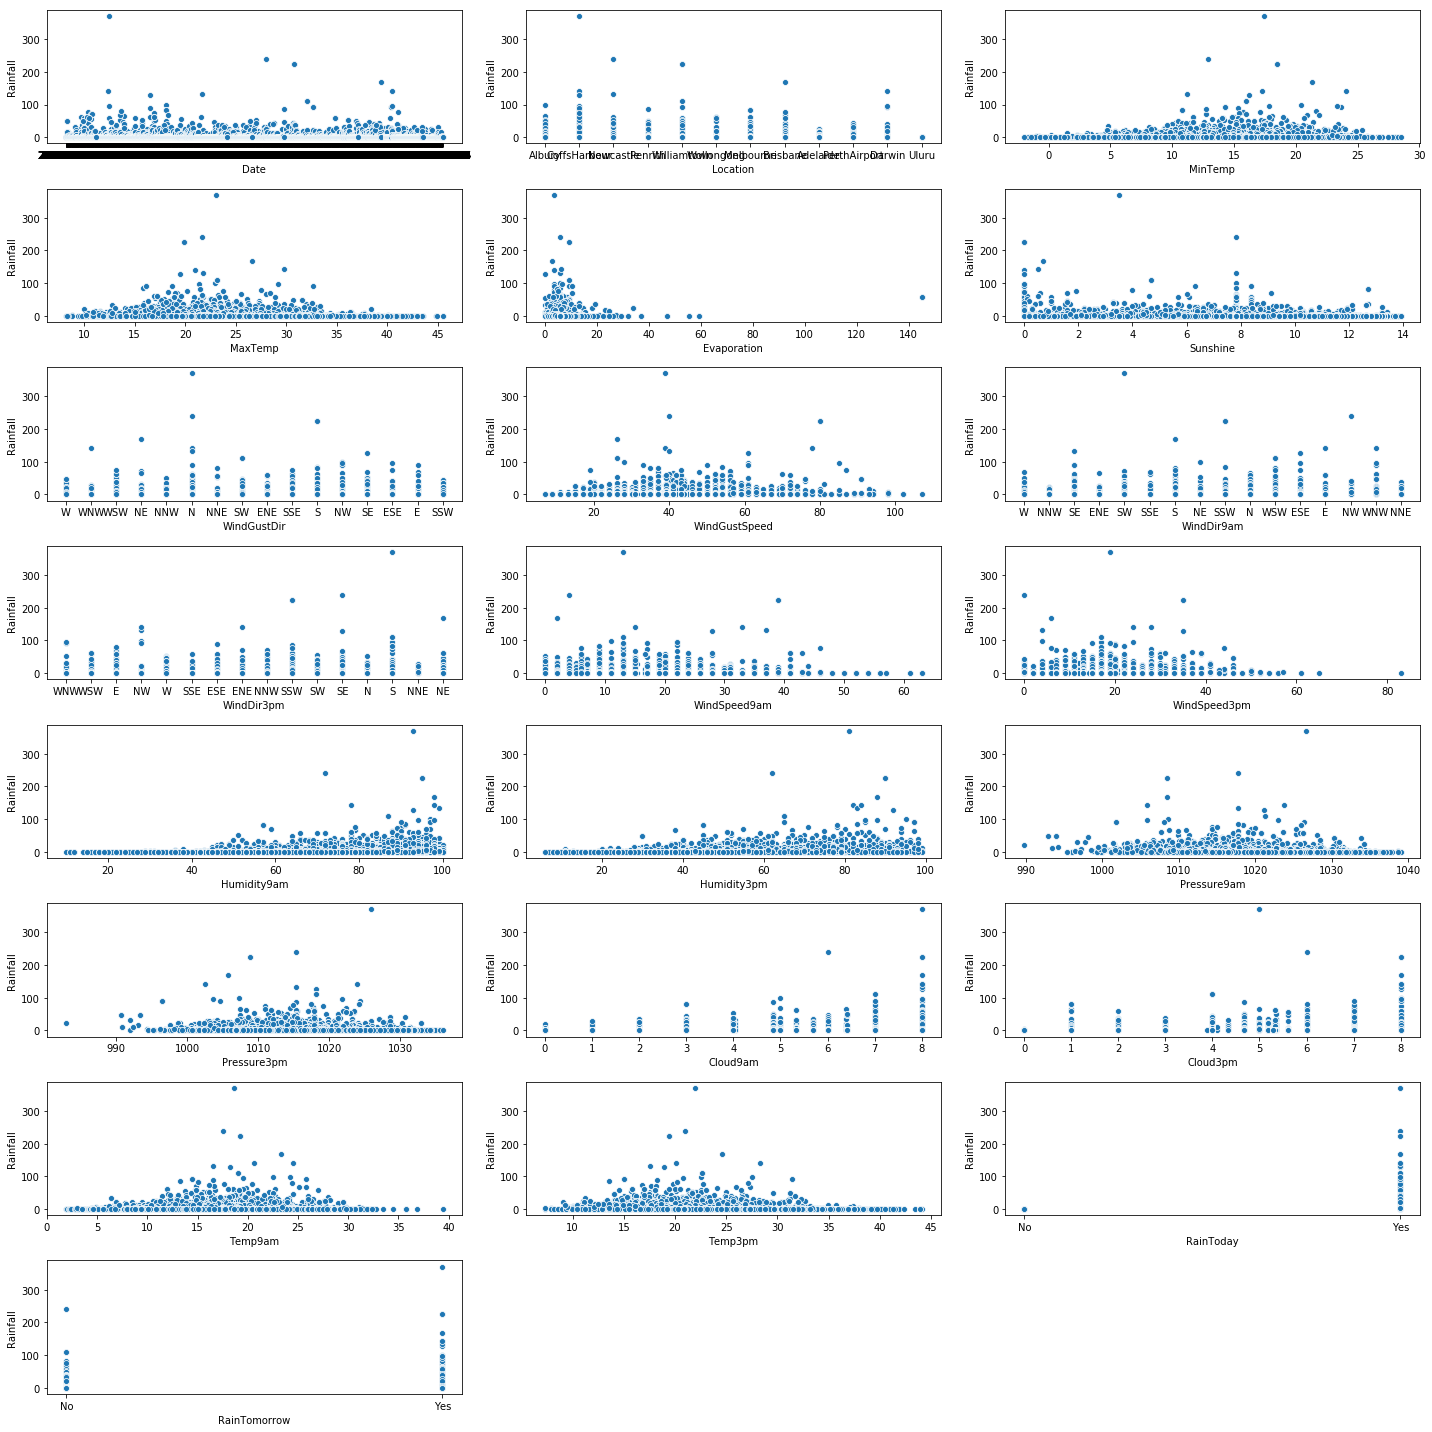

In [397]:
plt.figure(figsize=(20,20))
plotno_=1
for col in df_rainFall.drop('Rainfall',axis=1):
    if plotno_<=24:
        ax=plt.subplot(8,3,plotno_)
        sns.scatterplot(df_rainFall[col],df_rainFall['Rainfall'])
        plt.xlabel(col,fontsize=10)
        plt.ylabel("Rainfall",fontsize=10)
    plotno_+=1
plt.tight_layout()

MinTemp is in range of 10-25 has high chance of Rainfall.

MaxTemp is in range of 15-35 has high chance of Rainfall.

Lower the Evaporation & Sunshine highe chance of RainFall.

WindGusSpeed is in range of 20-60 has high chance of Rainfall.

Lower WindSpeed at 9am and 3pm higher chance of Rainfall.

Higher Humidity at 9am and 3pm higher chance of Rainfall.

Pressure at 9am from 990 to 1010 high the pressure high the Rainfall while 1020 to 1040 high the pressure lower the rainfall.

Higher Pressure at 3pm higher chance of Rainfall.

temp at 9am in range of 10 to 30 has high chance of rainfall.

temp at 3pm in range of 10 to 35 has high chance of rainfall.

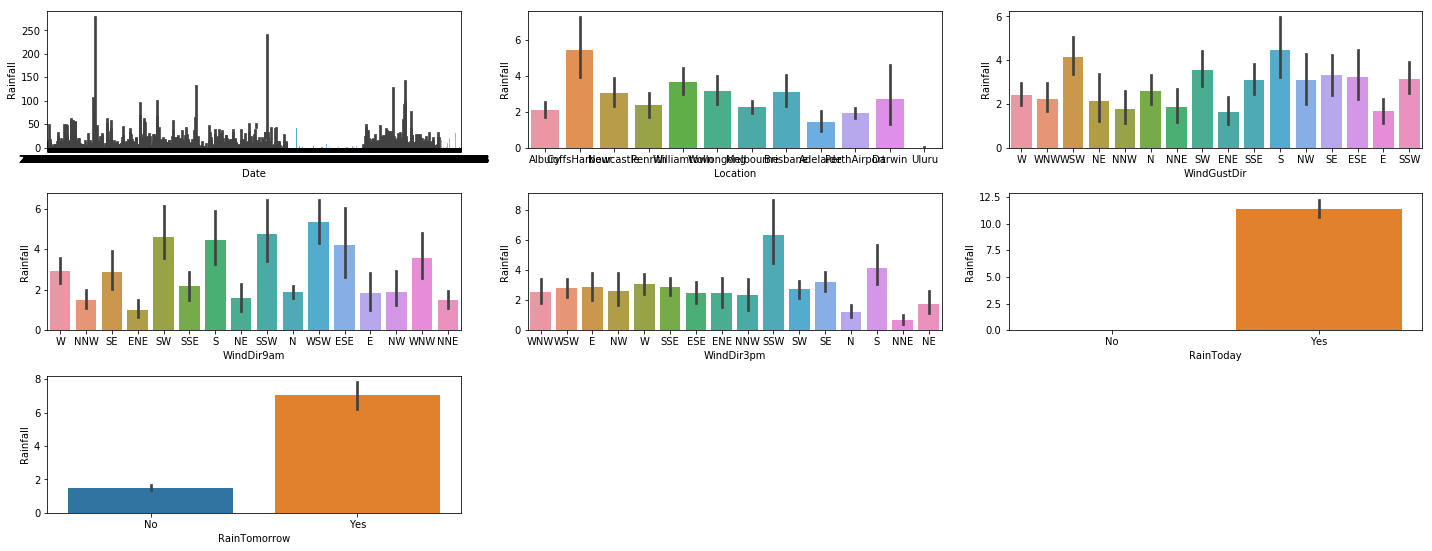

In [398]:
plt.figure(figsize=(20,20))
plotno_=1
for col in categorical_:
    if plotno_<=24:
        ax=plt.subplot(8,3,plotno_)
        sns.barplot(df_rainFall[col],df_rainFall['Rainfall'])
        plt.xlabel(col,fontsize=10)
        plt.ylabel("Rainfall",fontsize=10)
    plotno_+=1
plt.tight_layout()

SW,WSW in theses direction when wind flows the rainfall is high.

SW,SSW,S in theses direction at 9am the winds flows there is high rainfall.

SSW,S the wind flows at 3pm high rainfall occurs.

This is obvious that if the rain occurs there is rainfall. But if rainfall > 2 there is high chance of rainfall occurs Tommorow.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

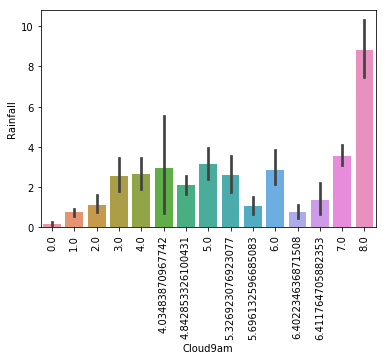

In [399]:
sns.barplot(df_rainFall['Cloud9am'],df_rainFall['Rainfall'])
plt.xticks(rotation=90)

If there are clouds at 9am are 6,8, and in range of 3 to 5 there is high rainfall.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

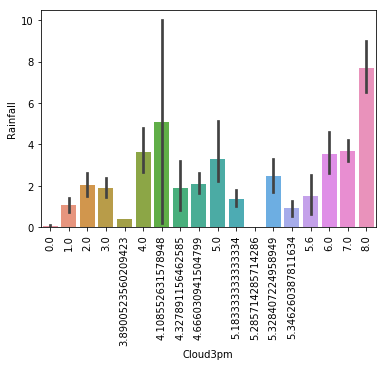

In [400]:
sns.barplot(df_rainFall['Cloud3pm'],df_rainFall['Rainfall'])
plt.xticks(rotation=90)

If there are clouds at 3pm are in range of 4 to 4.6 and in range of 6 to 8  there is high rainfall.

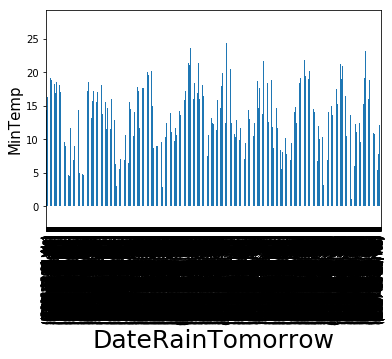

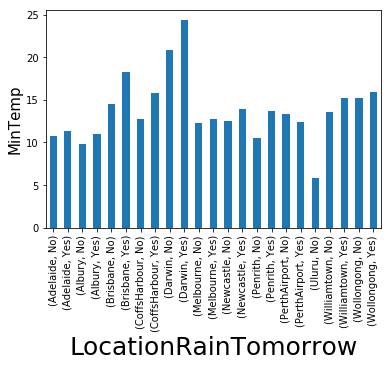

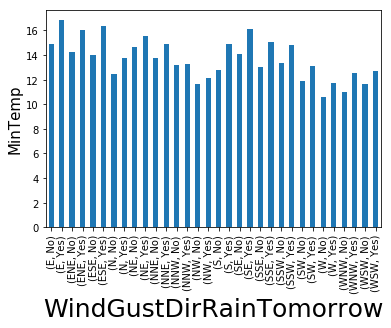

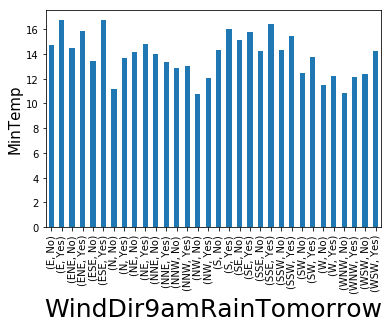

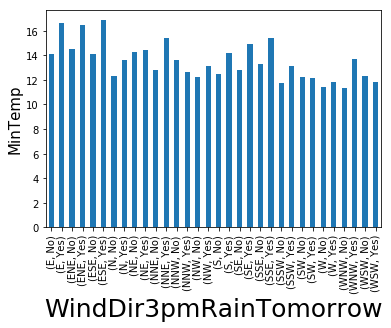

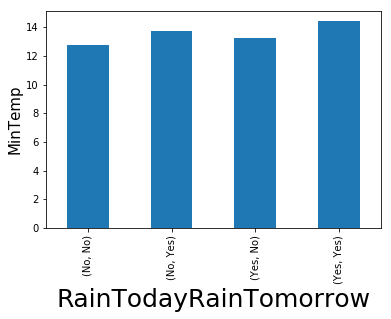

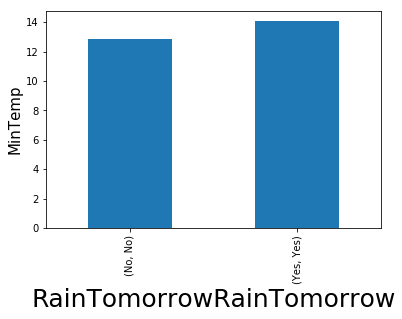

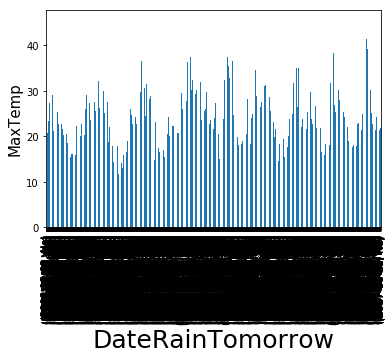

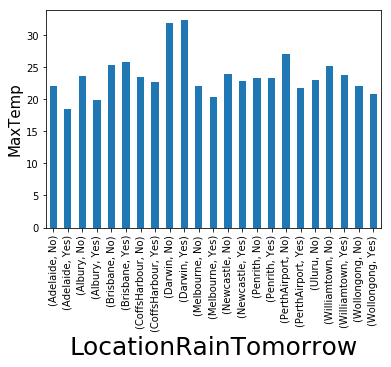

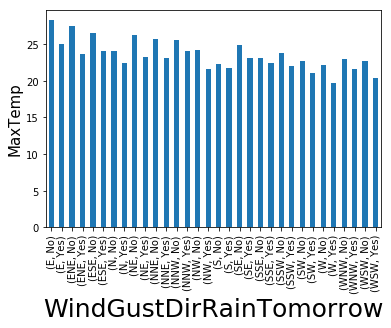

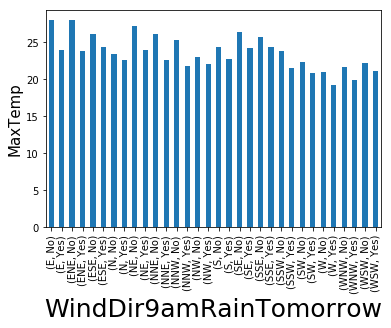

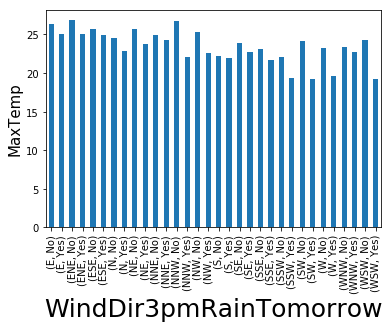

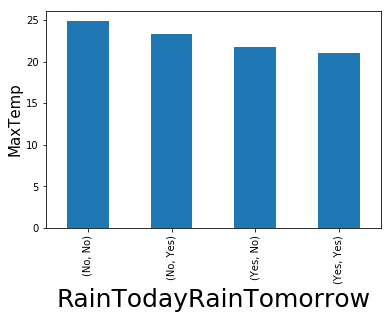

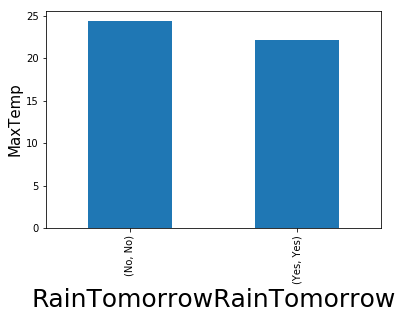

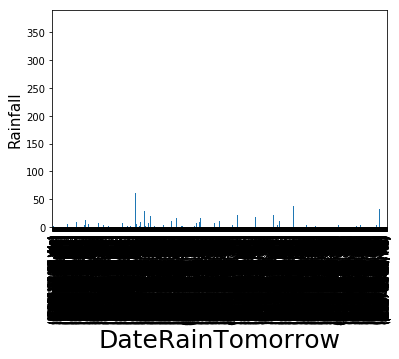

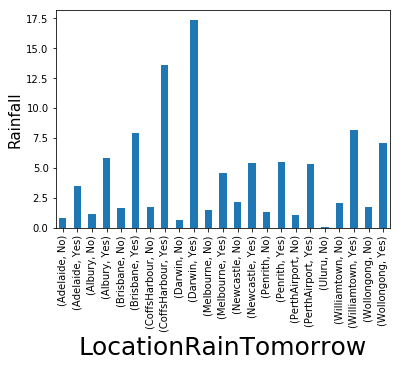

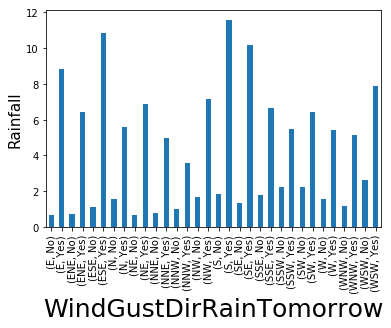

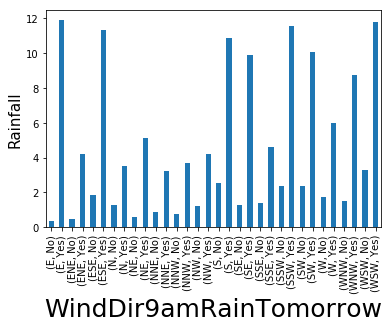

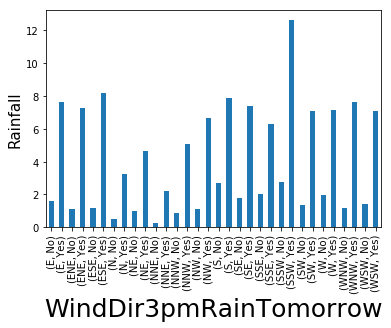

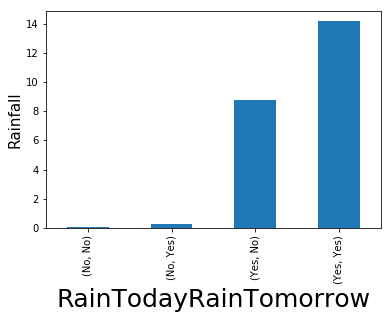

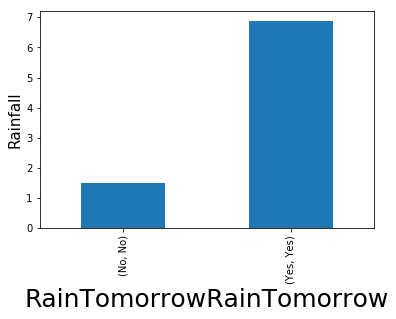

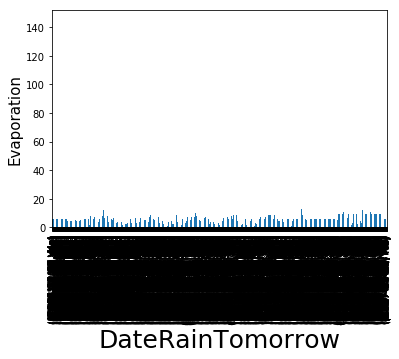

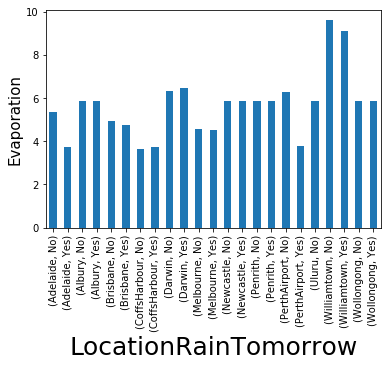

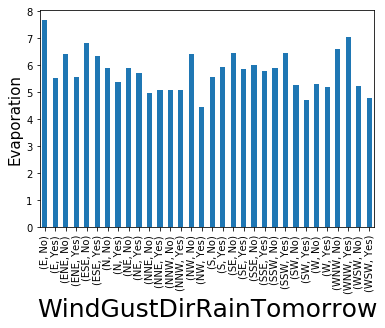

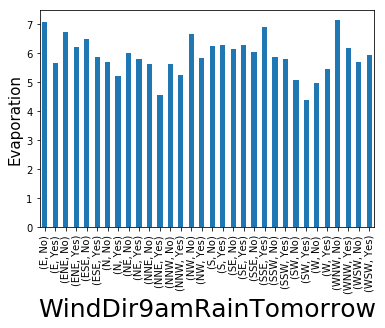

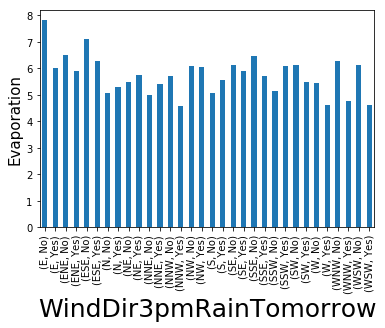

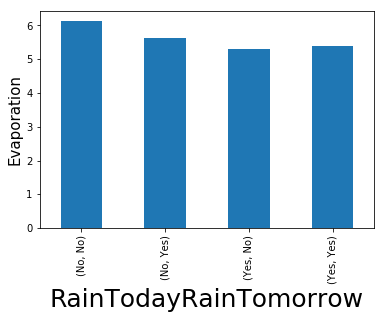

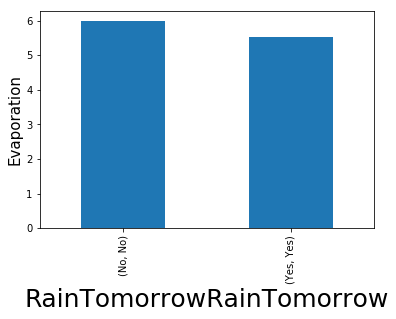

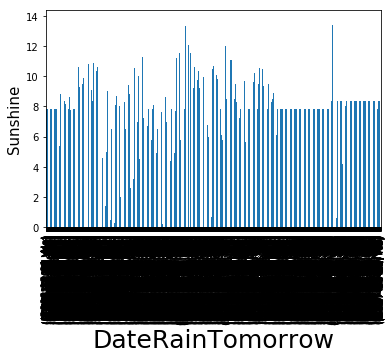

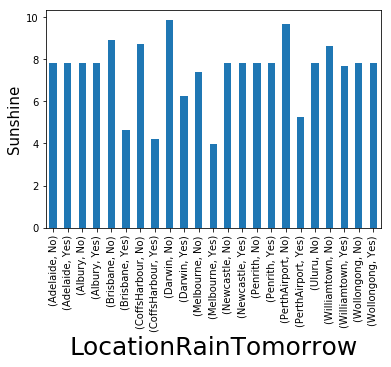

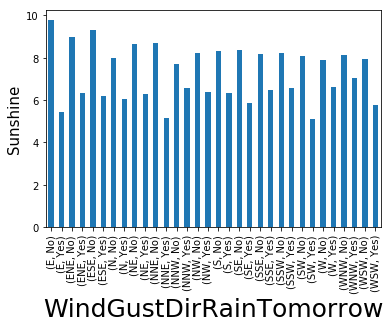

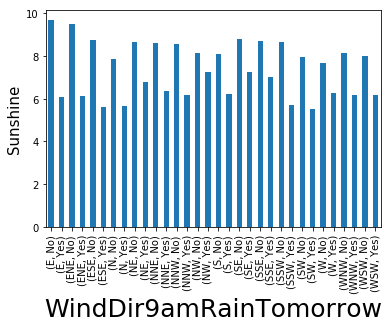

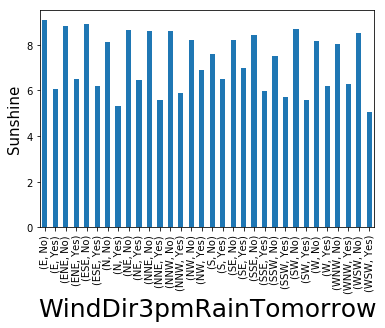

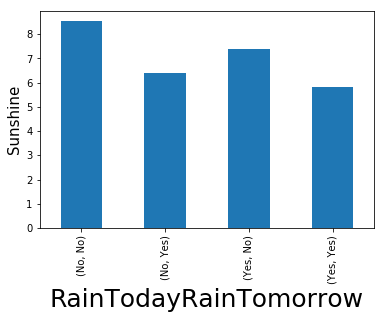

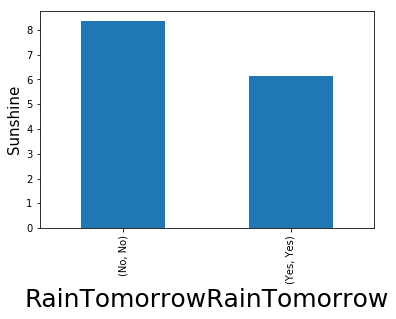

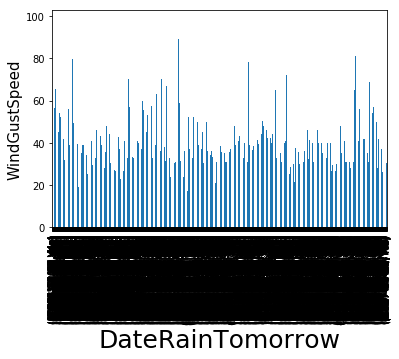

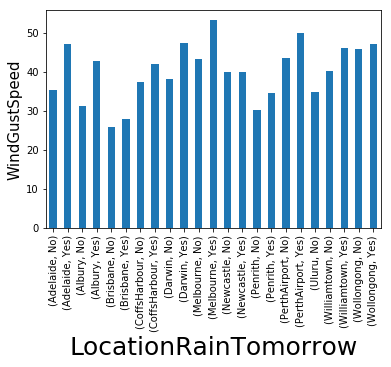

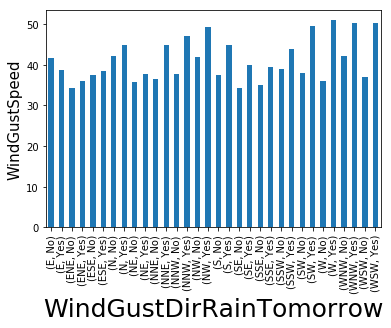

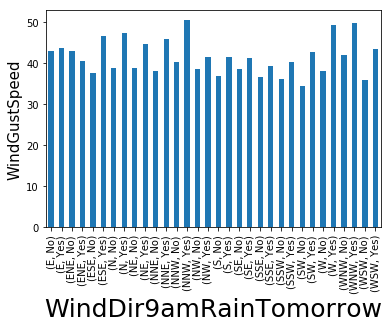

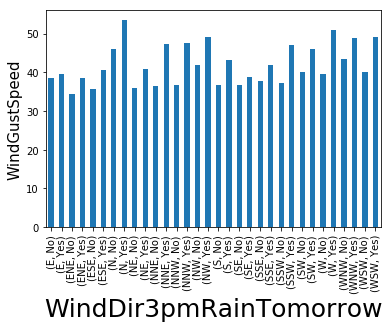

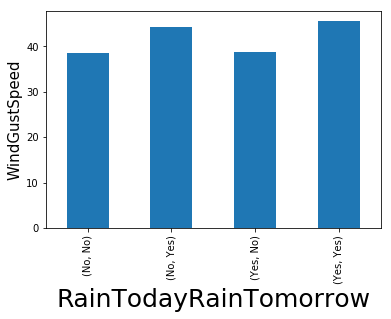

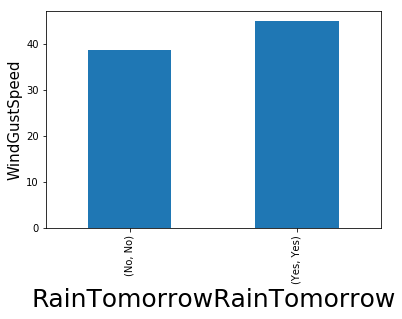

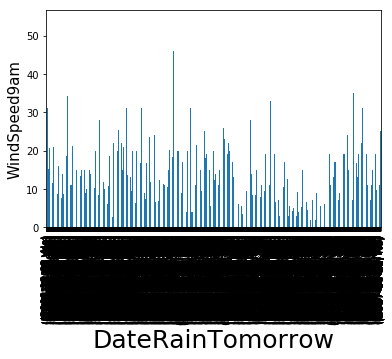

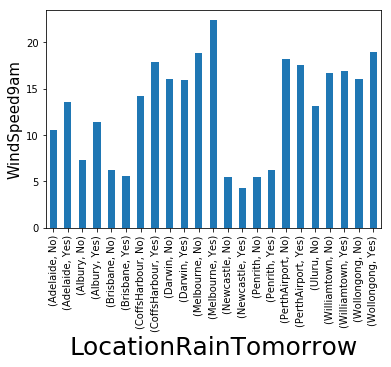

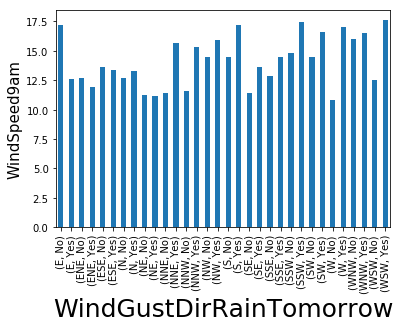

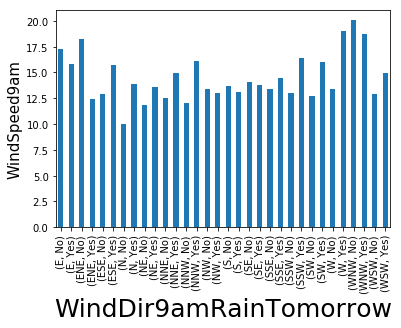

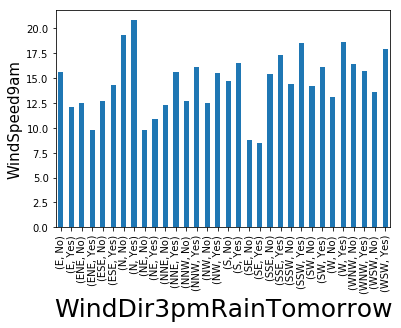

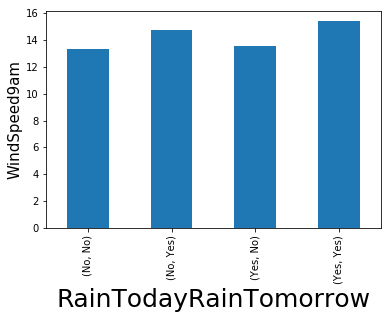

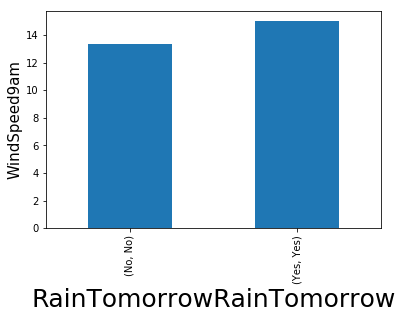

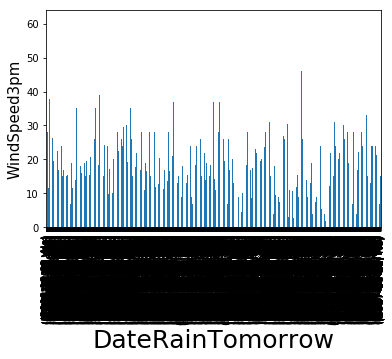

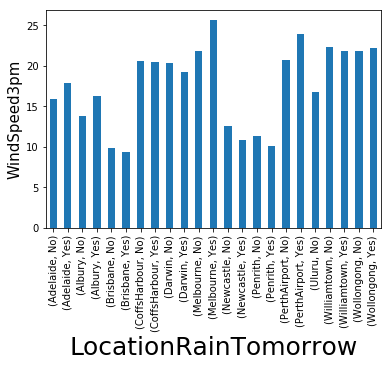

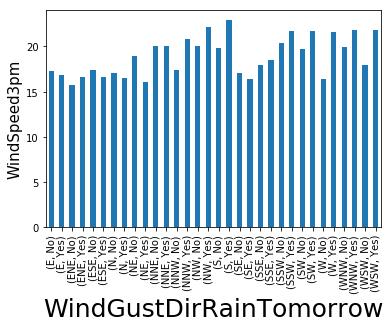

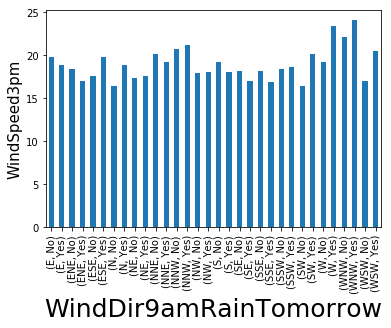

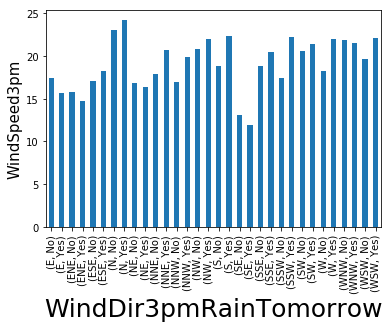

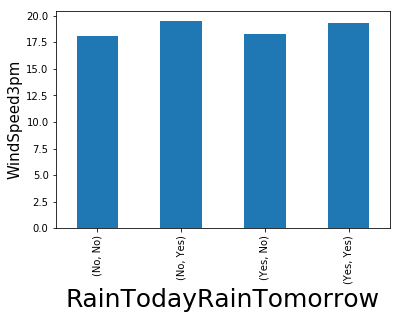

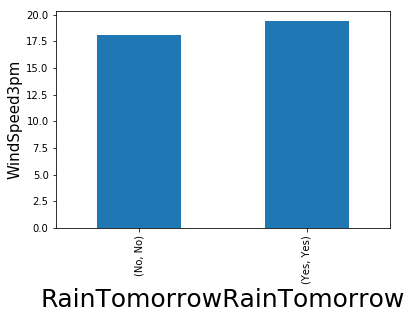

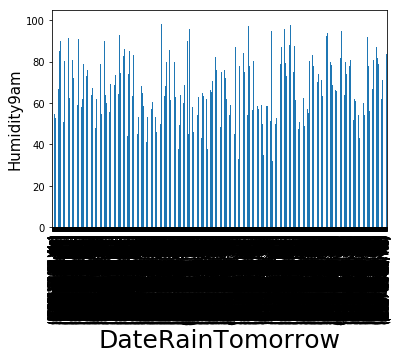

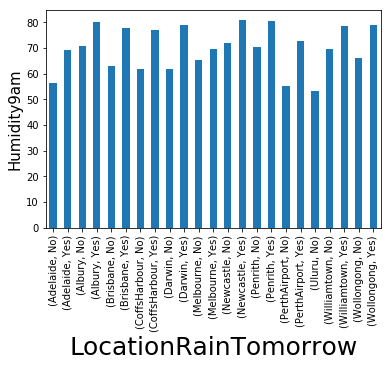

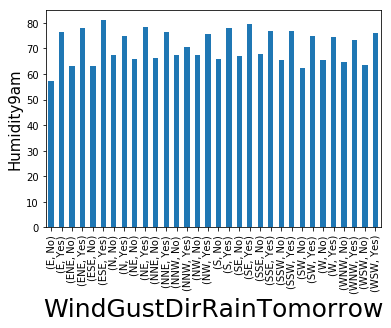

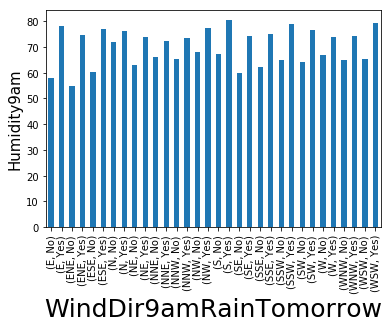

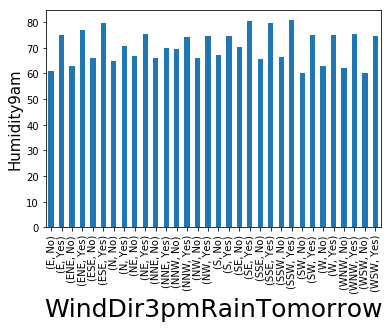

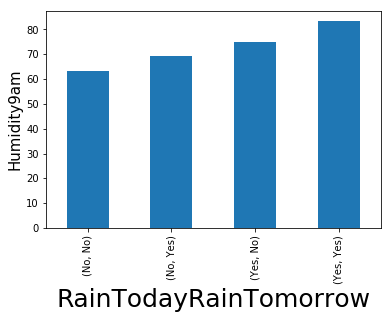

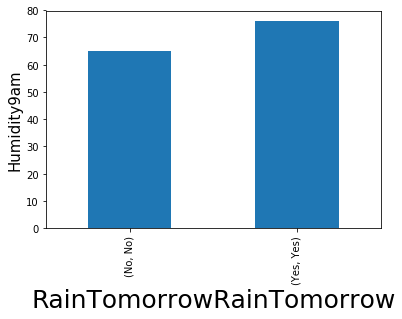

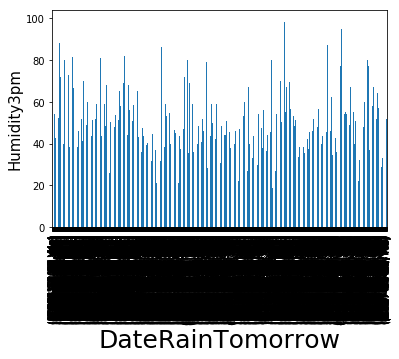

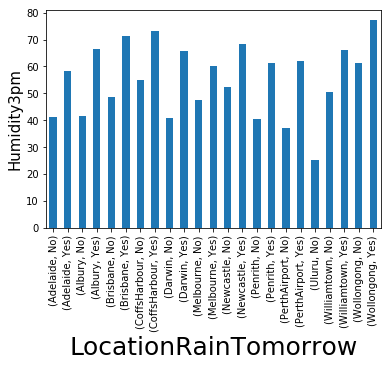

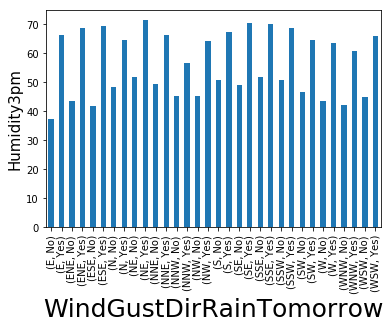

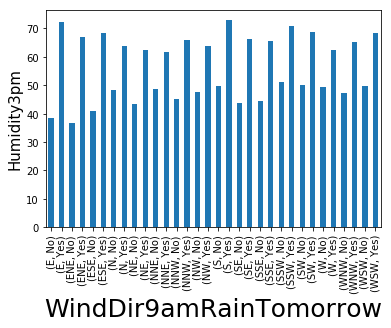

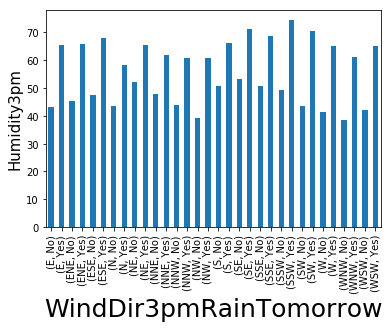

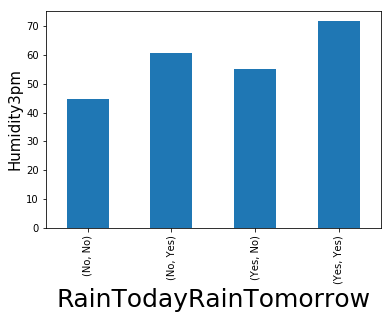

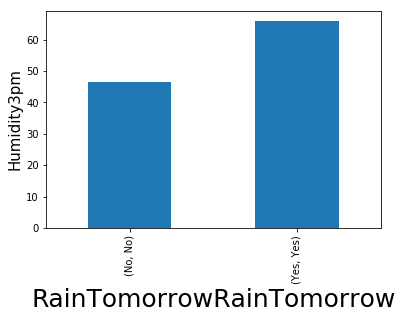

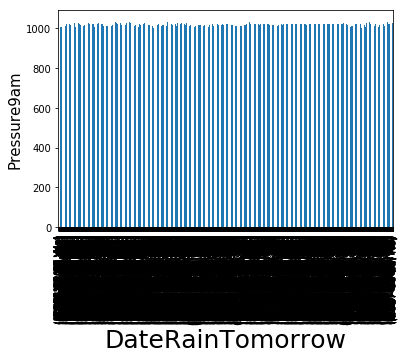

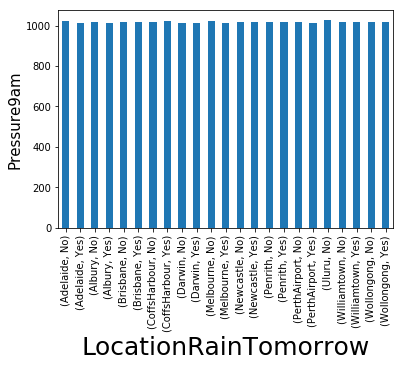

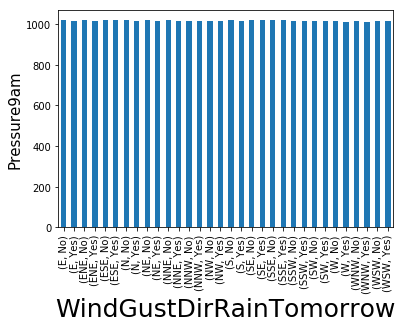

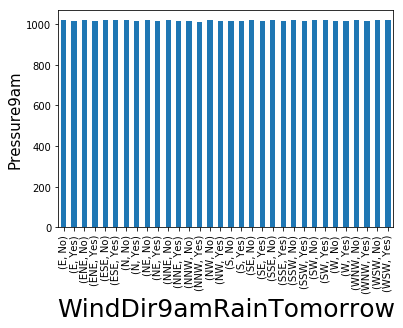

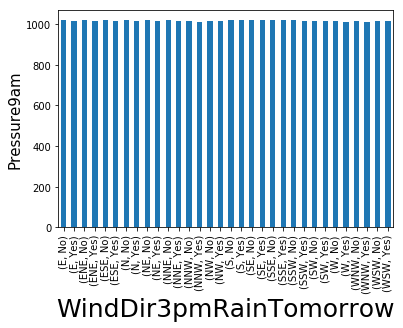

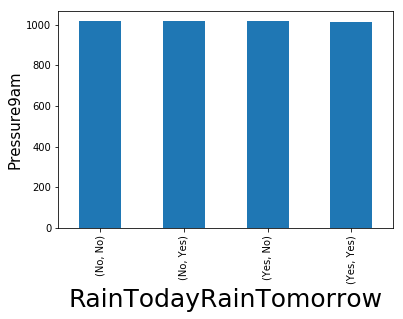

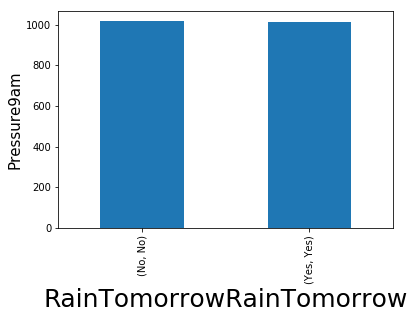

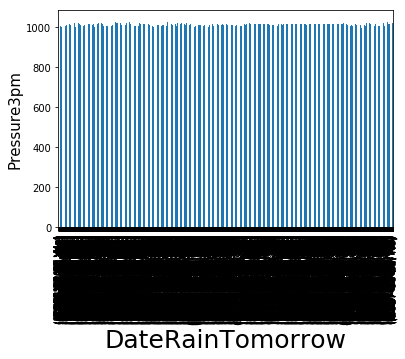

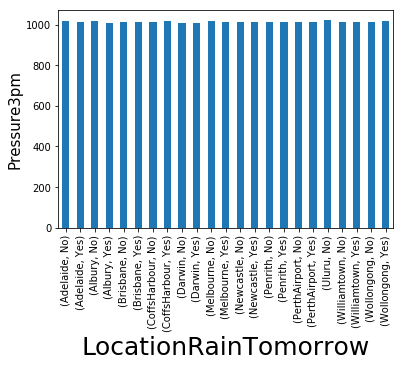

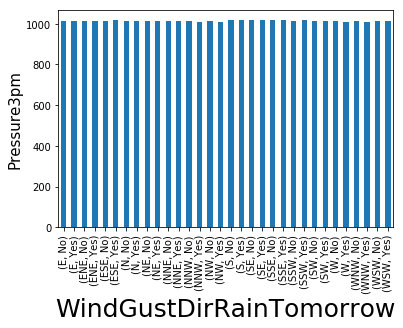

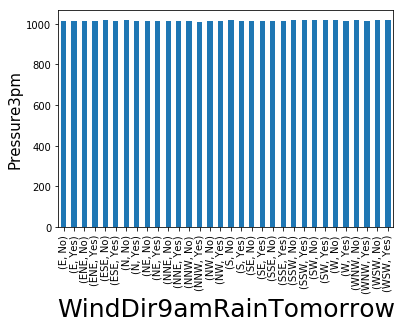

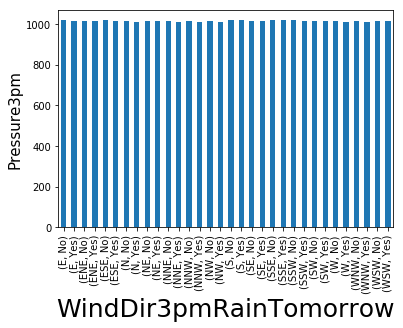

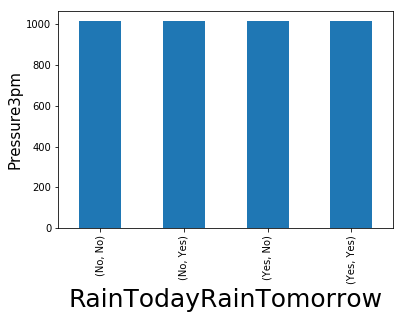

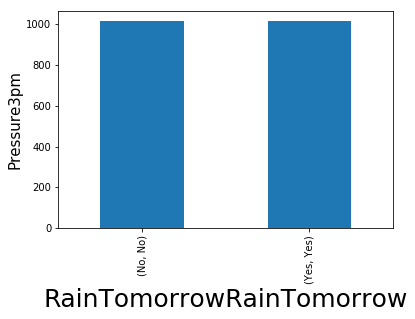

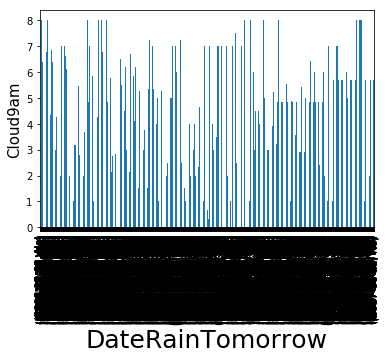

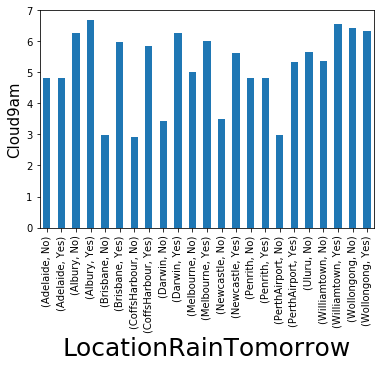

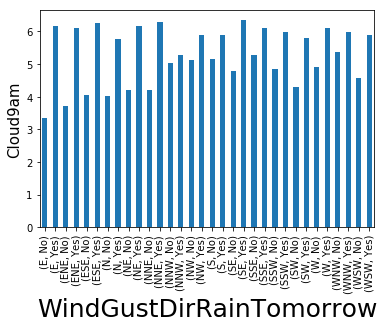

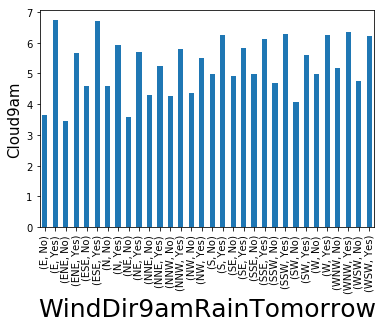

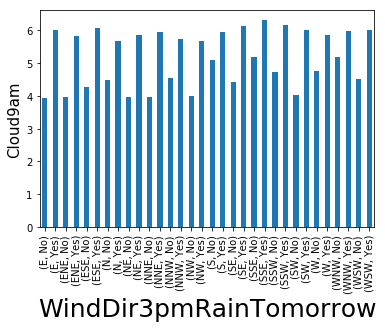

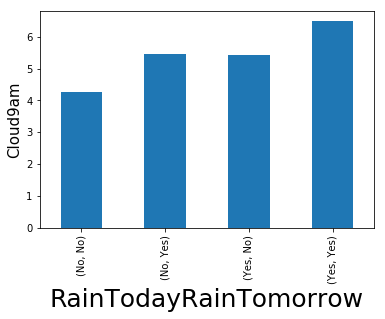

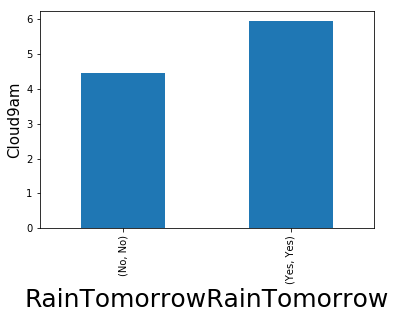

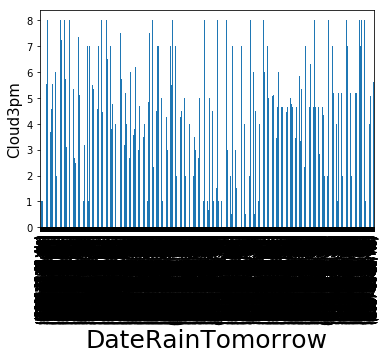

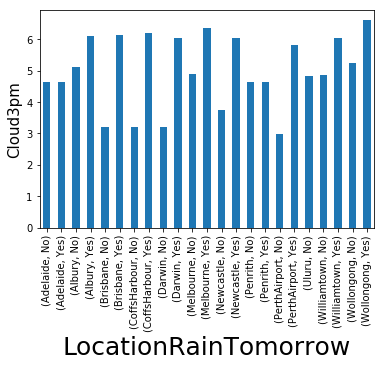

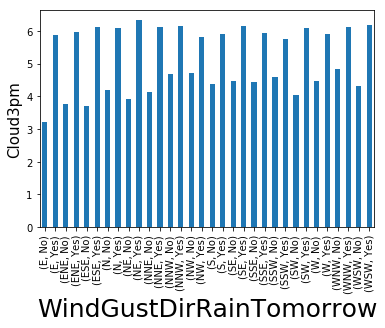

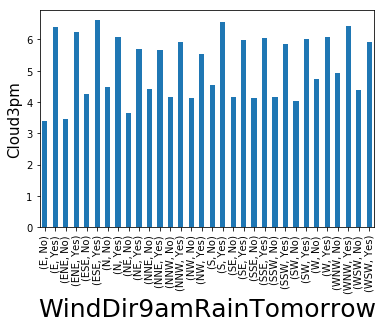

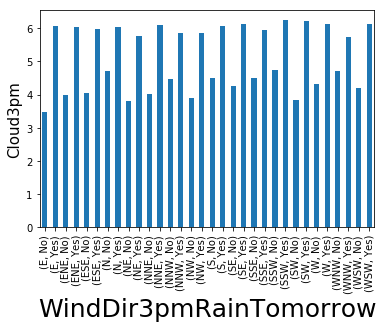

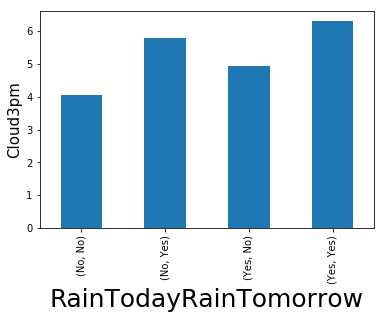

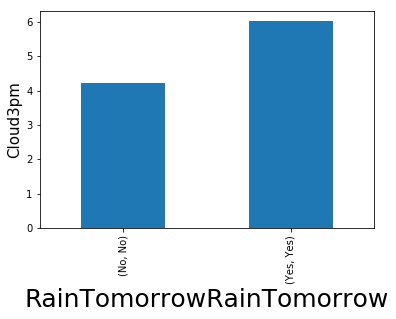

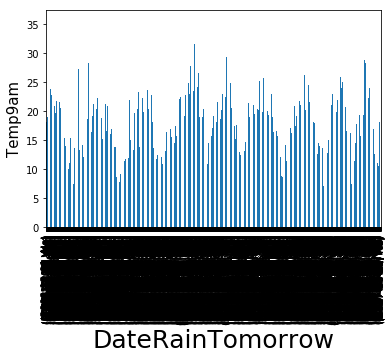

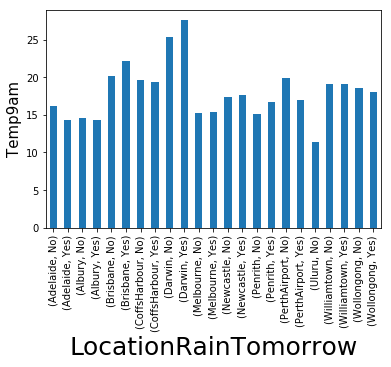

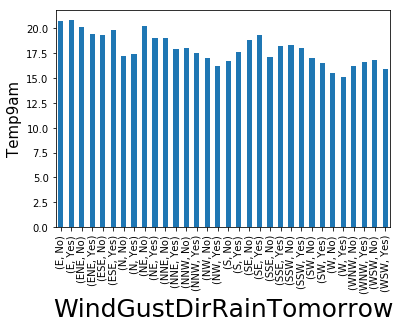

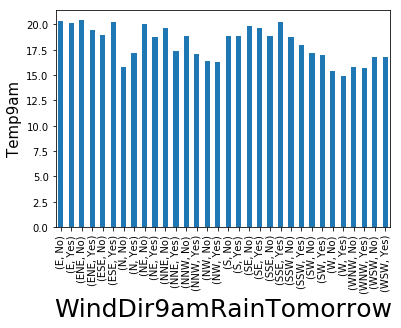

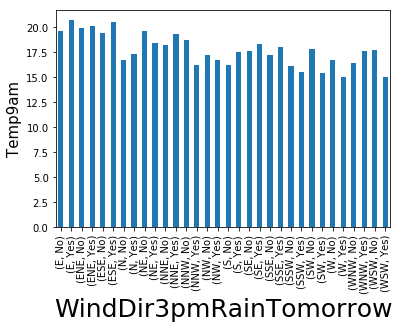

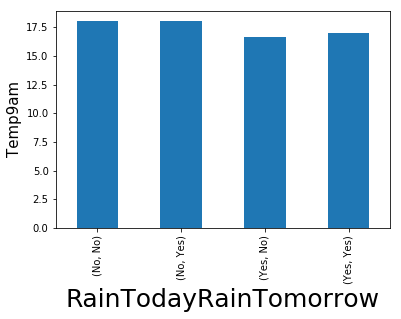

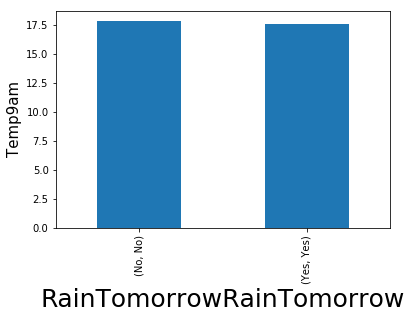

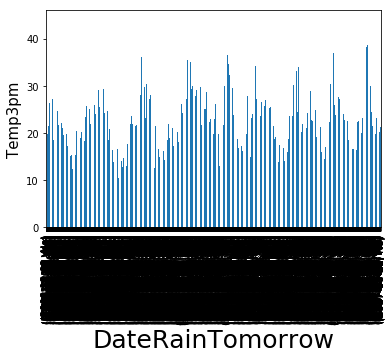

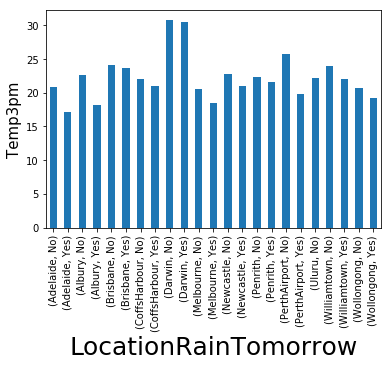

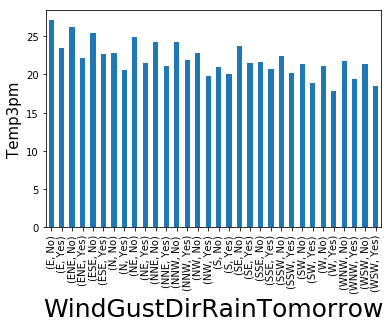

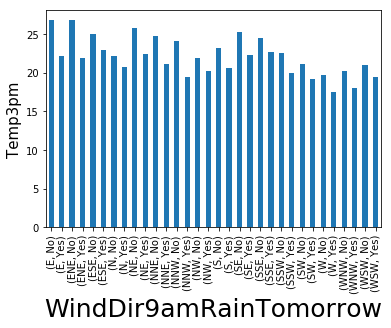

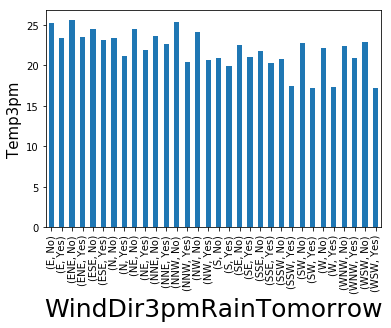

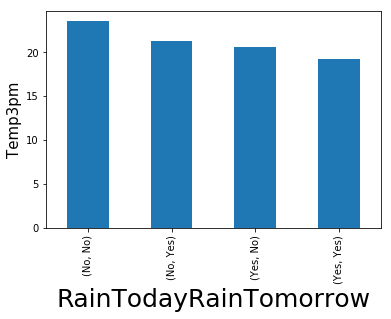

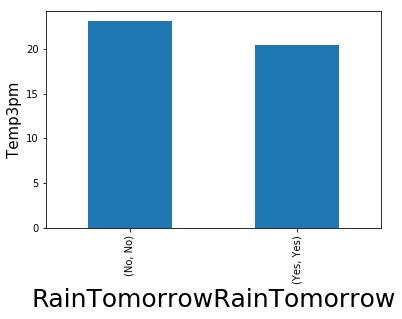

In [193]:
for col in numerical_:
    for col1 in categorical_:
        df_rainTomorrow.groupby([col1,"RainTomorrow"])[col].mean().plot(kind='bar')
        plt.xlabel(col1+"RainTomorrow",fontsize=25)
        plt.ylabel(col,fontsize=15)
        plt.show()

Minimum Temperature at 25 and MaxTemp >30 in Darwin there is high chance of rainTommorow.

MinimumTemperature >16 when windgusDir , at both 3pm or 9am flows in East there is high chane of rainTommorow.

MaxTemperature >25 when windgusDir , at both 3pm or 9am flows in East,ENE there is high chane of no rainTommorow.

MinTemp > 14 if rains Today then there is rainfall tommorow.

There is most rainfall in Darwin if wind flow in south direction.

Most Evaporation in Williamtown no matter it rainTommorow or not.

No such Effect of evaporation to know that it rainTomorow or not.

Most of Sunshine fall at Darwin,PerthAirport. Lower the sunshine in any direction at anytime higher chances of rainTommorow.

Sunshine > 6 there is no rainTommorrow.

In Melbourne having high windSpeed of chances of rainTommorow.

WindSpeed > 40 in SW,W,WWW,WSW these direction at anytime there is high chance of rainTommorow.

WindSpeed at 9am > 12 and at 3pm > 17.5 there is high chane of rainTommorow.

Humidity at 9am > 65 and at 3pm >45 high chane of rainTommorow.

No such impact of pressure at anytime to know whether it rain Tomorrow or not.

Clouds at 9am or 3pm > 4 high chane of rainTommorow in any location any directon of wind flows at any time.

Darwin has the high temp at ant time. and no such impact to know it rain tommorow or not.

In [401]:
#### Transforming date columns to both dataset to know or to analyse about the rainfall 

df_rainFall['Day']=pd.to_datetime(df_rainFall.Date).dt.day
df_rainFall['month']=pd.to_datetime(df_rainFall.Date).dt.month
df_rainFall['year']=pd.to_datetime(df_rainFall.Date).dt.year
df_rainFall['weekDay']=pd.to_datetime(df_rainFall.Date).dt.weekday

df_rainTomorrow['Day']=pd.to_datetime(df_rainTomorrow.Date).dt.day
df_rainTomorrow['month']=pd.to_datetime(df_rainTomorrow.Date).dt.month
df_rainTomorrow['year']=pd.to_datetime(df_rainTomorrow.Date).dt.year
df_rainTomorrow['weekDay']=pd.to_datetime(df_rainTomorrow.Date).dt.weekday

df_rainFall.drop('Date',axis=1,inplace=True)
df_rainTomorrow.drop('Date',axis=1,inplace=True)

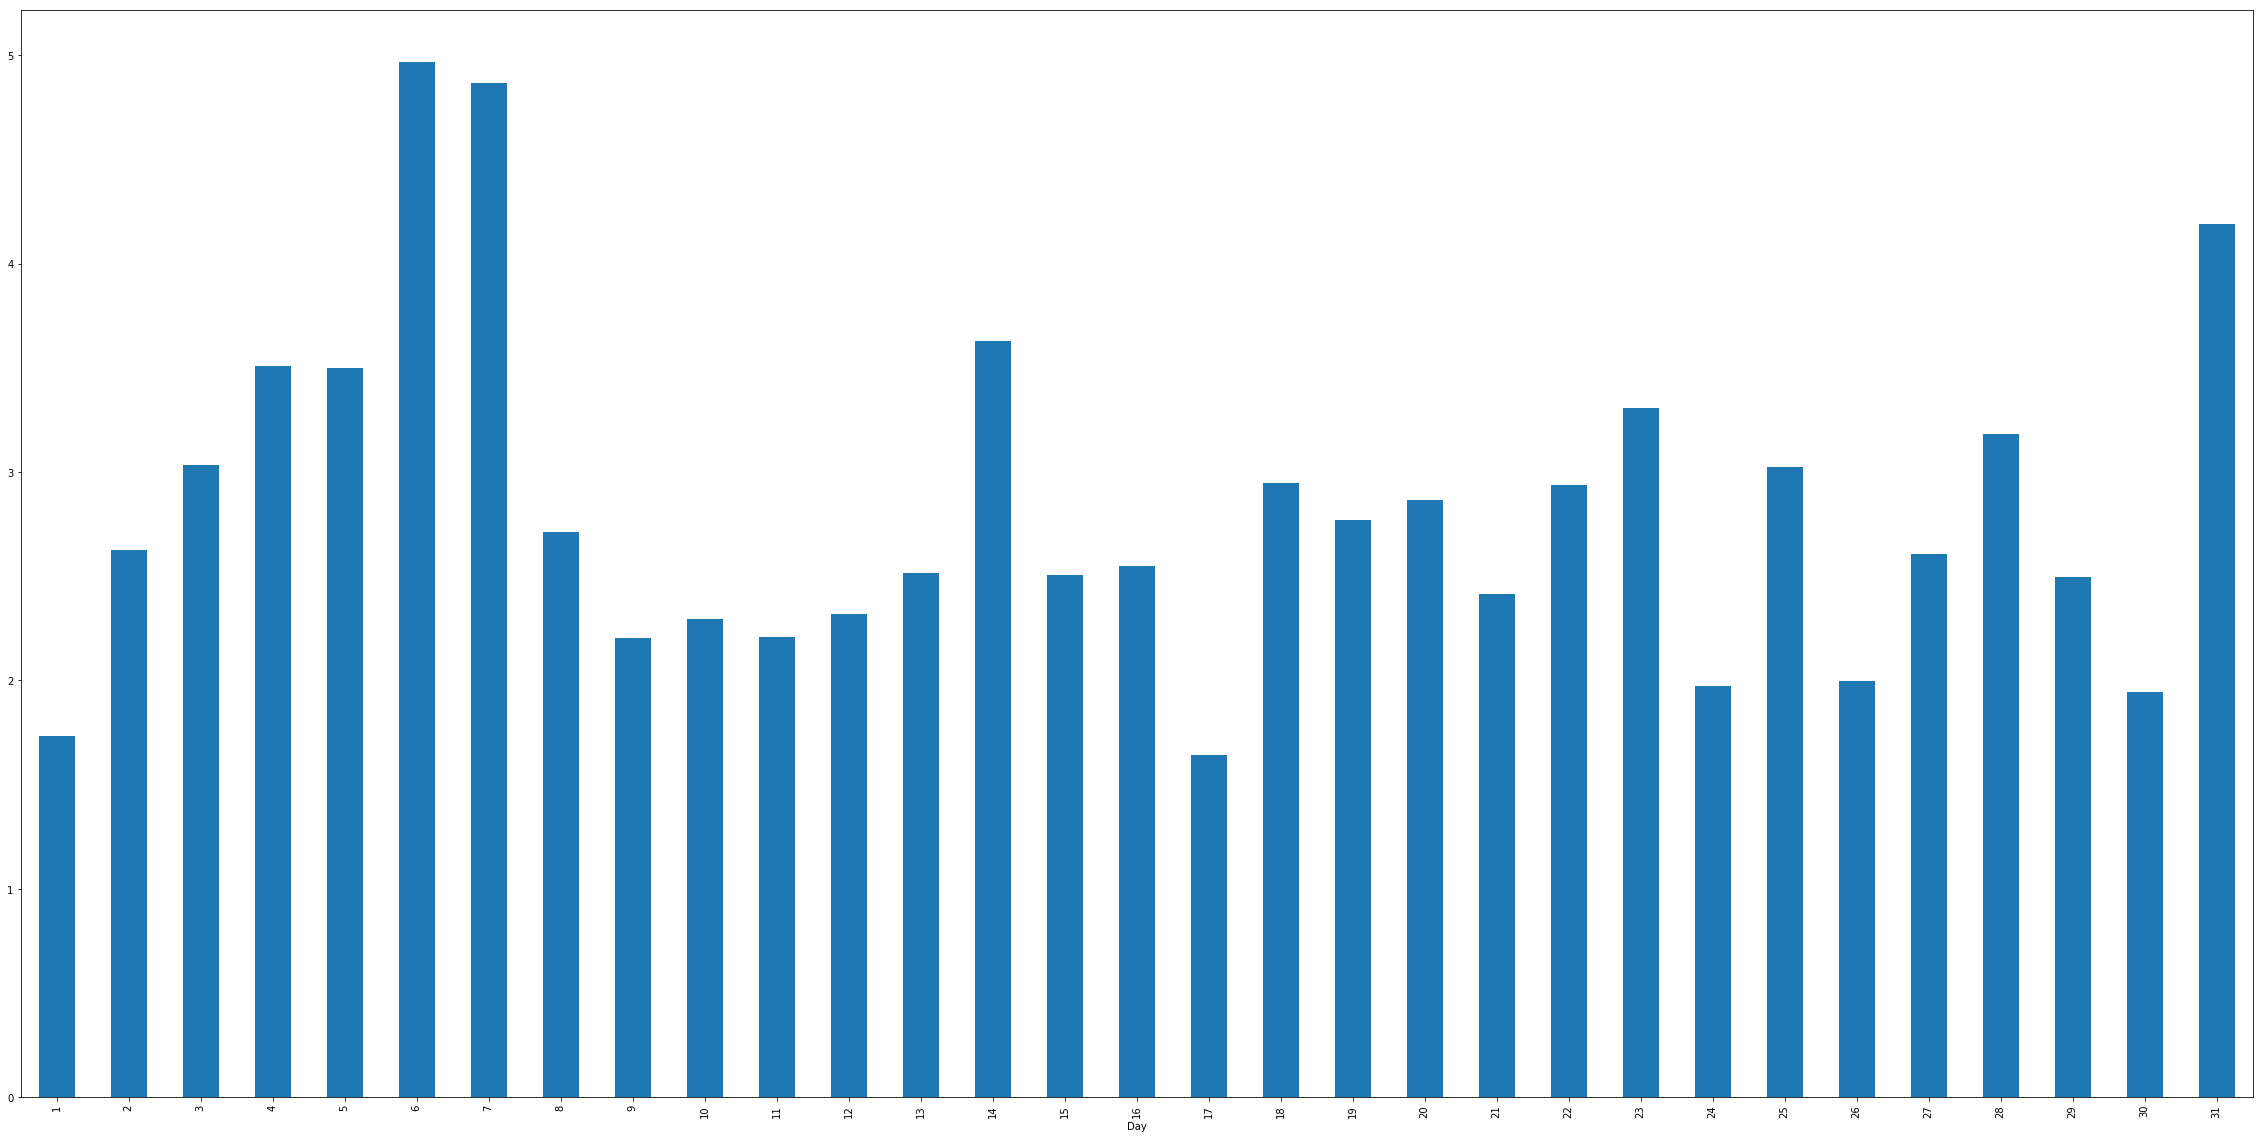

In [402]:
plt.figure(figsize=(40,20))
df_rainFall.groupby(['Day'])['Rainfall'].mean().plot(kind='bar')

in 6 and 7 th day high rainfall occurs.

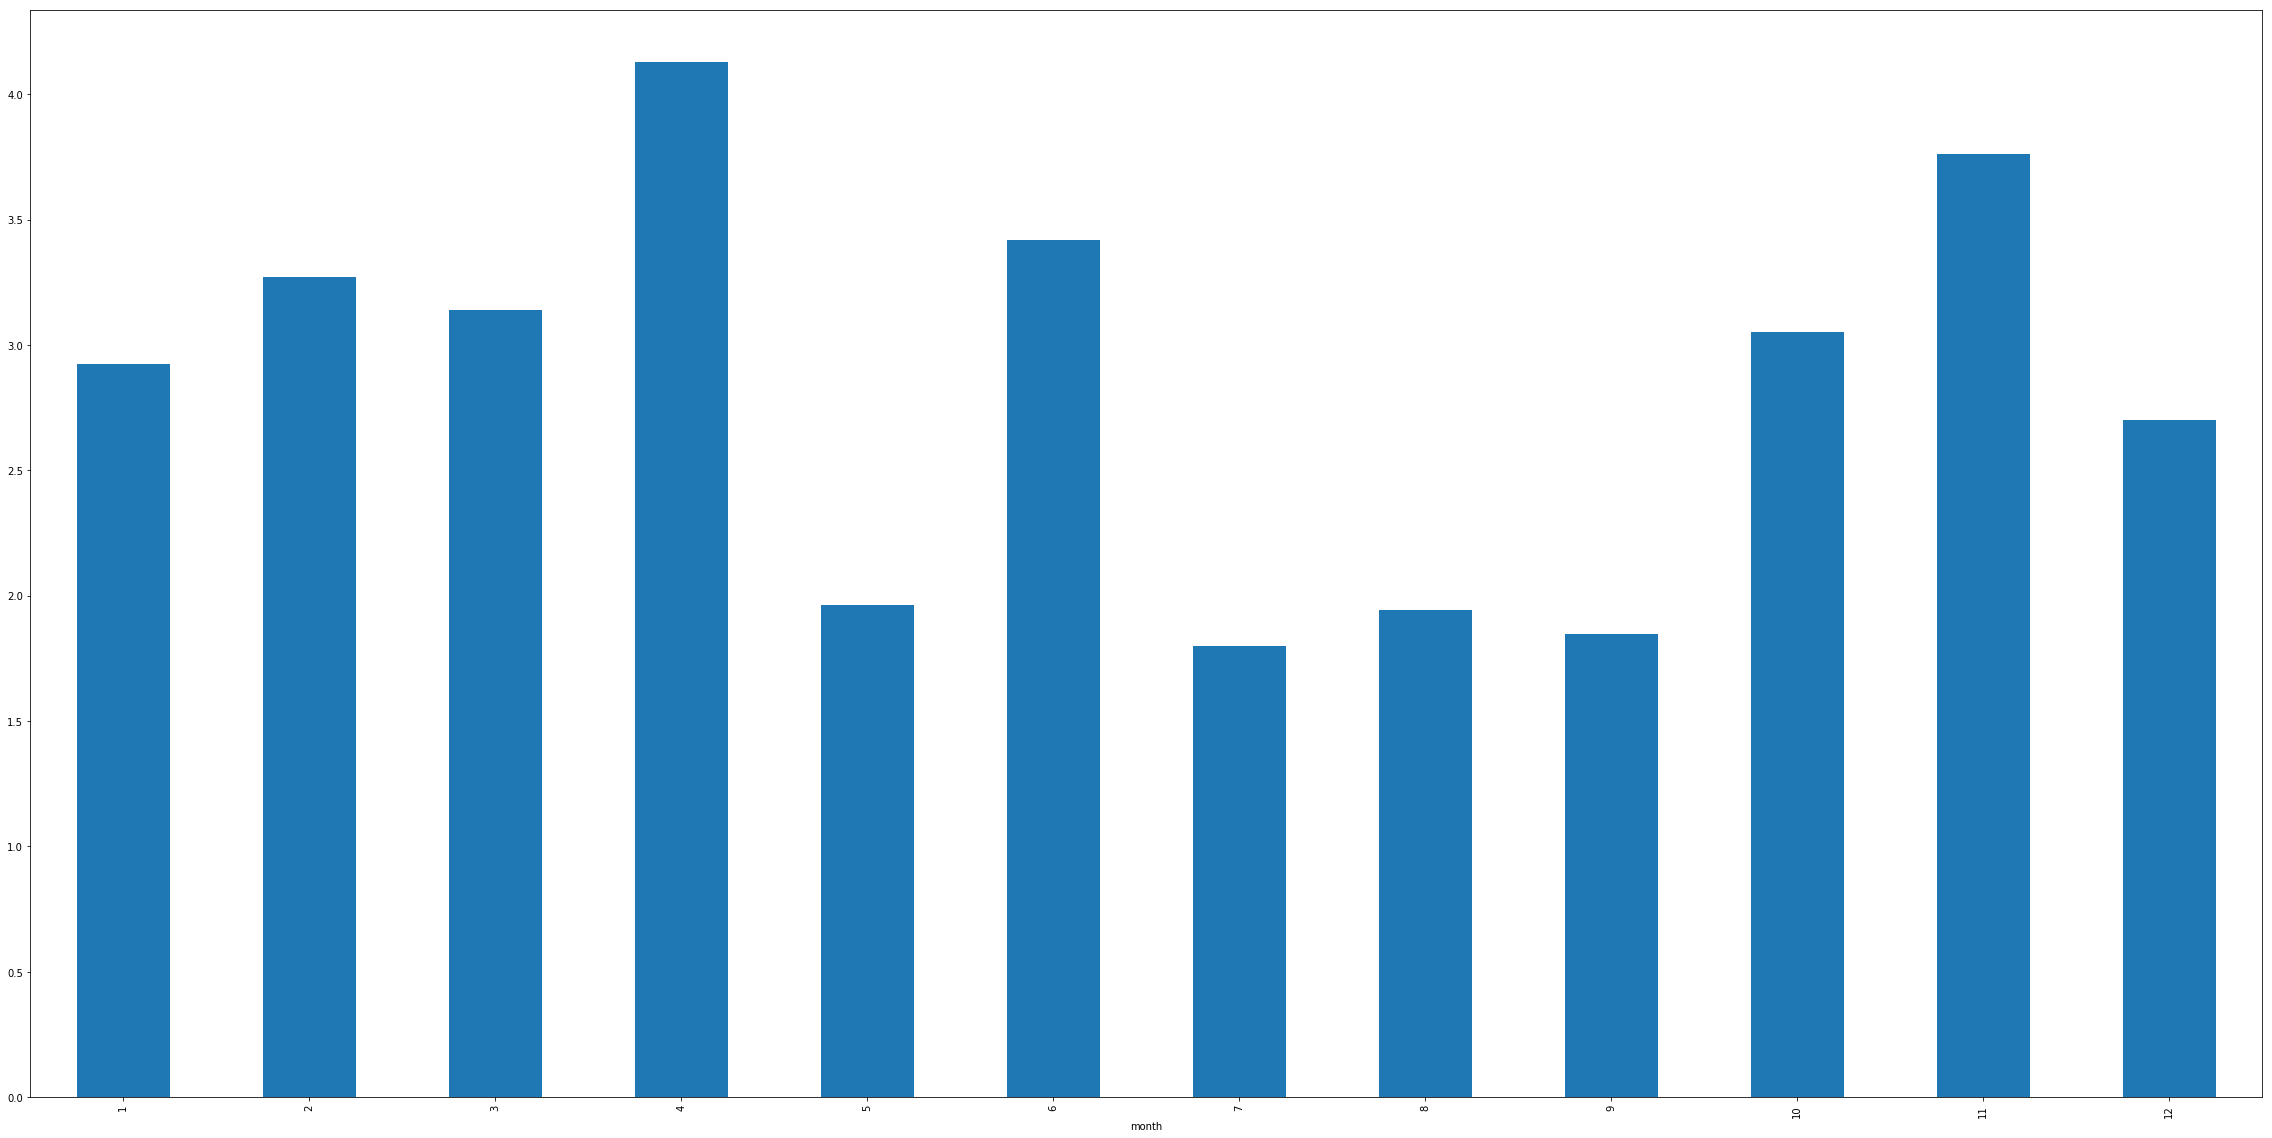

In [403]:
plt.figure(figsize=(40,20))
df_rainFall.groupby(['month'])['Rainfall'].mean().plot(kind='bar')

 in 4th month rainfall occurs highest.

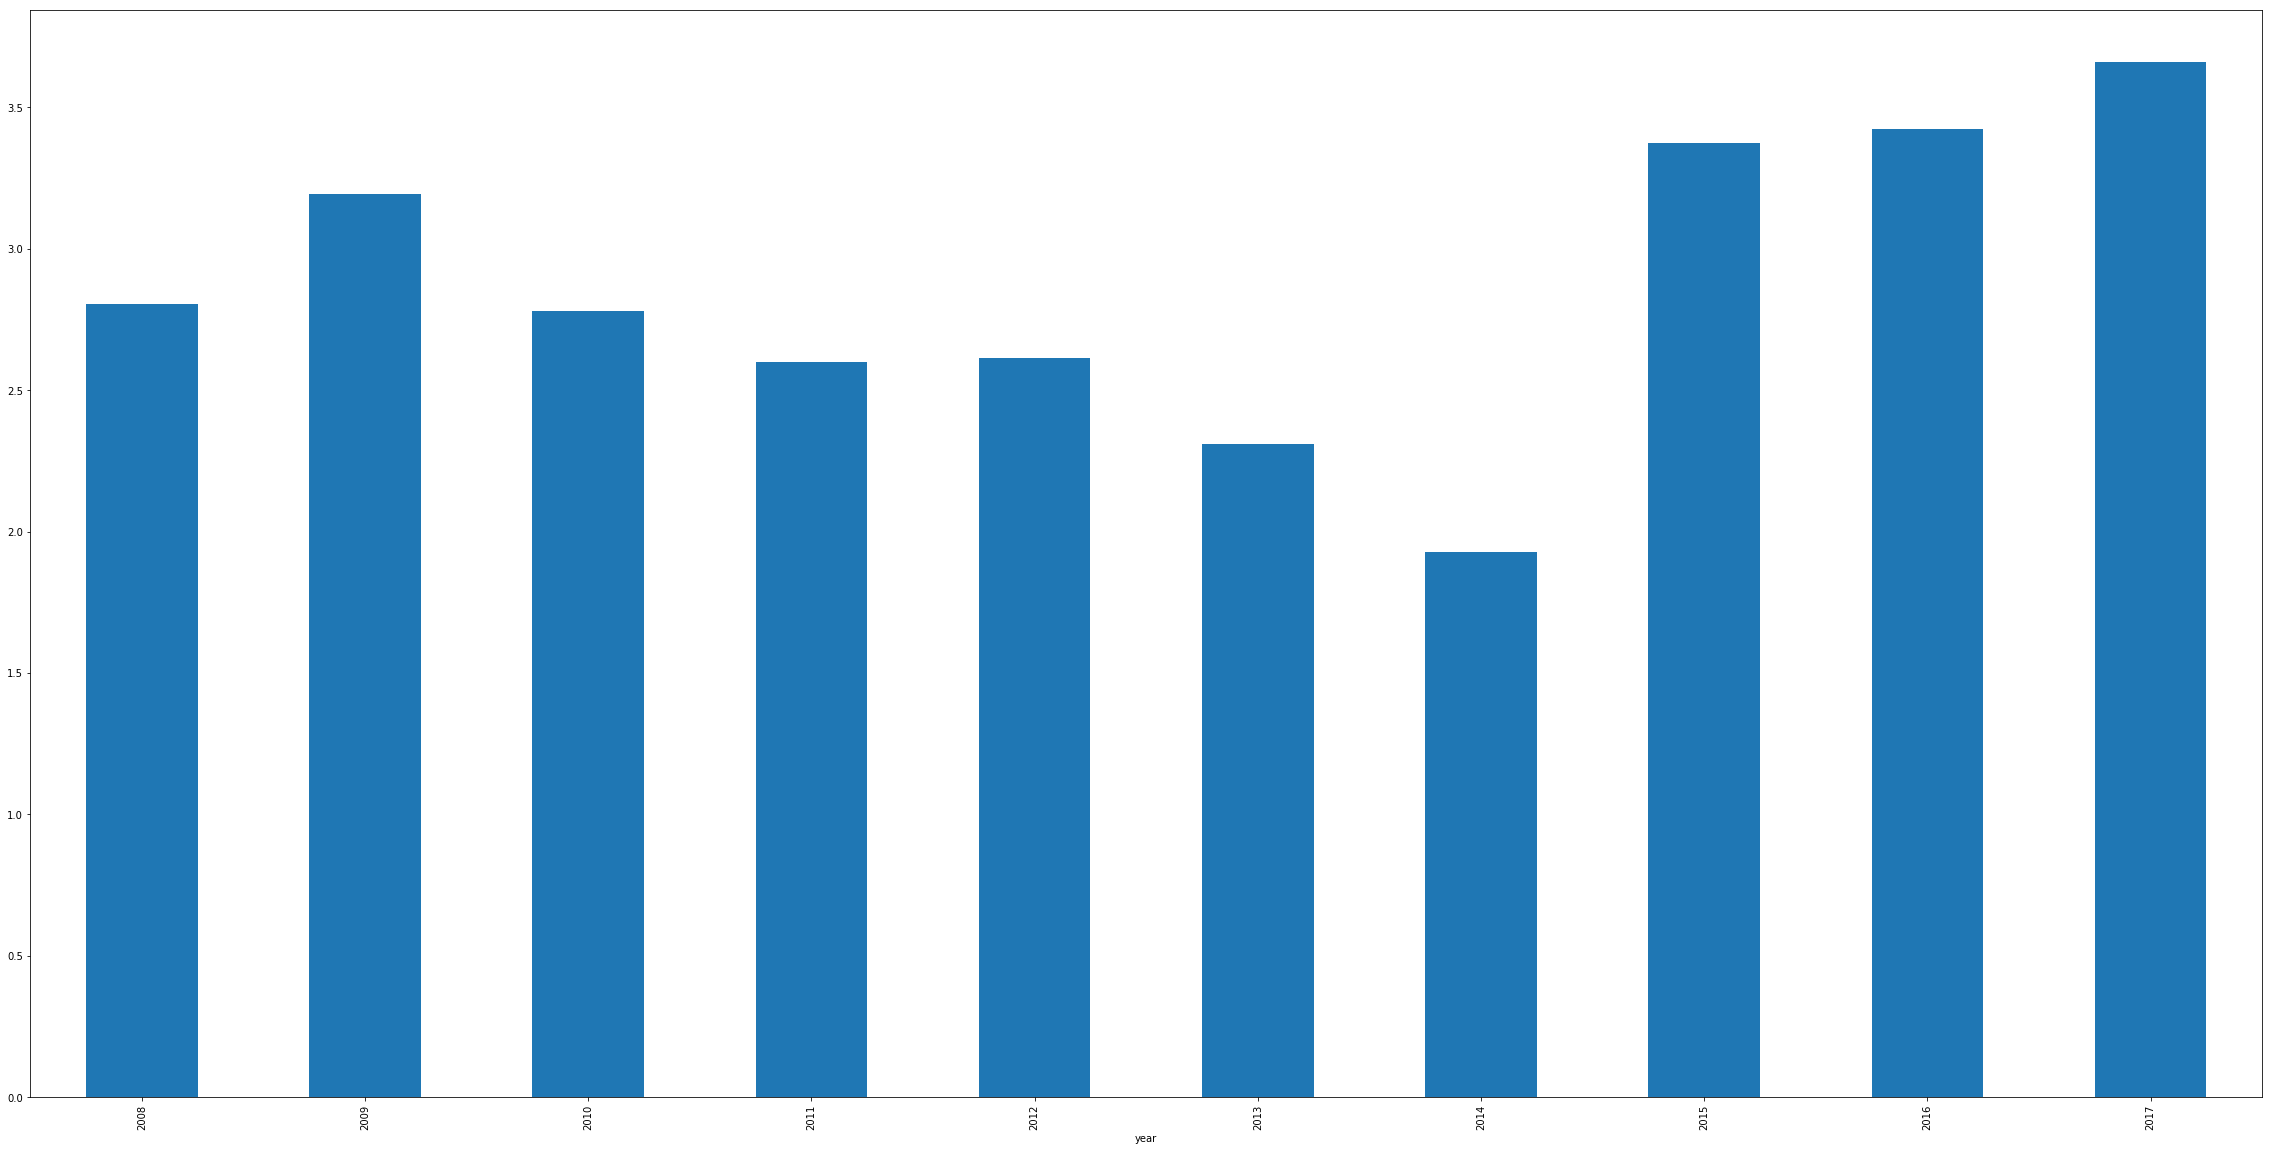

In [404]:
plt.figure(figsize=(40,20))
df_rainFall.groupby(['year'])['Rainfall'].mean().plot(kind='bar')

after year 2014 high rainfall occured.

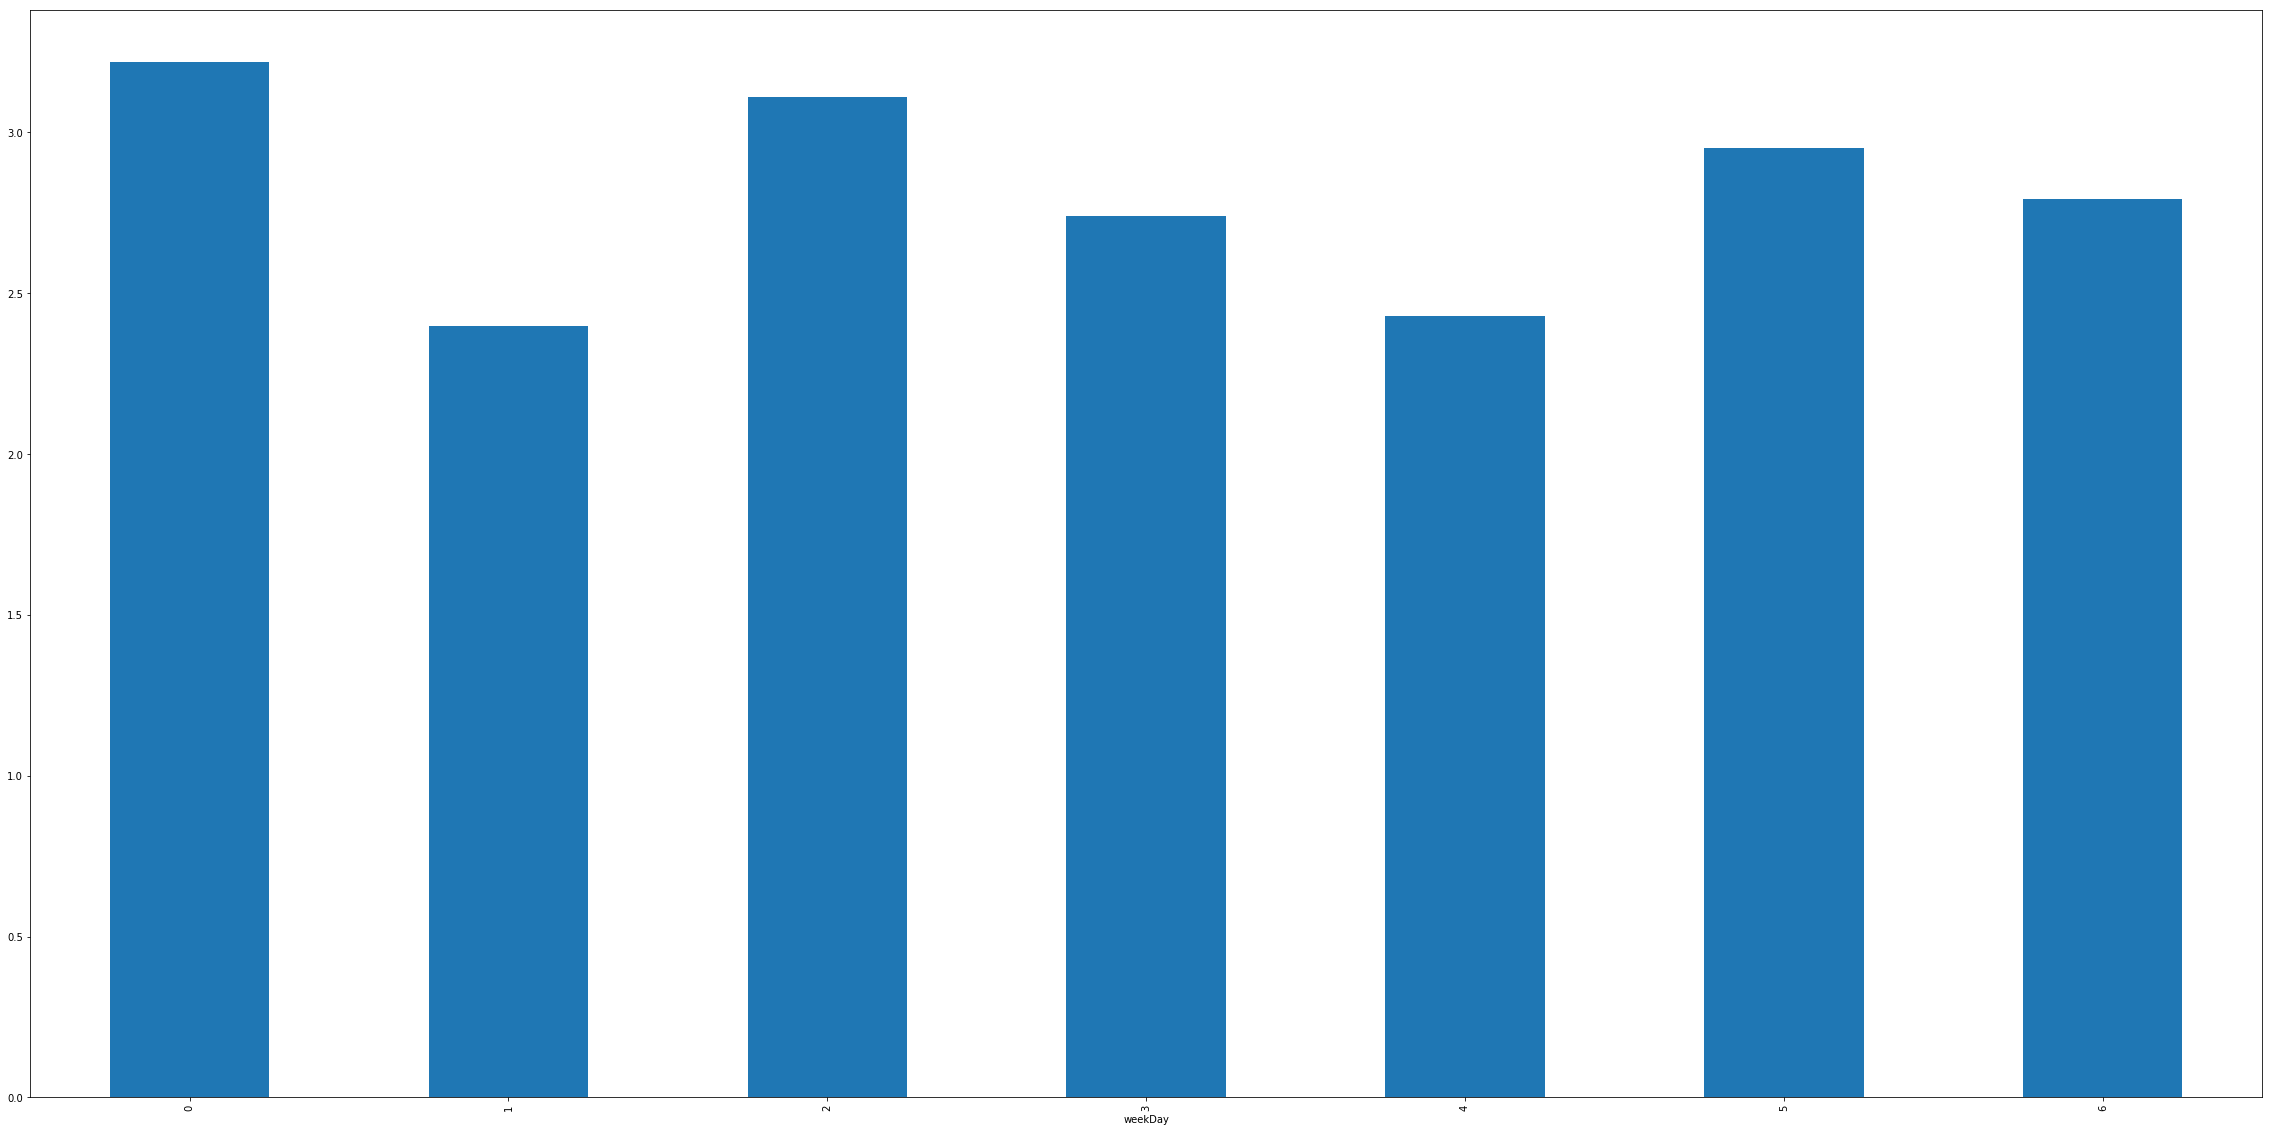

In [405]:
plt.figure(figsize=(40,20))
df_rainFall.groupby('weekDay')['Rainfall'].mean().plot(kind='bar')

highest rainfall occured at 0th weekday.

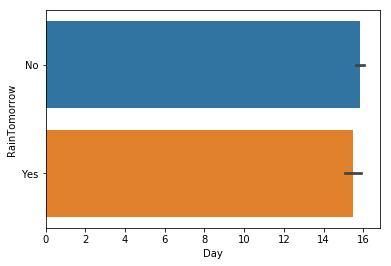

In [406]:
sns.barplot(df_rainTomorrow.Day,df_rainTomorrow.RainTomorrow)

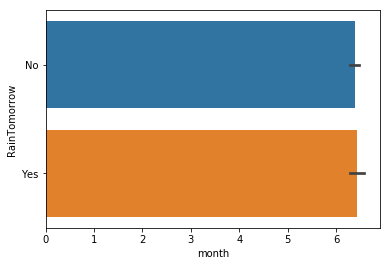

In [407]:
sns.barplot(df_rainTomorrow.month,df_rainTomorrow.RainTomorrow)

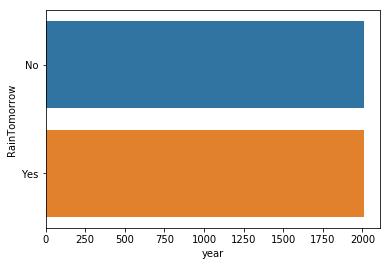

In [408]:
sns.barplot(df_rainTomorrow.year,df_rainTomorrow.RainTomorrow)

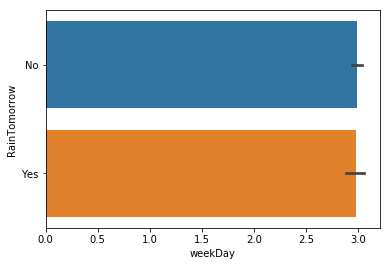

In [409]:
sns.barplot(df_rainTomorrow.weekDay,df_rainTomorrow.RainTomorrow)

No such info get from month day weekday and year that its rainTommorow.

In [410]:
## Transforming Caegorical column for both dataset.
enc=LabelEncoder()
df_rainFall['Location']=enc.fit_transform(df_rainFall.Location)
df_rainFall['WindGustDir']=enc.fit_transform(df_rainFall.WindGustDir)
df_rainFall['WindDir9am']=enc.fit_transform(df_rainFall.WindDir9am)
df_rainFall['WindDir3pm']=enc.fit_transform(df_rainFall.WindDir3pm)
df_rainFall['RainToday']=enc.fit_transform(df_rainFall.RainToday)
df_rainFall['RainTomorrow']=enc.fit_transform(df_rainFall.RainTomorrow)

df_rainTomorrow['Location']=enc.fit_transform(df_rainTomorrow.Location)
df_rainTomorrow['WindGustDir']=enc.fit_transform(df_rainTomorrow.WindGustDir)
df_rainTomorrow['WindDir9am']=enc.fit_transform(df_rainTomorrow.WindDir9am)
df_rainTomorrow['WindDir3pm']=enc.fit_transform(df_rainTomorrow.WindDir3pm)
df_rainTomorrow['RainToday']=enc.fit_transform(df_rainTomorrow.RainToday)
df_rainTomorrow['RainTomorrow']=enc.fit_transform(df_rainTomorrow.RainTomorrow)

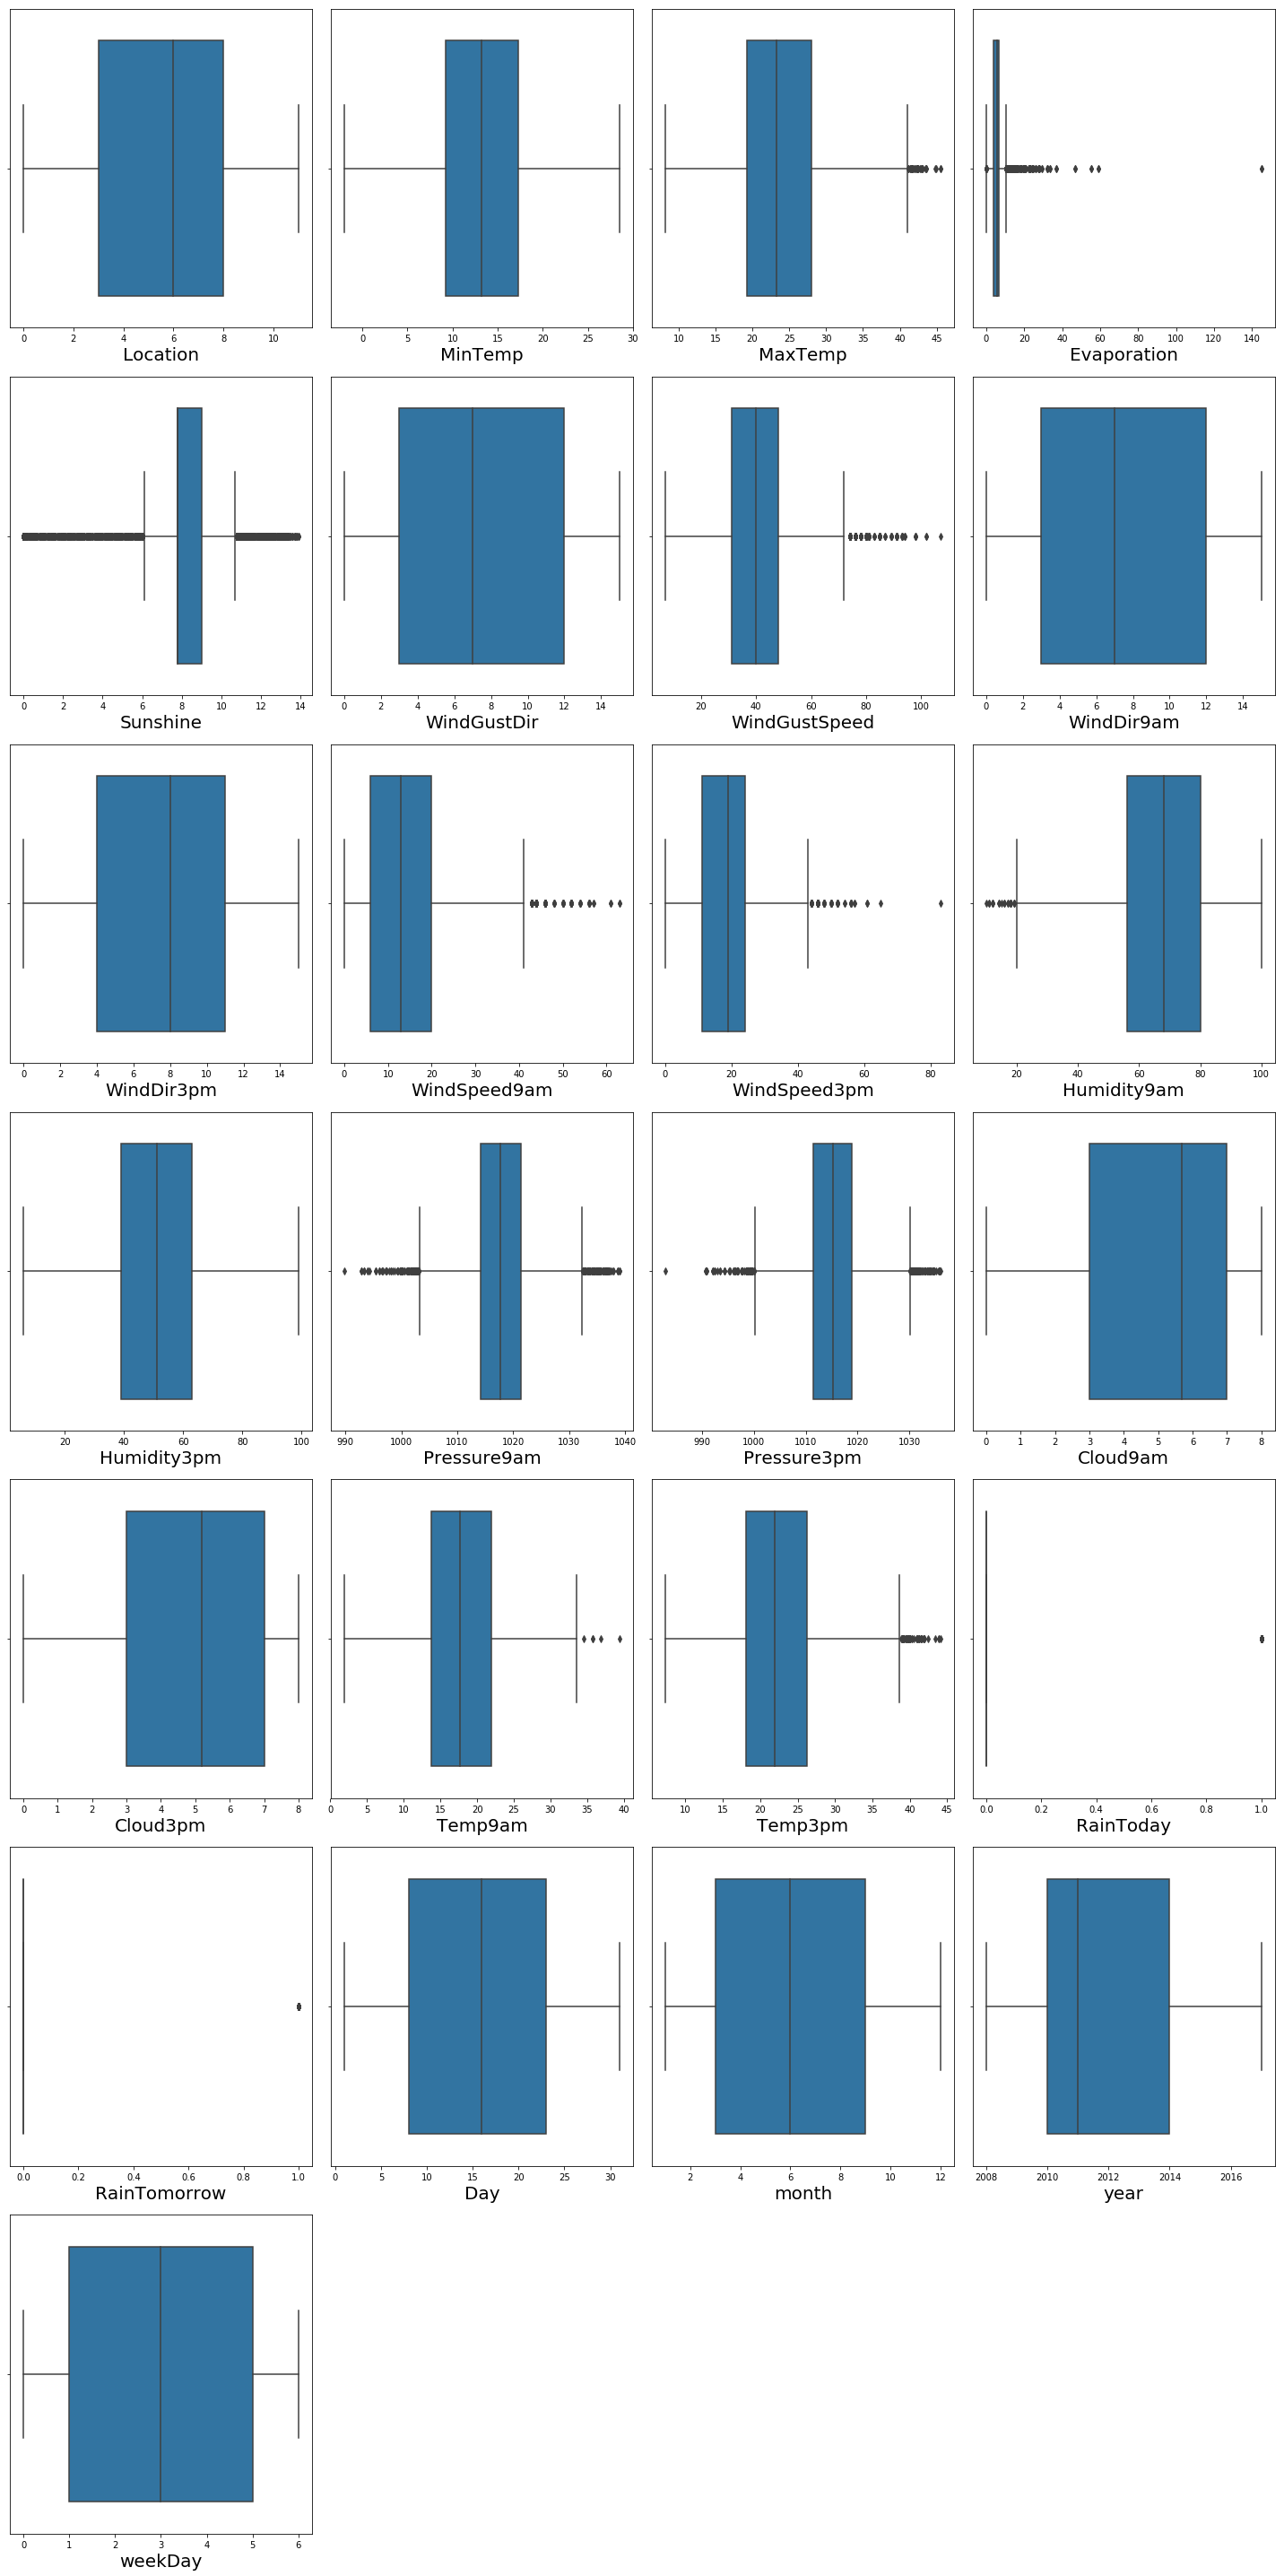

In [411]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainFall.drop("Rainfall",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.boxplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Evaporation,MaxTemp,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Presure9am,Pressure3pm,Temp9am,Temp3pm these features has outliers in it.

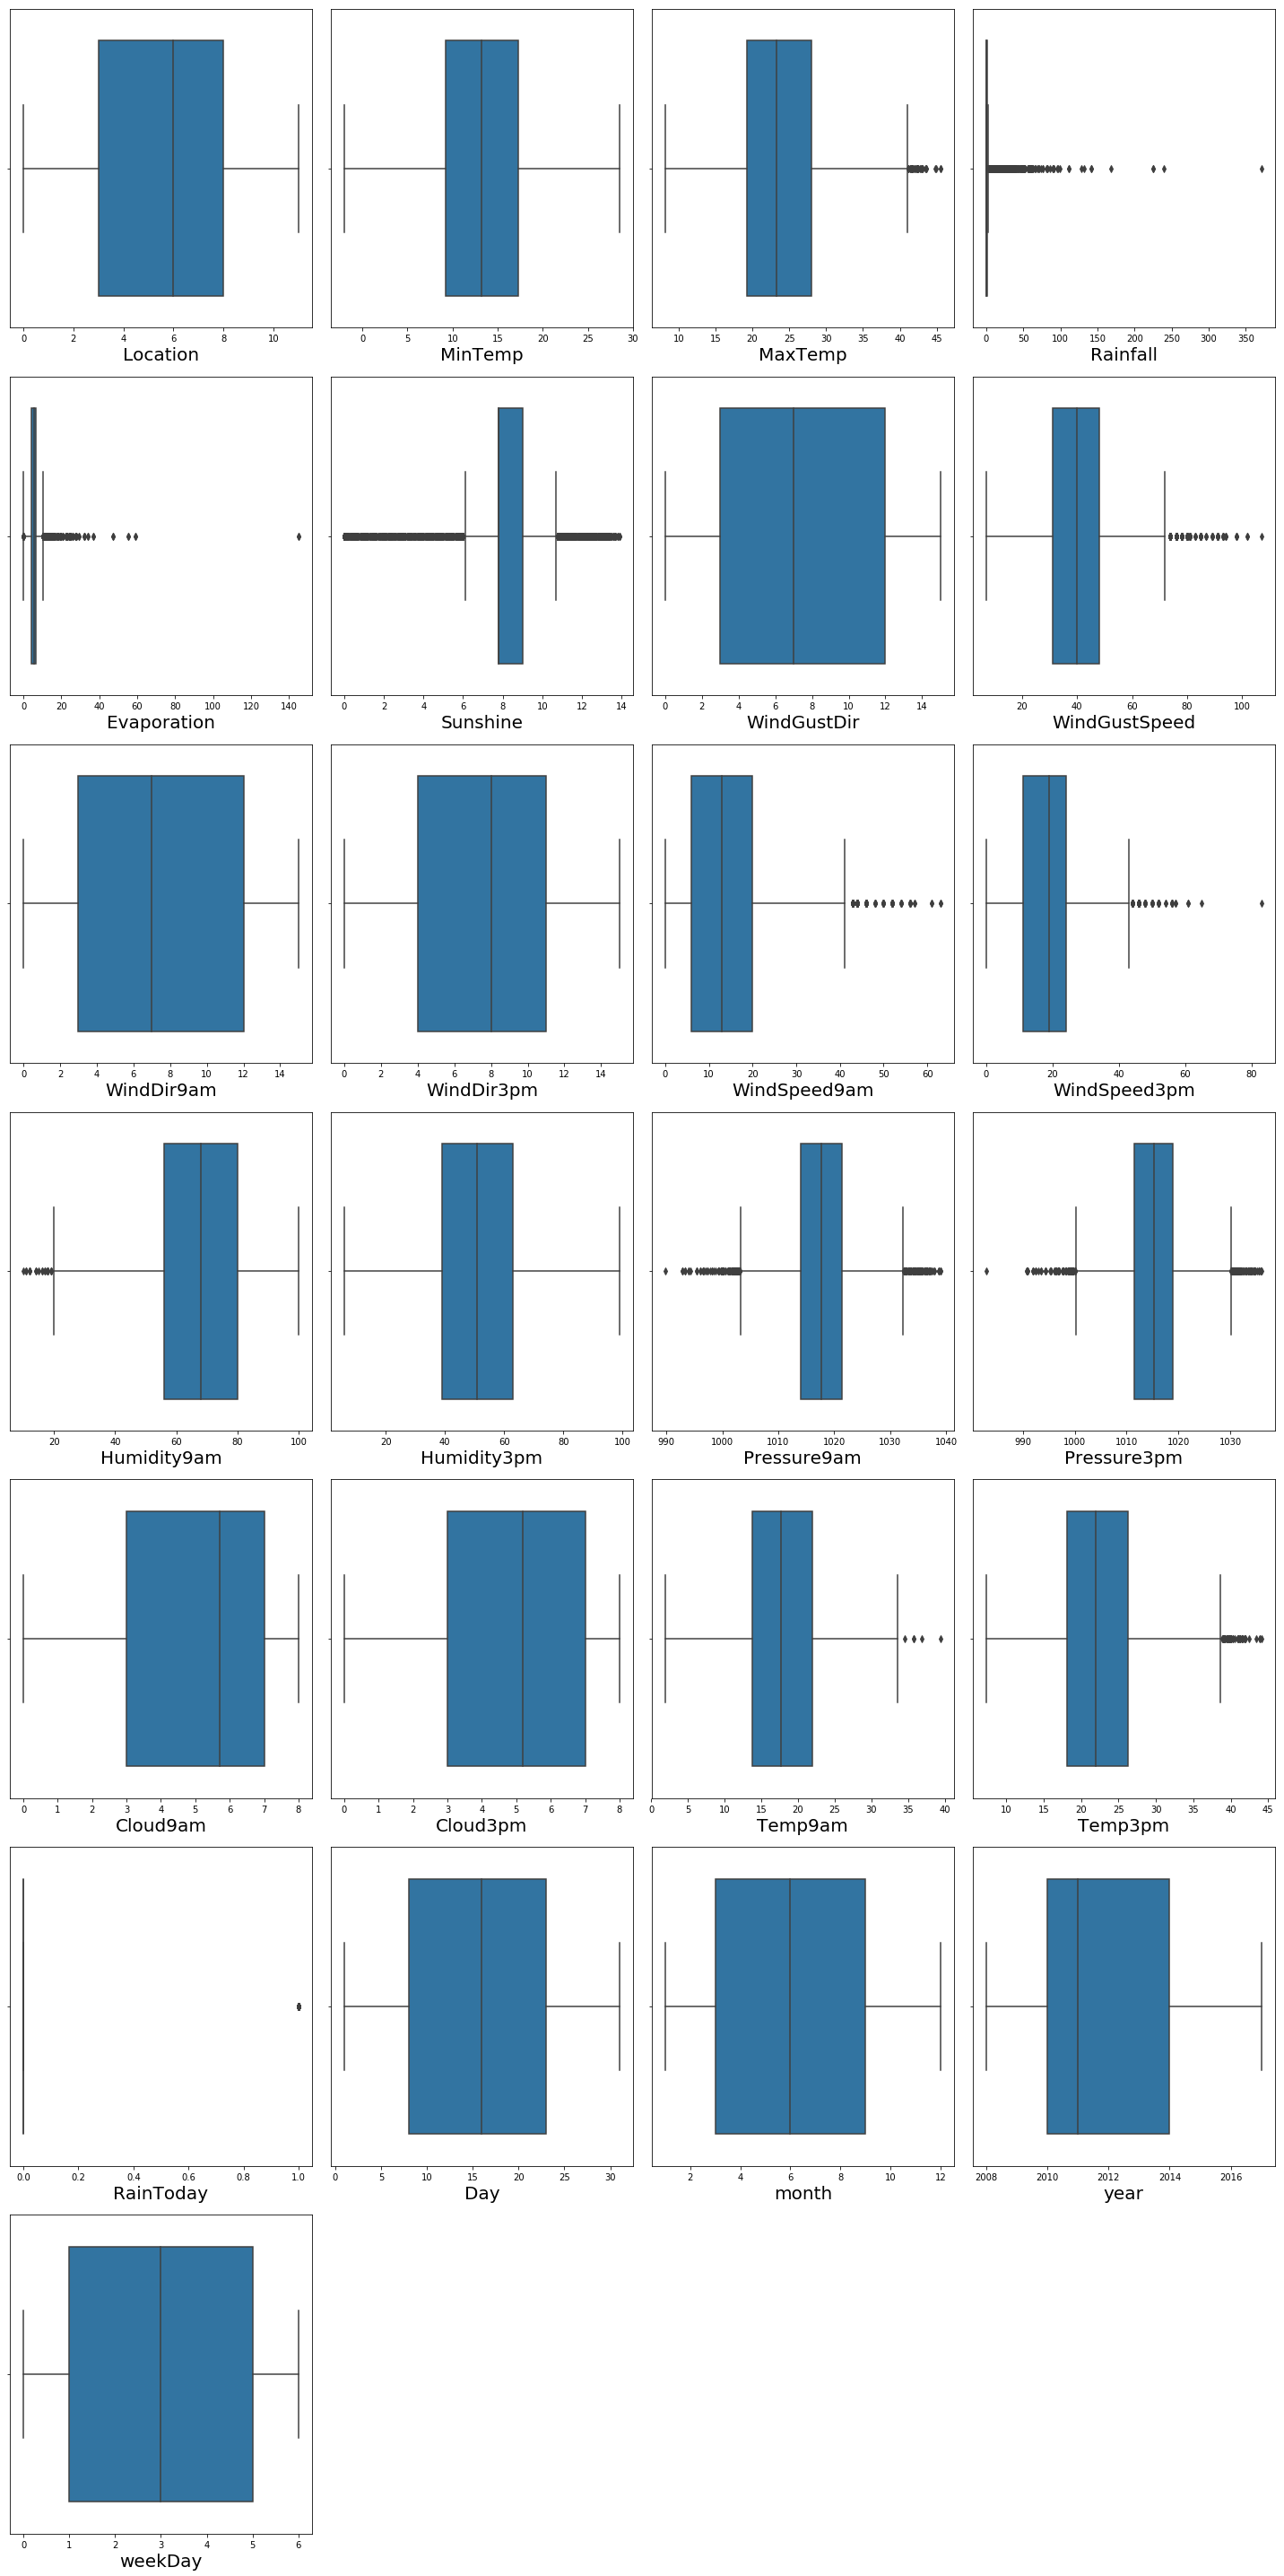

In [412]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainTomorrow.drop("RainTomorrow",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.boxplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Temp3pm,Temp9am,Pressure3pm,Pressure9am,Humidity9am,WindSpeed3pm,WindSpeed9am,WindGustSpeed,Sunshine,Evaporation,Rainfall,MaxTemp these features has outliers.

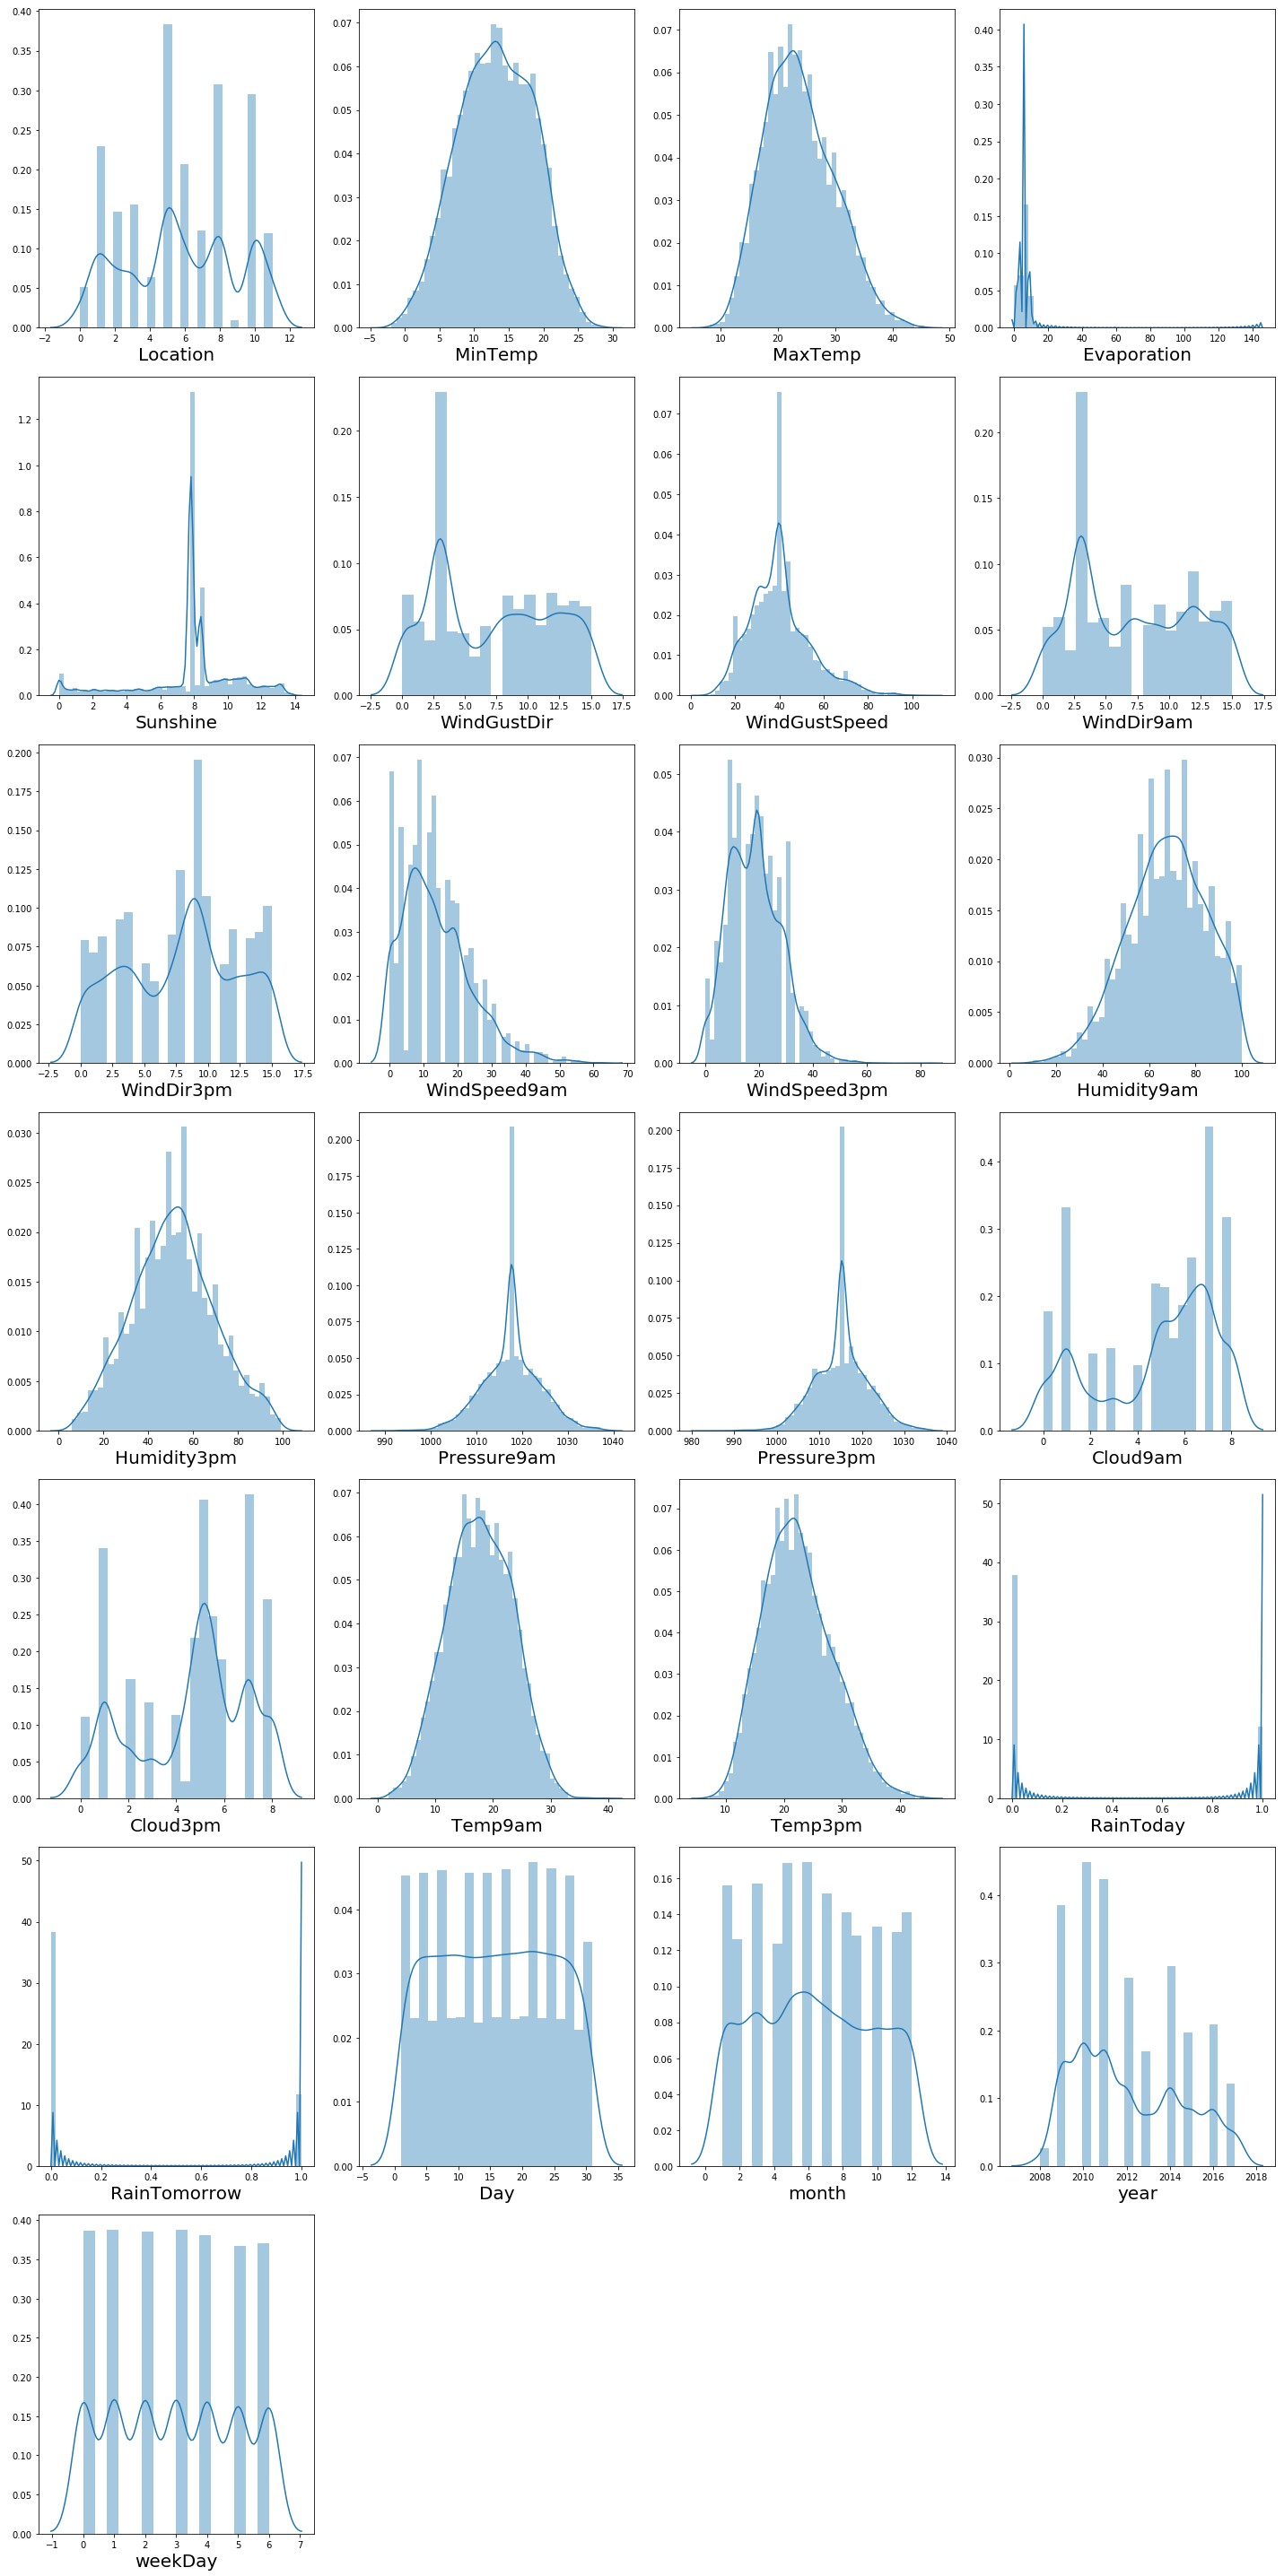

In [413]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainFall.drop("Rainfall",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.distplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Cloud9am,RainToday,RainTomorrow these features are not normally distributed.

In [414]:
df_rainFall.skew()

Location         -0.048193
MinTemp          -0.077583
MaxTemp           0.383784
Rainfall         13.028837
Evaporation      12.411748
Sunshine         -0.865656
WindGustDir       0.128931
WindGustSpeed     0.758193
WindDir9am        0.170898
WindDir3pm       -0.112017
WindSpeed9am      0.971608
WindSpeed3pm      0.516941
Humidity9am      -0.255754
Humidity3pm       0.112618
Pressure9am      -0.027421
Pressure3pm      -0.005431
Cloud9am         -0.629855
Cloud3pm         -0.471422
Temp9am          -0.011739
Temp3pm           0.396195
RainToday         1.197839
RainTomorrow      1.249812
Day               0.000970
month             0.049817
year              0.425323
weekDay           0.024083
dtype: float64

Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Cloud9am,RainToday,RainTomorrow thse features are skewed.

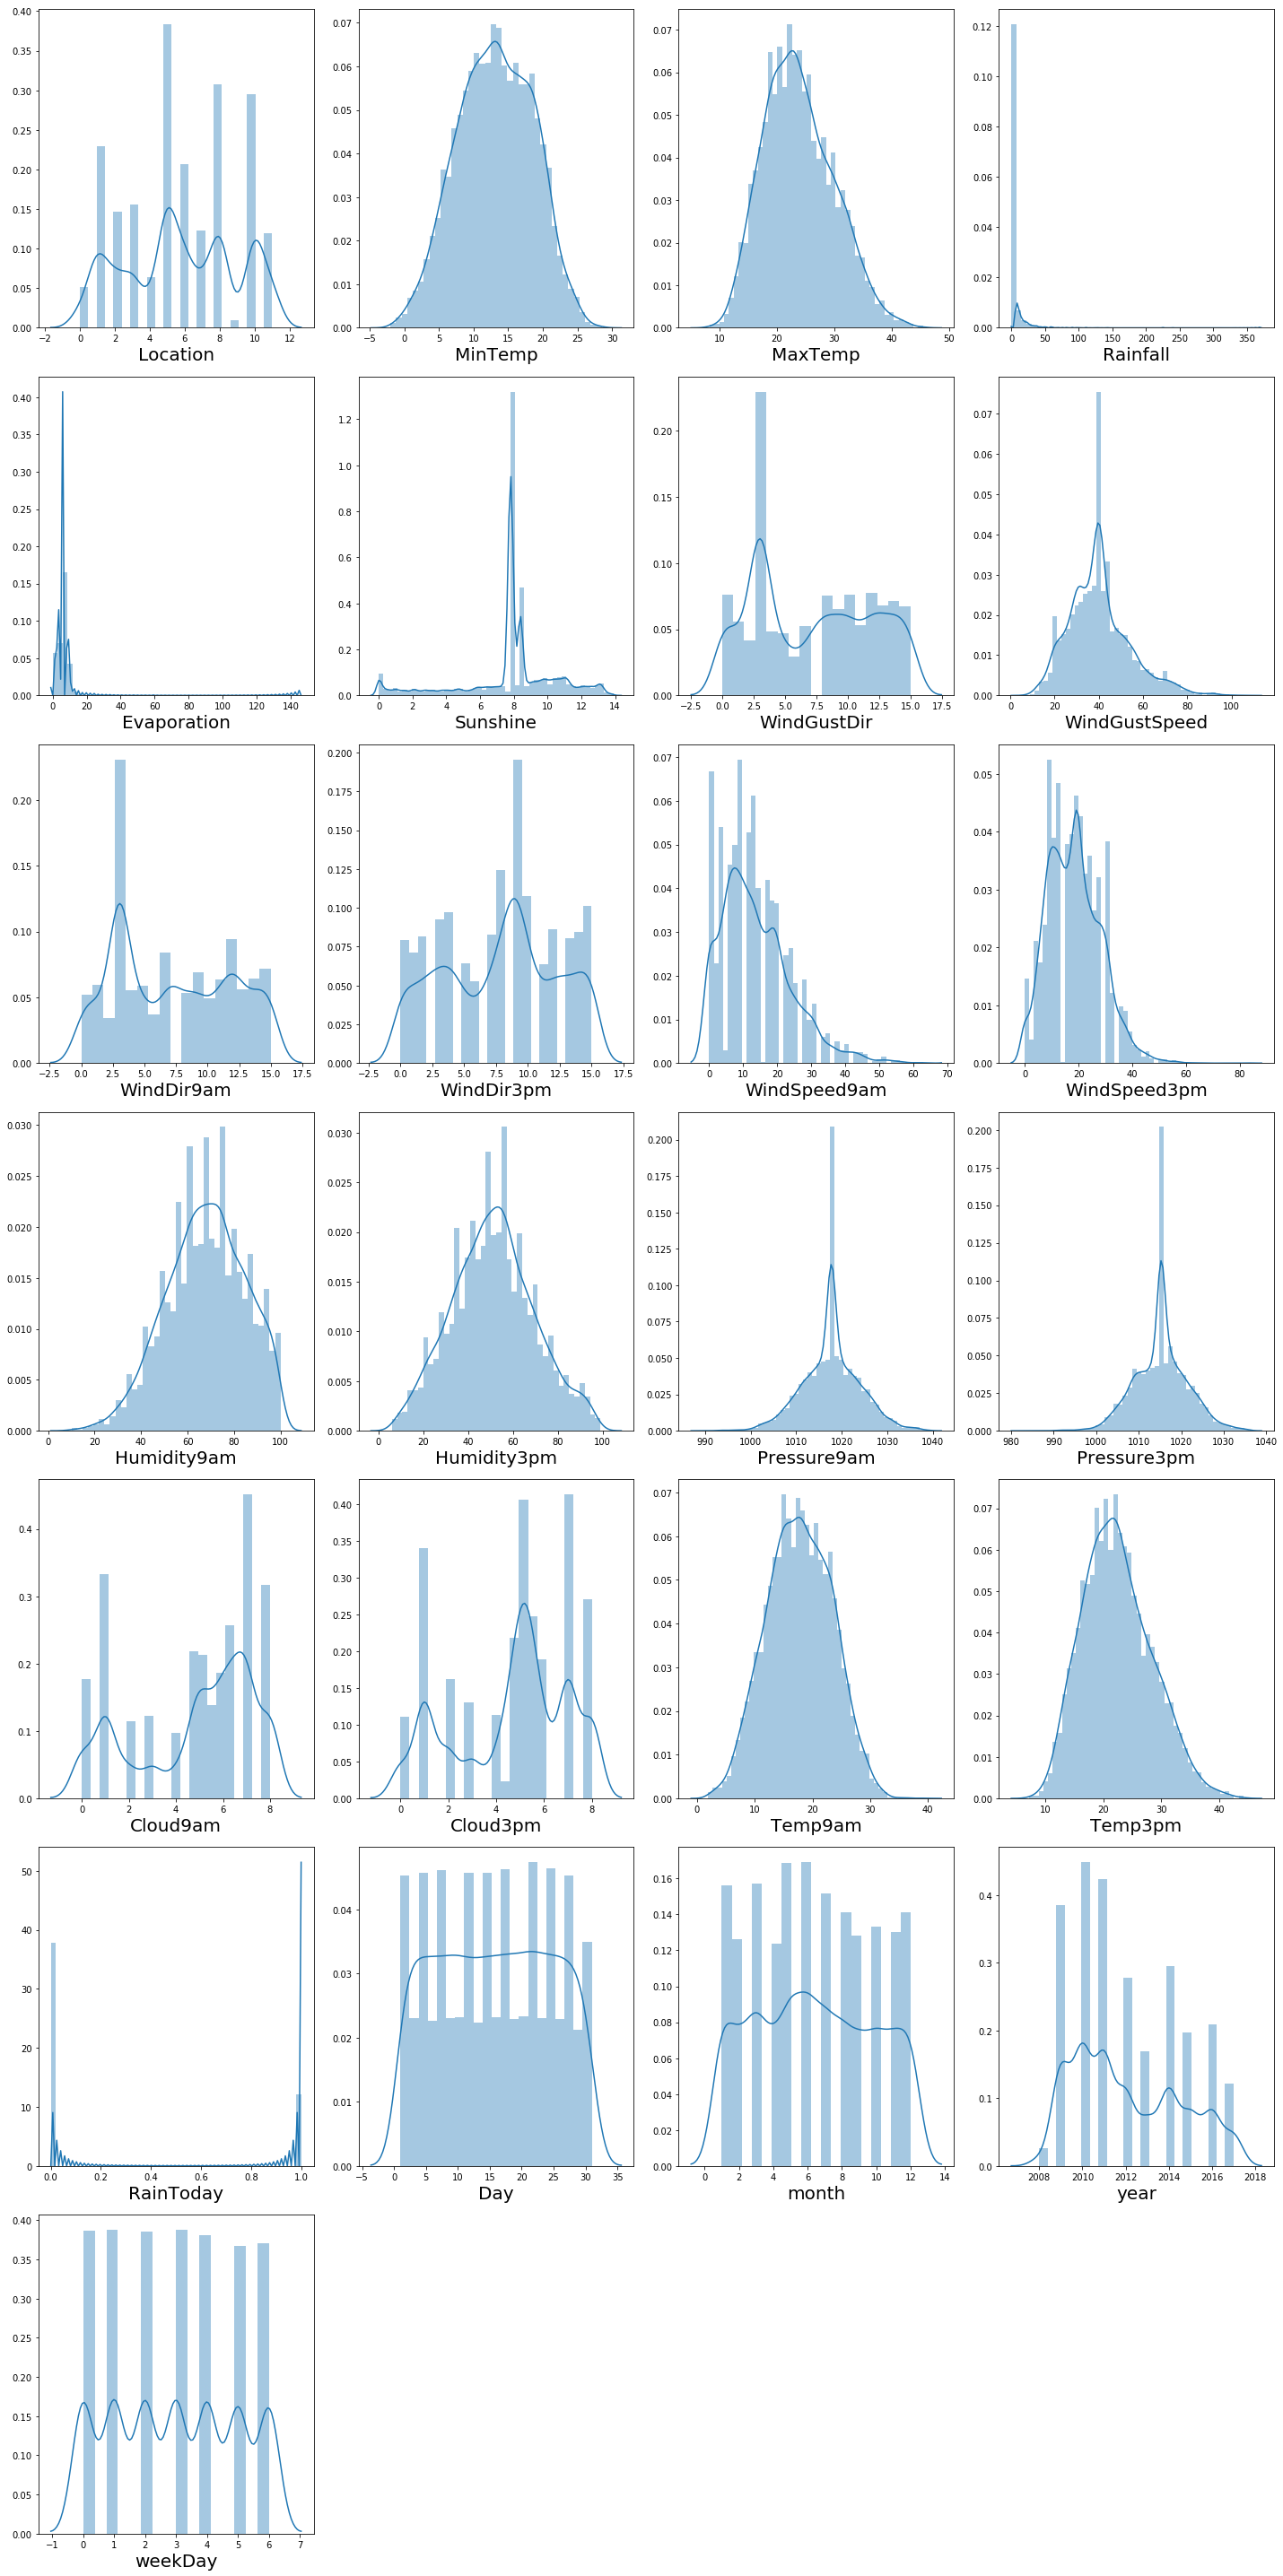

In [415]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainTomorrow.drop("RainTomorrow",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.distplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Cloud9am,RainToday these features are not normally distributed.

In [416]:
df_rainTomorrow.skew()

Location         -0.048025
MinTemp          -0.072049
MaxTemp           0.392470
Rainfall         13.159697
Evaporation      12.325222
Sunshine         -0.874317
WindGustDir       0.121899
WindGustSpeed     0.737694
WindDir9am        0.171192
WindDir3pm       -0.115663
WindSpeed9am      0.941771
WindSpeed3pm      0.516714
Humidity9am      -0.259328
Humidity3pm       0.112004
Pressure9am      -0.032446
Pressure3pm      -0.016275
Cloud9am         -0.623074
Cloud3pm         -0.467749
Temp9am          -0.007564
Temp3pm           0.405149
RainToday         1.222214
RainTomorrow      1.197253
Day               0.000784
month             0.049976
year              0.425109
weekDay           0.022117
dtype: float64

Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Cloud9am,RainToday these are skewed data.

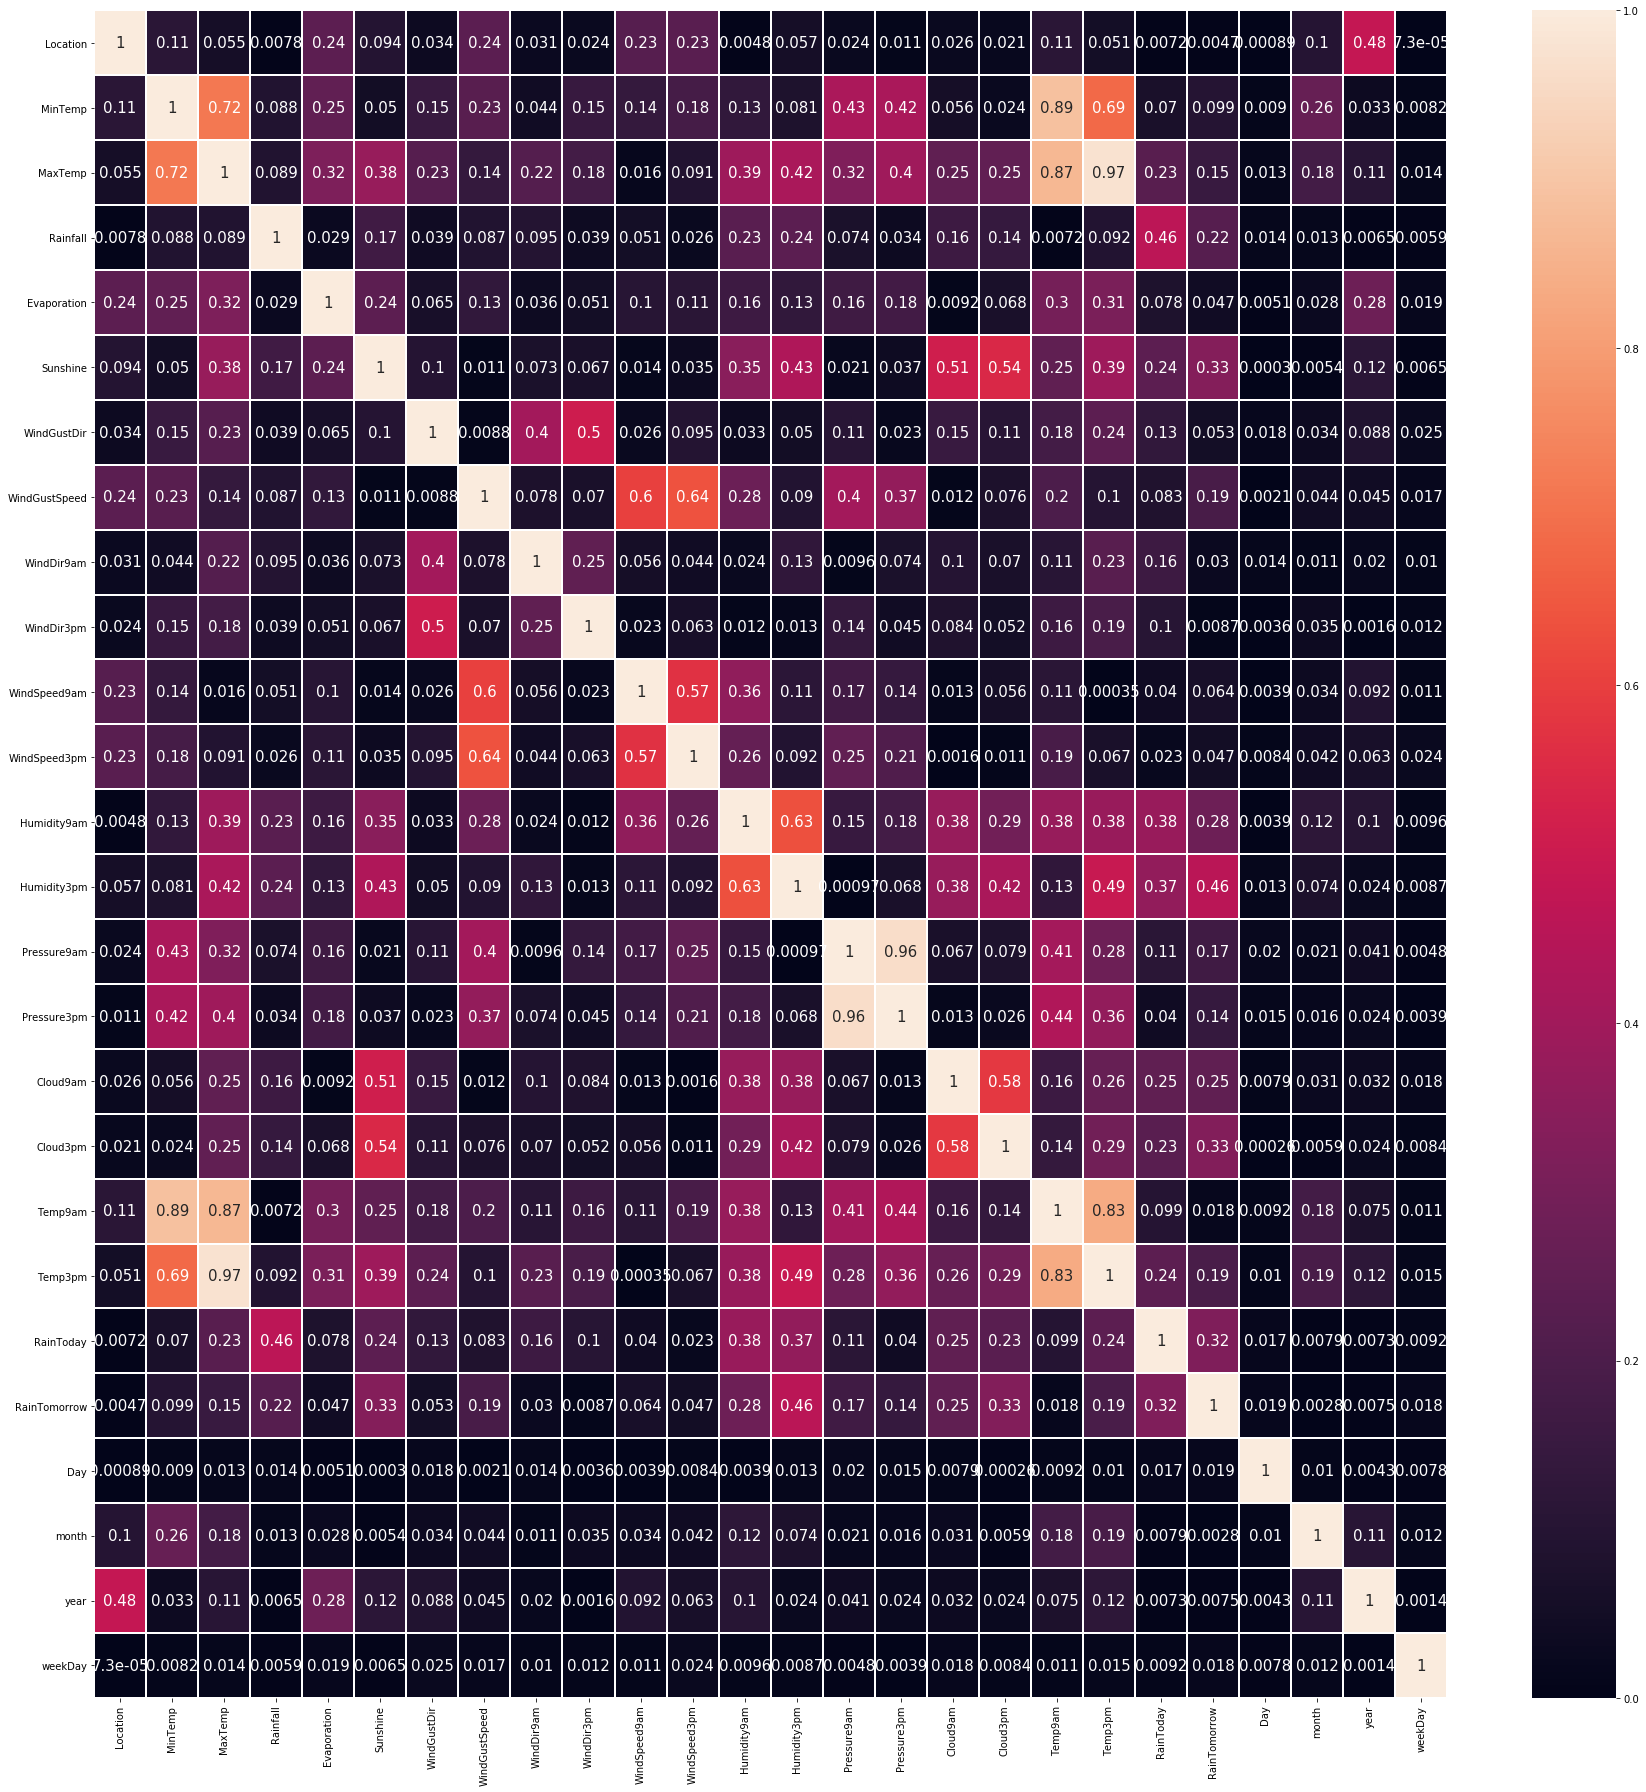

In [417]:
plt.figure(figsize=(25,25))
sns.heatmap(df_rainFall.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

MaxTemp is 97% collinear with Temp3pm.

Pressure3pm and Pressure9am are 96% collinear with each other .

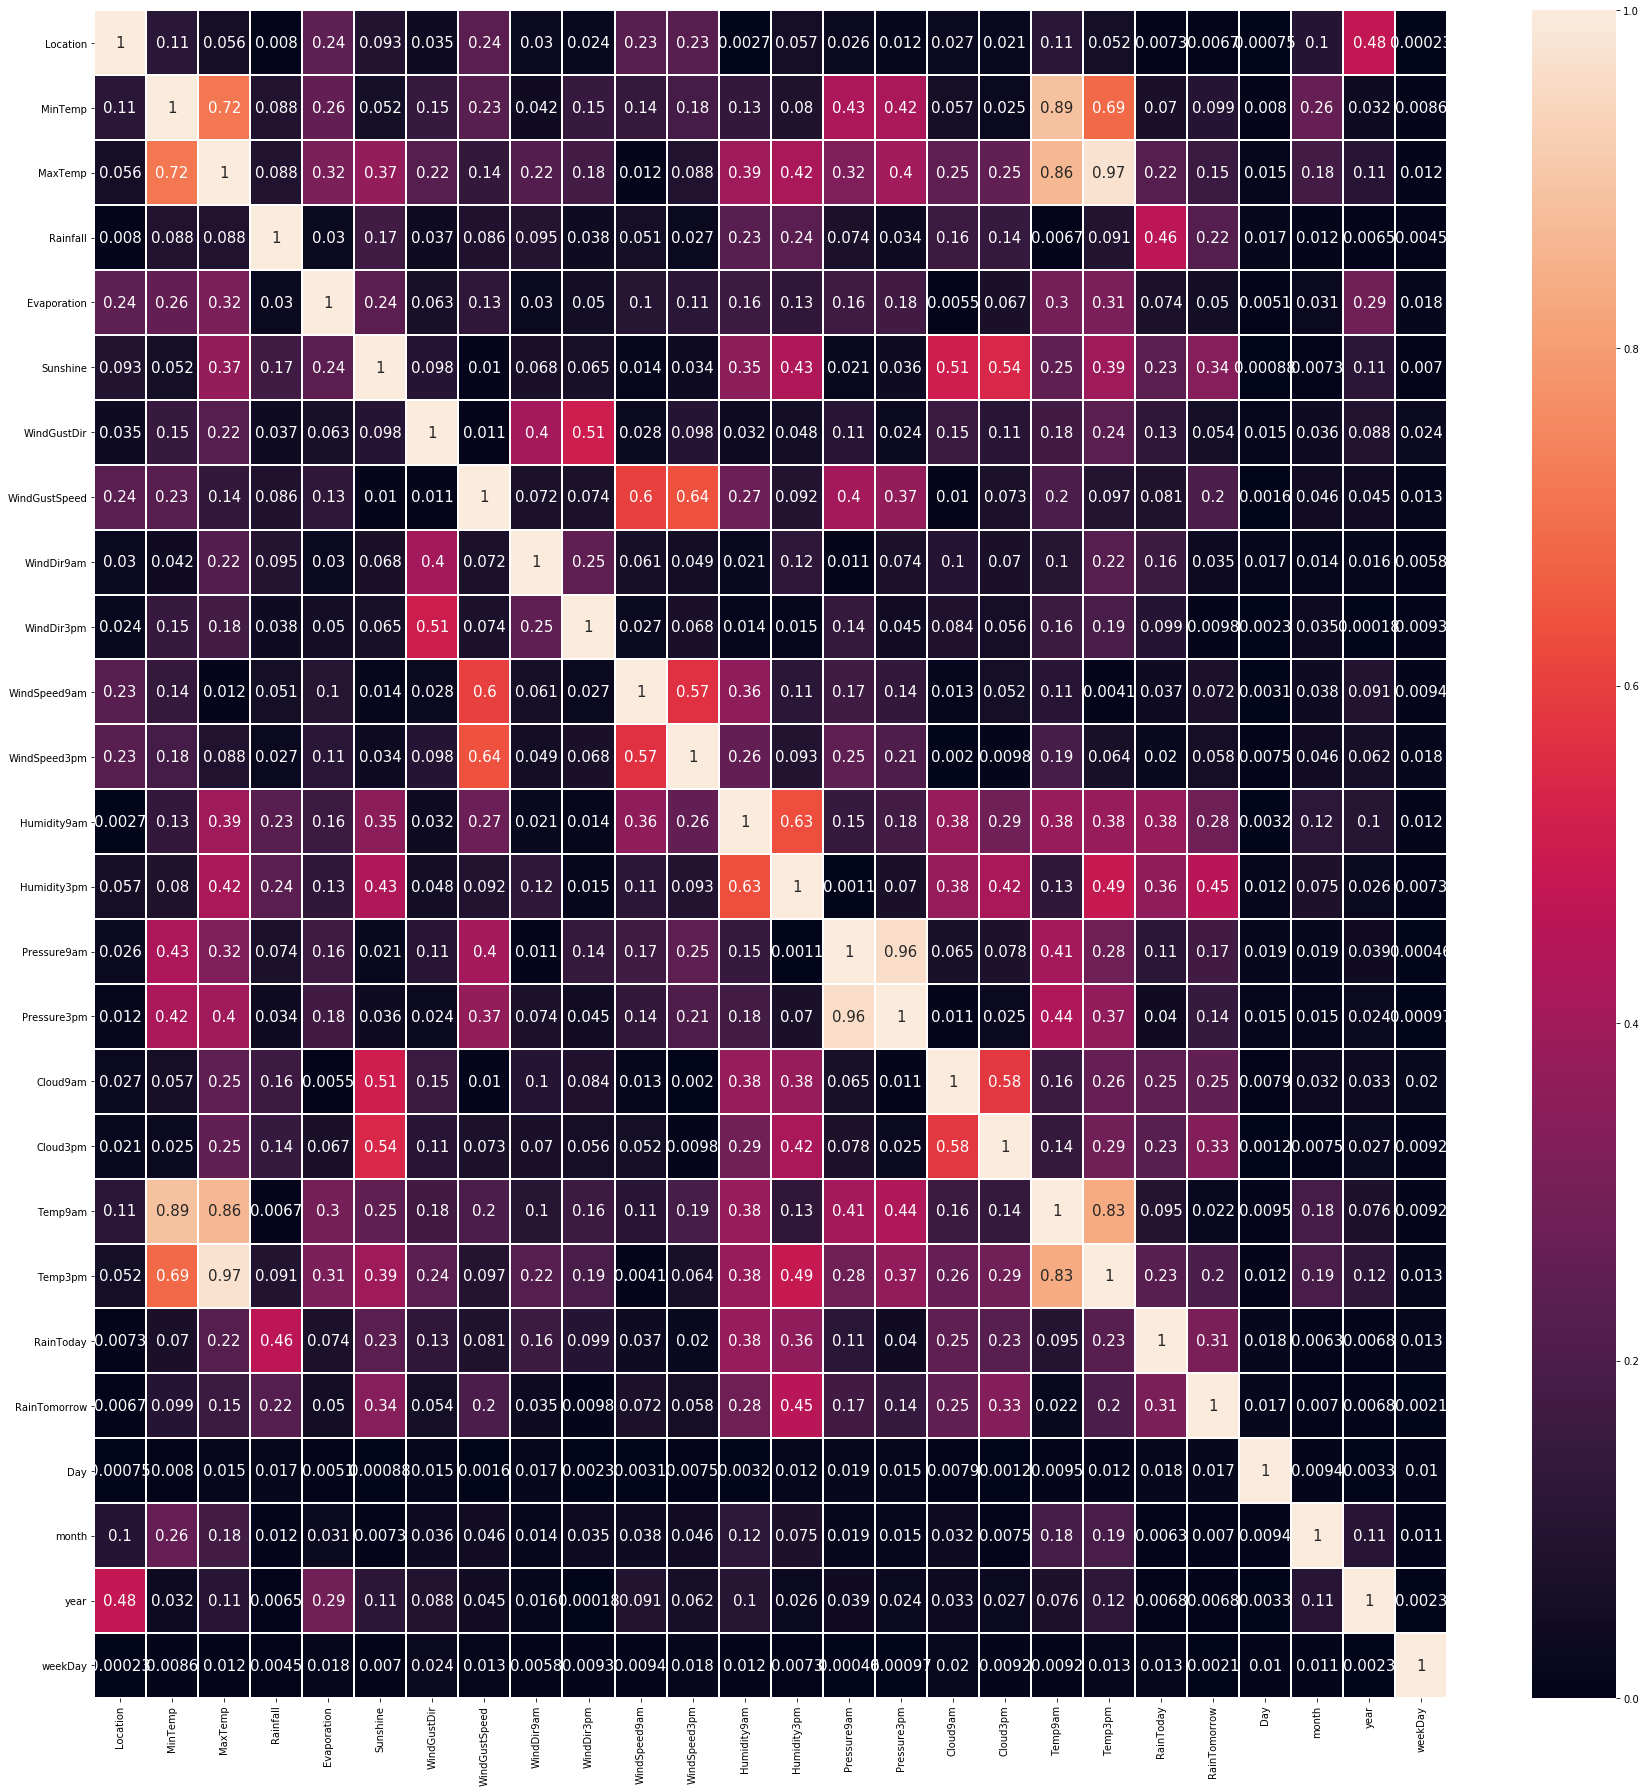

In [418]:
plt.figure(figsize=(25,25))
sns.heatmap(df_rainTomorrow.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

MaxTemp is 97% collinear with Temp3pm.

Pressure3pm and Pressure9am are 96% collinear with each other .

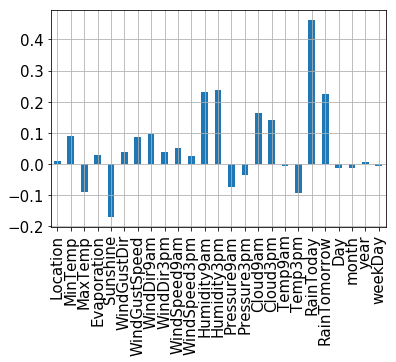

In [419]:
df_rainFall.drop('Rainfall',axis=1).corrwith(df_rainFall.Rainfall).plot(kind='bar',grid=True,fontsize=15)

Day,month,year,weekDay,Temp9am,Location these features having  least coorelation with target Variable i.e. Rainfall

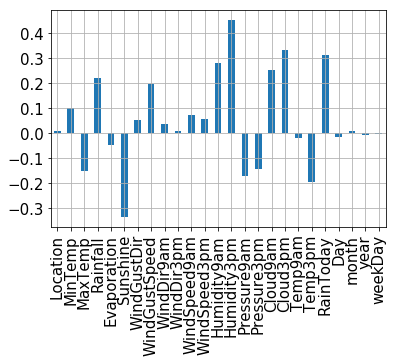

In [420]:
df_rainTomorrow.drop('RainTomorrow',axis=1).corrwith(df_rainTomorrow.RainTomorrow).plot(kind='bar',grid=True,fontsize=15)

Day,month,year,weekDay,Temp9am,WindDir3pm,Location these features having  least coorelation with target Variable i.e. RainTommorow

In [421]:
df_rainFall.shape

(8185, 26)

In [422]:
df_rainTomorrow.shape

(8186, 26)

#### Data Cleaning

In [423]:
df_rainFall.drop_duplicates(inplace=True)
df_rainTomorrow.drop_duplicates(inplace=True)

In [424]:
df_rainFall.shape

(6624, 26)

In [425]:
df_rainTomorrow.shape

(6624, 26)

Both data has duplicates values.

In [426]:
df_rainFall.describe()

Location      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  6624.000000  6624.000000  6624.000000  6624.000000  6624.000000   
mean      5.306159    13.078423    24.091048     2.780148     5.707308   
std       3.099466     5.561187     6.128296    10.591418     3.470936   
min       0.000000    -2.000000     8.200000     0.000000     0.000000   
25%       2.000000     9.000000    19.600000     0.000000     4.000000   
50%       6.000000    13.100000    23.500000     0.000000     5.862616   
75%       8.000000    17.400000    28.400000     0.800000     6.000000   
max      11.000000    28.500000    45.500000   371.000000   145.000000   

          Sunshine  WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  ...  \
count  6624.000000  6624.000000    6624.000000  6624.000000  6624.000000  ...   
mean      7.910608     7.008756      39.029864     7.007397     7.838315  ...   
std       2.728415     4.792060      13.400296     4.551393     4.489083  ...   
min       0.000000     0.000000       7.000000     0.000000     0.000000  ...   
25%       7.806011     3.000000      30.000000     3.000000     4.000000  ...   
50%       7.806011     7.000000      39.000000     7.000000     9.000000  ...   
75%       9.200000    12.000000      46.000000    11.000000    12.000000  ...   
max      13.900000    15.000000     107.000000    15.000000    15.000000  ...   

          Cloud9am     Cloud3pm      Temp9am      Temp3pm    RainToday  \
count  6624.000000  6624.000000  6624.000000  6624.000000  6624.000000   
mean      4.658458     4.513020    17.888669    22.703156     0.237319   
std       2.579975     2.367677     5.728417     5.970651     0.425471   
min       0.000000     0.000000     1.900000     7.300000     0.000000   
25%       2.000000     2.000000    13.900000    18.400000     0.000000   
50%       5.000000     5.000000    17.900000    22.200000     0.000000   
75%       7.000000     6.000000    22.200000    26.800000     0.000000   
max       8.000000     8.000000    39.400000    44.100000     1.000000   

       RainTomorrow          Day        month         year      weekDay  
count   6624.000000  6624.000000  6624.000000  6624.000000  6624.000000  
mean       0.231733    15.759662     6.432216  2012.038647     2.977959  
std        0.421971     8.795574     3.358574     2.297255     1.996932  
min        0.000000     1.000000     1.000000  2008.000000     0.000000  
25%        0.000000     8.000000     4.000000  2010.000000     1.000000  
50%        0.000000    16.000000     6.000000  2012.000000     3.000000  
75%        0.000000    23.000000     9.000000  2014.000000     5.000000  
max        1.000000    31.000000    12.000000  2017.000000     6.000000  

[8 rows x 26 columns]

I searched and know that 1mm of rainfall means 1litre of rain filld per metre square. The max value for rainfall i.e. 371 show that there is disaster occurs or flood occurence.

WindGustSpeed having vales over 100 means there is some cyclone type disaster occurence.

Removing such values from dataset.

In [427]:
df_rainFall=df_rainFall[df_rainFall.Rainfall<200]

In [428]:
df_rainFall=df_rainFall[df_rainFall.WindGustSpeed<100]

In [429]:
df_rainFall[df_rainFall.Evaporation>100]

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
3248        10     15.3     23.9      58.2        145.0  8.384211   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Cloud9am  \
3248            3      41.667283           3           0  ...       8.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  month  year  \
3248       1.0     19.1     23.0          1             0   19     12  2016   

      weekDay  
3248        0  

[1 rows x 26 columns]

In [430]:
df_rainTomorrow.describe()

Location      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  6624.000000  6624.000000  6624.000000  6624.000000  6624.000000   
mean      5.306461    13.073786    24.084734     2.769402     5.722710   
std       3.099923     5.558637     6.128341    10.546658     3.477612   
min       0.000000    -2.000000     8.200000     0.000000     0.000000   
25%       2.000000     9.000000    19.575000     0.000000     4.000000   
50%       6.000000    13.000000    23.500000     0.000000     5.882515   
75%       8.000000    17.400000    28.400000     1.000000     6.000000   
max      11.000000    28.500000    45.500000   371.000000   145.000000   

          Sunshine  WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  ...  \
count  6624.000000  6624.000000    6624.000000  6624.000000  6624.000000  ...   
mean      7.919505     7.026419      39.048681     7.005888     7.838466  ...   
std       2.729783     4.797994      13.370340     4.549039     4.490989  ...   
min       0.000000     0.000000       7.000000     0.000000     0.000000  ...   
25%       7.817426     3.000000      30.000000     3.000000     4.000000  ...   
50%       7.817426     7.000000      39.000000     7.000000     8.000000  ...   
75%       9.200000    12.000000      46.000000    11.000000    12.000000  ...   
max      13.900000    15.000000     107.000000    15.000000    15.000000  ...   

          Cloud9am     Cloud3pm      Temp9am      Temp3pm    RainToday  \
count  6624.000000  6624.000000  6624.000000  6624.000000  6624.000000   
mean      4.643889     4.504441    17.881232    22.697182     0.234450   
std       2.572512     2.361009     5.729681     5.967643     0.423687   
min       0.000000     0.000000     1.900000     7.300000     0.000000   
25%       2.000000     2.000000    13.800000    18.400000     0.000000   
50%       5.000000     5.000000    17.900000    22.200000     0.000000   
75%       7.000000     6.000000    22.200000    26.800000     0.000000   
max       8.000000     8.000000    39.400000    44.100000     1.000000   

       RainTomorrow          Day        month         year      weekDay  
count   6624.000000  6624.000000  6624.000000  6624.000000  6624.000000  
mean       0.237319    15.748943     6.434028  2012.037289     2.990338  
std        0.425471     8.794511     3.359329     2.296982     2.004351  
min        0.000000     1.000000     1.000000  2008.000000     0.000000  
25%        0.000000     8.000000     4.000000  2010.000000     1.000000  
50%        0.000000    16.000000     6.000000  2012.000000     3.000000  
75%        0.000000    23.000000     9.000000  2014.000000     5.000000  
max        1.000000    31.000000    12.000000  2017.000000     6.000000  

[8 rows x 26 columns]

In [431]:
df_rainTomorrow=df_rainTomorrow[df_rainTomorrow.Rainfall<200]


In [432]:
## Removing Outliers using z-score to both data set.

zs=zscore(df_rainFall[[ 'Evaporation','MaxTemp','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
filtered=(np.abs(zs)<3).all(axis=1)
df_rainFall=df_rainFall[filtered]

zs=zscore(df_rainTomorrow[[ 'Evaporation','Rainfall','MaxTemp','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
filtered=(np.abs(zs)<3).all(axis=1)
df_rainTomorrow=df_rainTomorrow[filtered]

In [433]:
df_rainFall.shape

(6365, 26)

In [434]:
df_rainTomorrow.shape

(6258, 26)

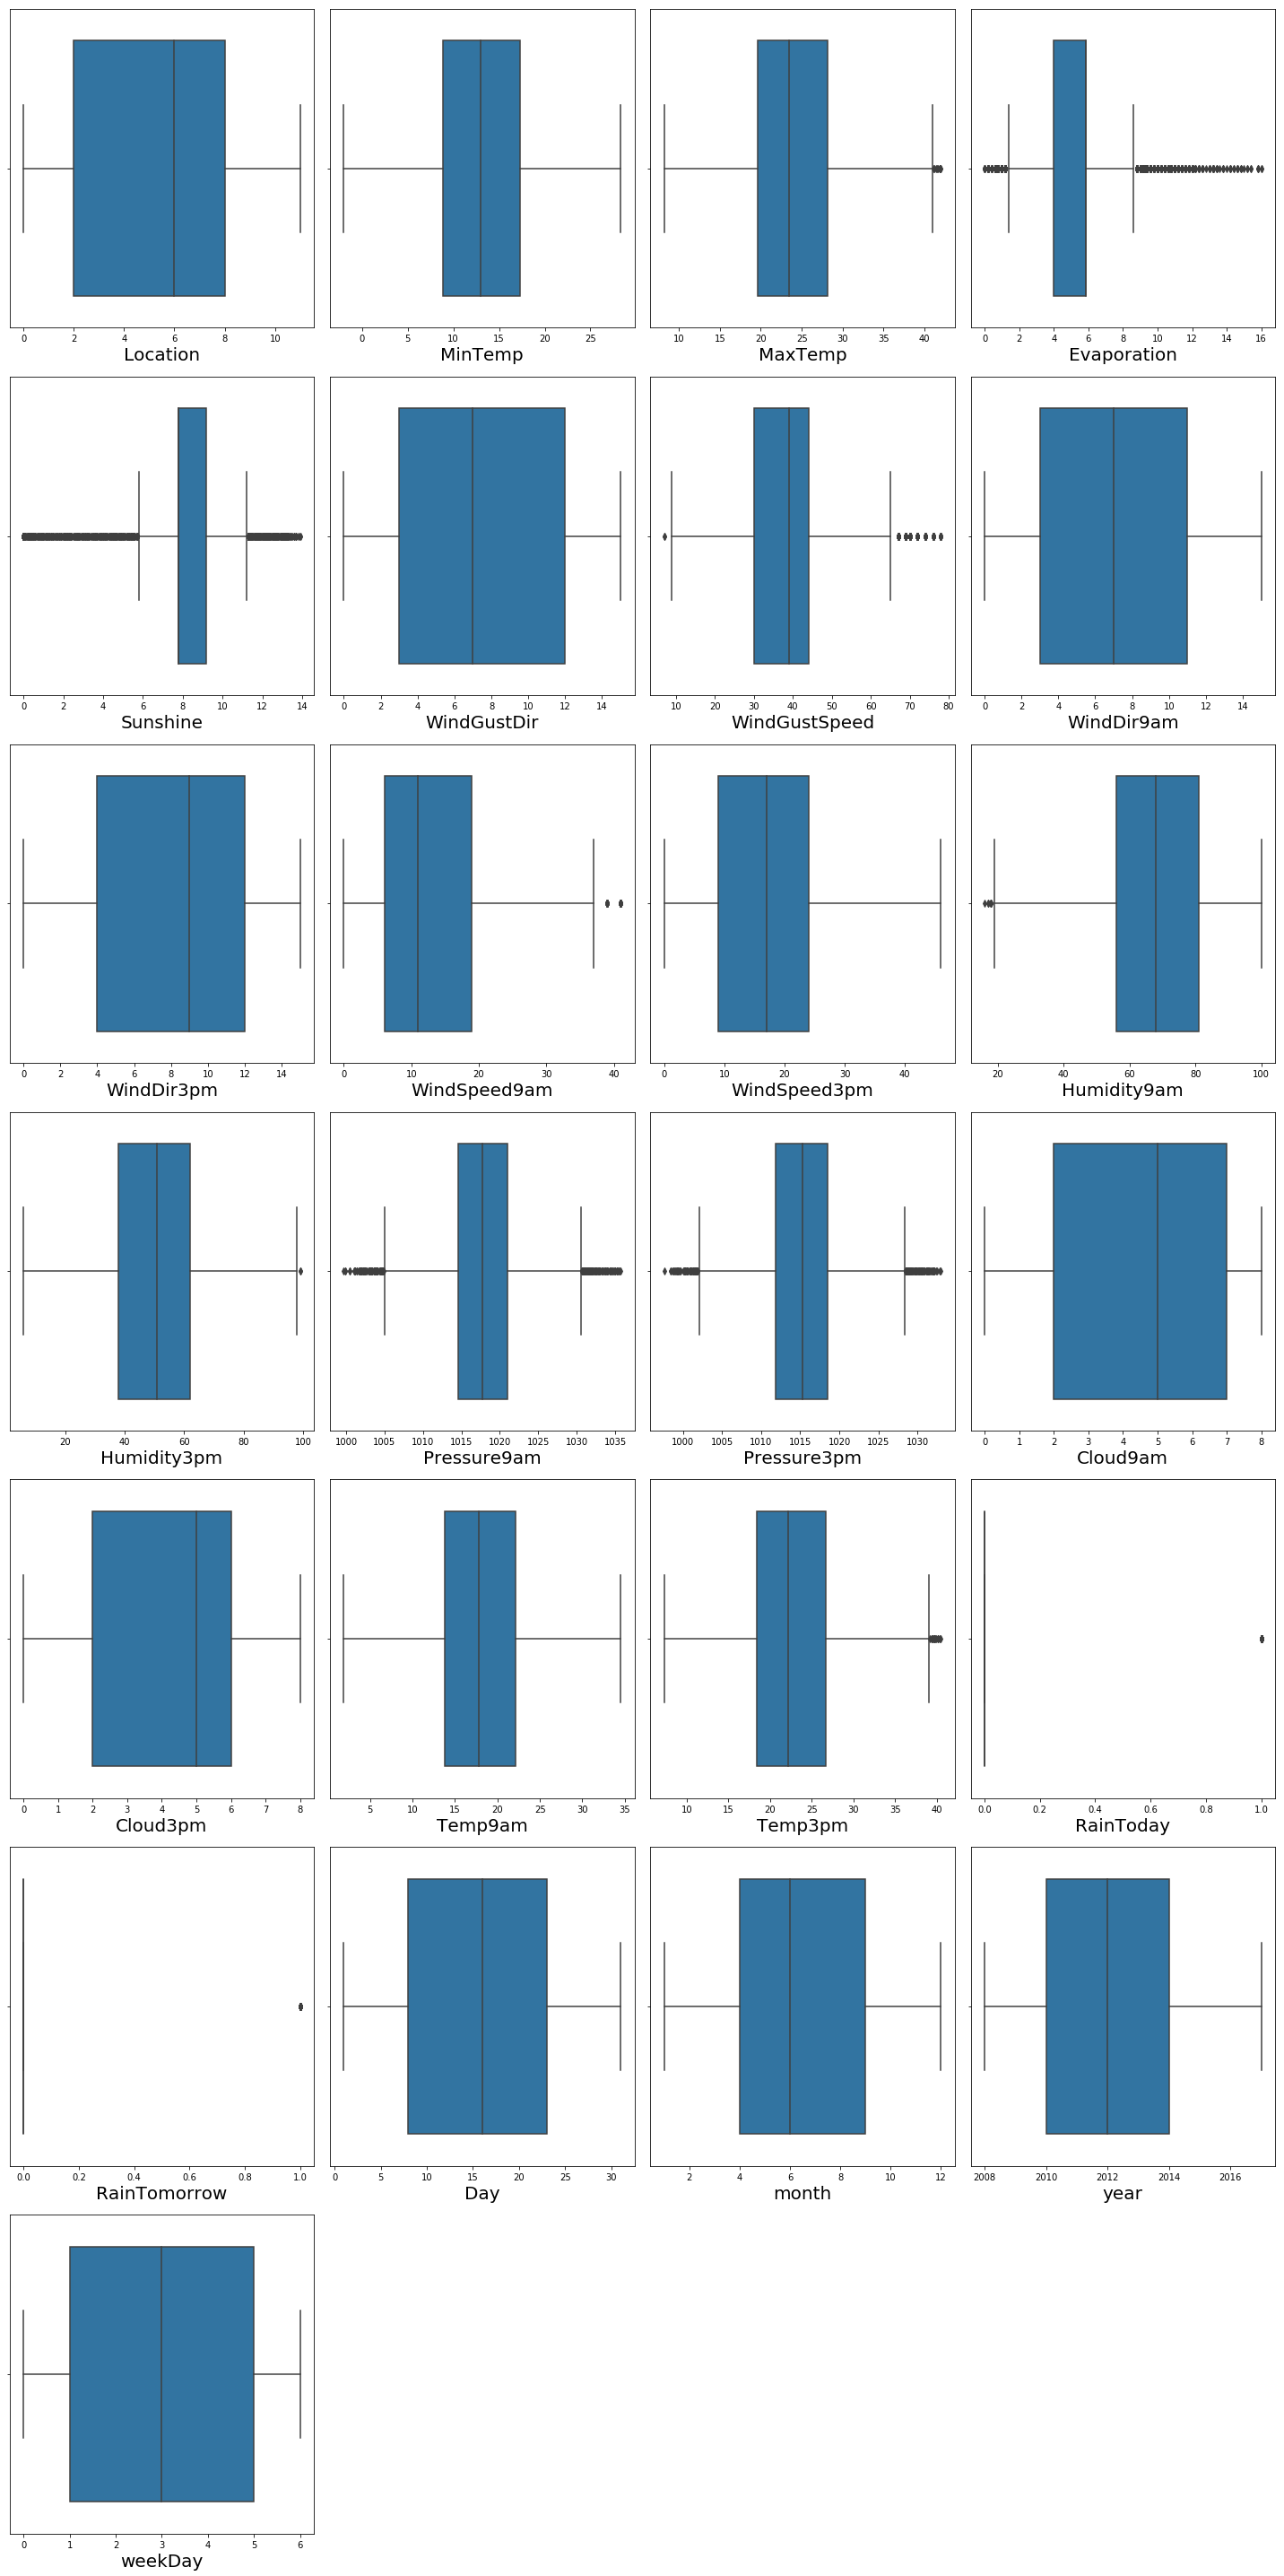

In [435]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainFall.drop("Rainfall",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.boxplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

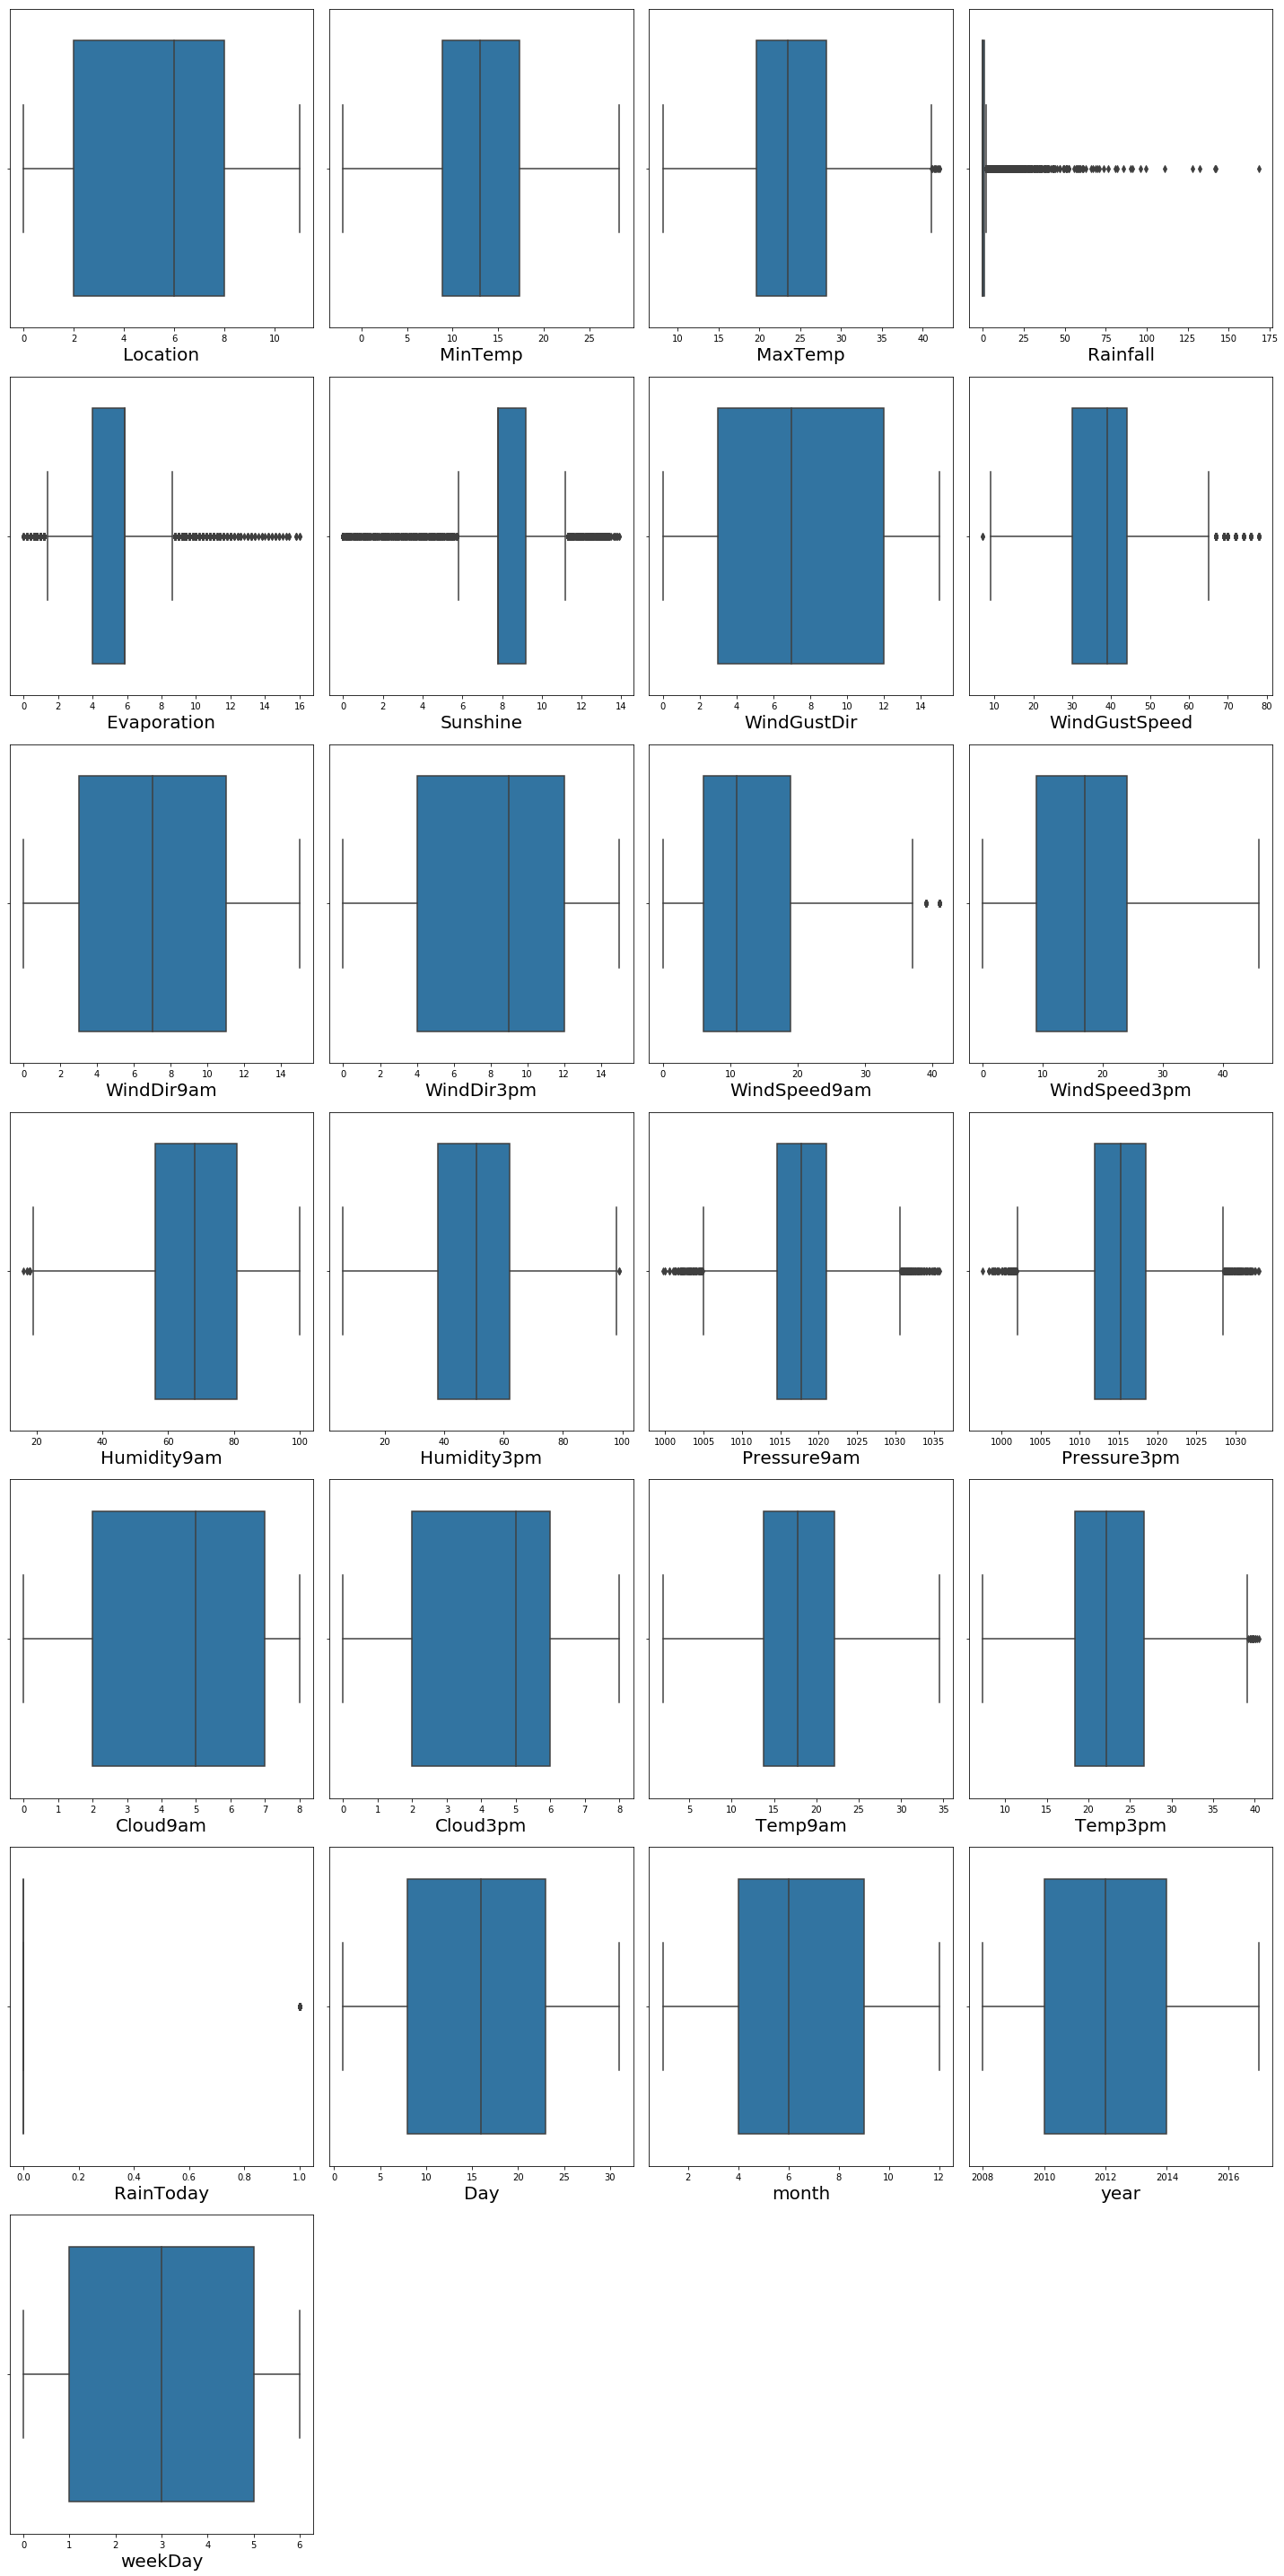

In [436]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainTomorrow.drop("RainTomorrow",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.boxplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

 From above two graphs for both dataset there we reduced some Outliers.

In [437]:
##Normalizing both dataset

features=['Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Cloud9am','RainToday','RainTomorrow']
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
df_rainFall[features]=scalar.fit_transform(df_rainFall[features].values)
df_rainFall[features].head()

features=['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Cloud9am','RainToday']
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
df_rainTomorrow[features]=scalar.fit_transform(df_rainTomorrow[features].values)
df_rainTomorrow[features].head()

Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.766797     0.187963  -0.16155       0.524621      0.909131      0.789586   
1 -0.660767     0.187963  -0.16155       0.524621     -0.843383      0.594862   
2 -0.660767     0.187963  -0.16155       0.674480      0.827655      0.979477   
3 -0.660767     0.187963  -0.16155      -1.184324      0.079937     -0.844776   
4  1.128525     0.187963  -0.16155       0.294122     -0.395986      0.394742   

   Cloud9am  RainToday  
0  1.379062  -0.532381  
1  0.682024  -0.532381  
2  0.682024  -0.532381  
3  0.682024  -0.532381  
4  0.948493  -0.532381

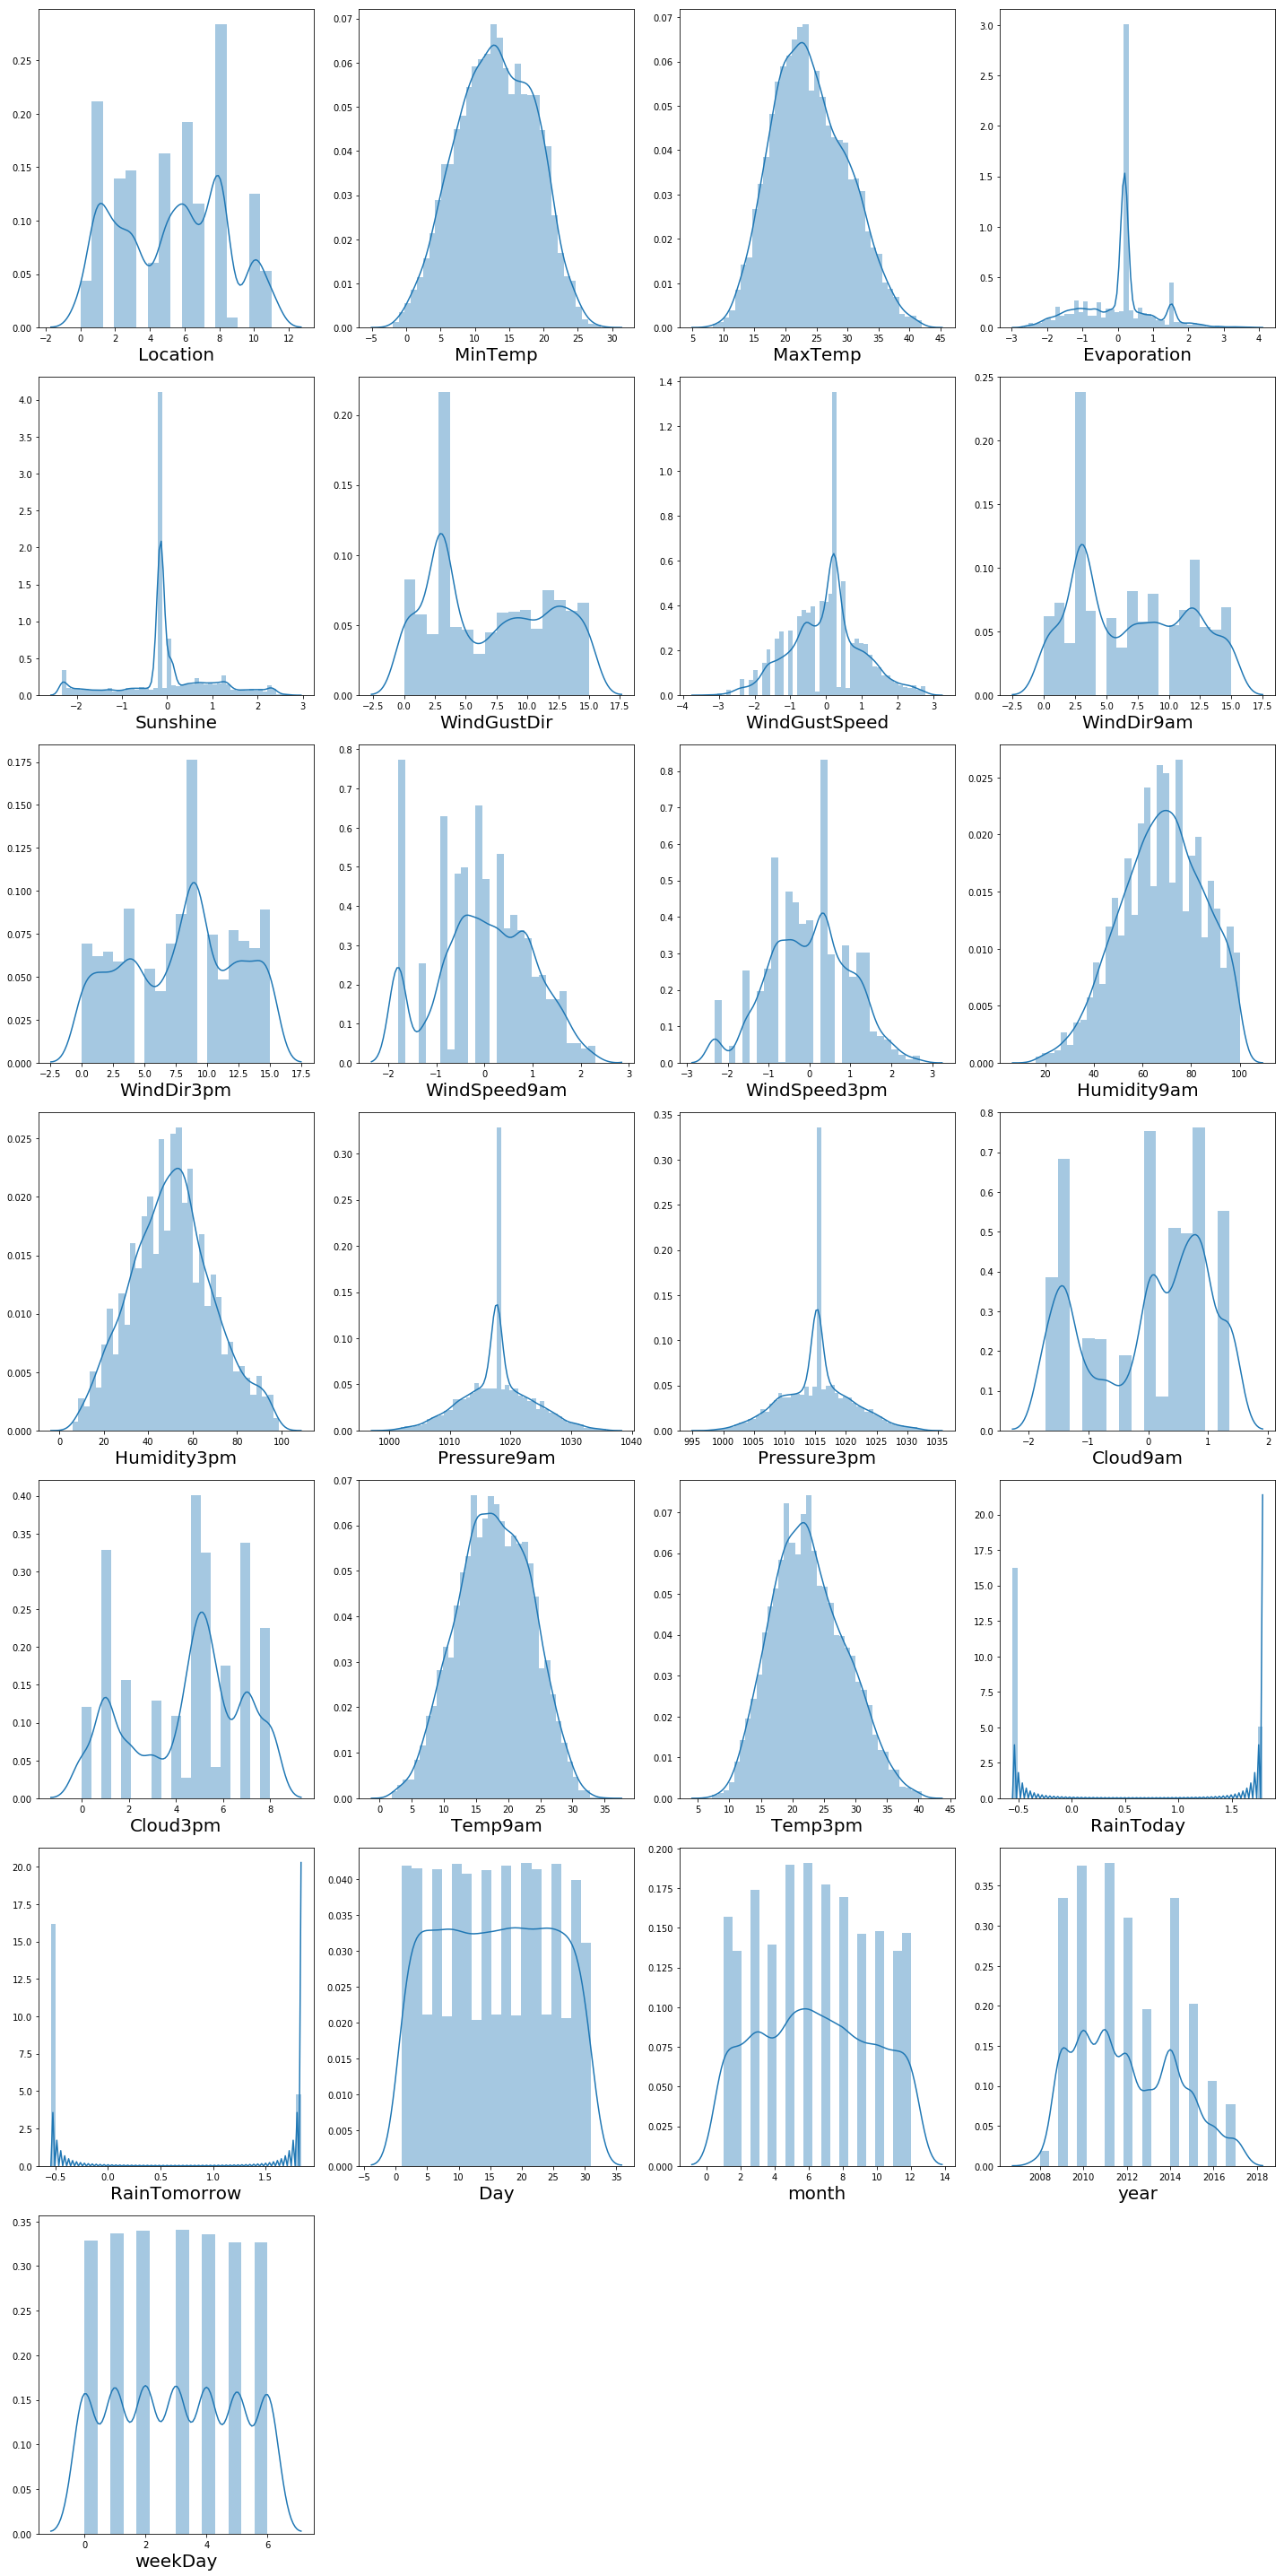

In [438]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainFall.drop("Rainfall",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.distplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

In [439]:
df_rainFall.skew()

Location         0.010888
MinTemp         -0.080163
MaxTemp          0.276718
Rainfall         7.590250
Evaporation      0.019751
Sunshine        -0.067496
WindGustDir      0.183016
WindGustSpeed    0.002411
WindDir9am       0.200672
WindDir3pm      -0.125158
WindSpeed9am    -0.130838
WindSpeed3pm    -0.075129
Humidity9am     -0.240600
Humidity3pm      0.148210
Pressure9am      0.058881
Pressure3pm      0.079394
Cloud9am        -0.407834
Cloud3pm        -0.378173
Temp9am         -0.069150
Temp3pm          0.297780
RainToday        1.233667
RainTomorrow     1.295063
Day              0.003758
month            0.039374
year             0.359569
weekDay          0.011828
dtype: float64

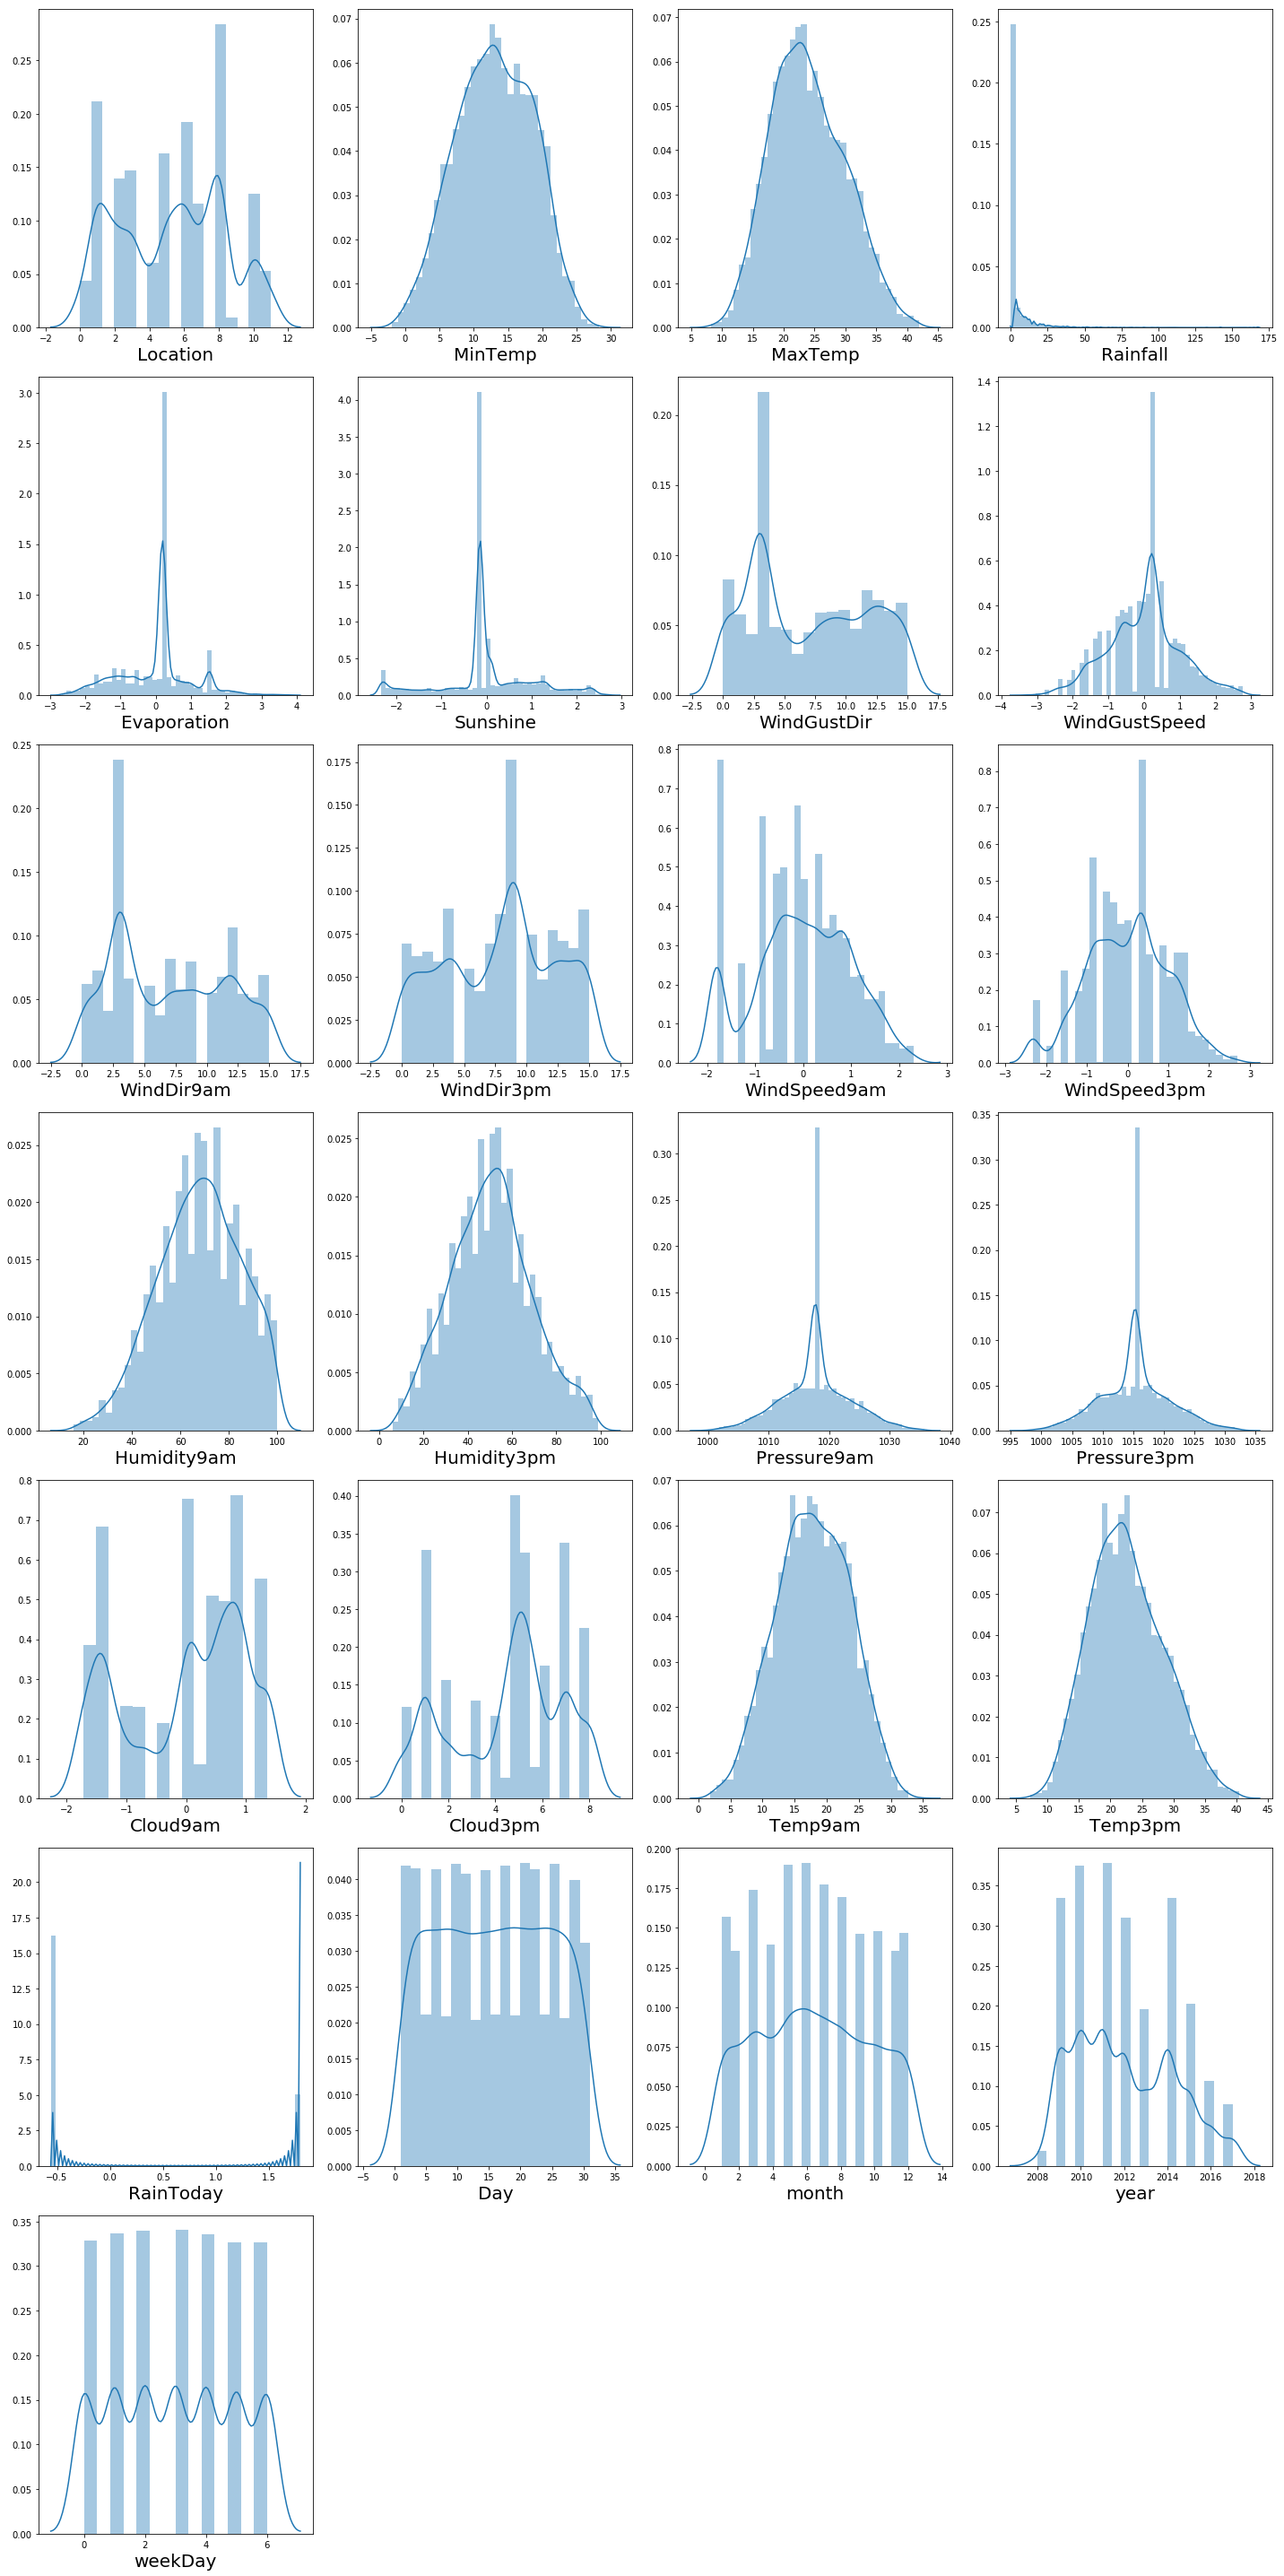

In [440]:
plt.figure(figsize=(20,40))
graph=1
for col in df_rainTomorrow.drop("RainTomorrow",axis=1):
    if graph<=27:
        plt.subplot(7,4,graph)
        sns.distplot(df_rainFall[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

In [441]:
df_rainTomorrow.skew()

Location         0.002772
MinTemp         -0.062100
MaxTemp          0.275328
Rainfall         1.018335
Evaporation      0.016440
Sunshine        -0.051236
WindGustDir      0.177651
WindGustSpeed    0.001434
WindDir9am       0.212835
WindDir3pm      -0.122524
WindSpeed9am    -0.131552
WindSpeed3pm    -0.074960
Humidity9am     -0.237786
Humidity3pm      0.146586
Pressure9am      0.055880
Pressure3pm      0.073740
Cloud9am        -0.400245
Cloud3pm        -0.366906
Temp9am         -0.062681
Temp3pm          0.297059
RainToday        1.346298
RainTomorrow     1.313093
Day              0.000337
month            0.033532
year             0.355285
weekDay          0.009097
dtype: float64

From above two graphs and their respective skewed values we reduced the skewness and normalized the columns.

In [442]:
## Dropping Columns On the basis of Multi-Co_linearity to both dataset..

df_rainFall.drop(columns=['MaxTemp',"Pressure3pm"],inplace=True)
df_rainTomorrow.drop(columns=['MaxTemp',"Pressure3pm"],inplace=True)

#### DataLoss

In [443]:
df_rainFall.shape

(6365, 24)

In [444]:
df_rainTomorrow.shape

(6258, 24)

In [445]:
print(f"Data Lost in prediction of Rainfall::{round(((8185-6365)/8185)*100,2)}%")
print(f"Data Lost in prediction of RainTommorow::{round(((8185-6258)/8185)*100,2)}%")

print(f"No. of duplicates records in prdiction of Rainfall dataset:: {8185-6624}")

print(f"No. of duplicates records in prdiction of RainTommorow dataset:: {8186-6624}")

Data Lost in prediction of Rainfall::22.24%
Data Lost in prediction of RainTommorow::23.54%
No. of duplicates records in prdiction of Rainfall dataset:: 1561
No. of duplicates records in prdiction of RainTommorow dataset:: 1562


This means about 19% of records have duplicates values. thats why we lost total of 22% and 23.5% of data.

## `Model Deployment for Regression Problem(Predicting Rainfall)`

In [521]:
X=df_rainFall.drop(columns=['Rainfall'],axis=1)
Y=df_rainFall['Rainfall']

split features and target variable.

#### Standarized the data

In [522]:

scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[-1.38565487,  0.06704241,  0.18764839, ...,  1.67303441,
        -1.76519111, -1.50263589],
       [-1.38565487, -1.01348493,  0.18764839, ...,  1.67303441,
        -1.76519111, -0.99962351],
       [-1.38565487, -0.02300154,  0.18764839, ...,  1.67303441,
        -1.76519111, -0.49661113],
       ...,
       [ 1.21056789, -1.37366072,  0.18764839, ..., -0.12353471,
         2.17737645,  0.50941364],
       [ 1.21056789, -0.94144978,  0.18764839, ..., -0.12353471,
         2.17737645,  1.01242602],
       [ 1.21056789,  0.33717425,  0.18764839, ..., -0.12353471,
         2.17737645,  1.51543841]])

In [523]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_)

array([[ 0.04473661,  0.8749252 ,  2.97585812, ...,  0.89108662,
         0.47328861, -0.4039423 ],
       [ 0.32167859, -0.46004873,  2.54611248, ..., -0.26558296,
        -0.39156244, -0.07902412],
       [ 1.37778406,  0.49472423,  3.62545326, ..., -0.45560875,
        -0.11232623, -0.21185668],
       ...,
       [ 0.19834661, -1.41876683,  0.15621133, ...,  0.02909922,
        -0.59784764,  0.31761133],
       [ 1.05743   , -2.03804595, -0.24610494, ...,  0.04582008,
        -0.35243413,  0.16961624],
       [ 0.17814506,  0.15627648, -1.28332192, ..., -0.4909792 ,
         0.77749517,  0.12167098]])

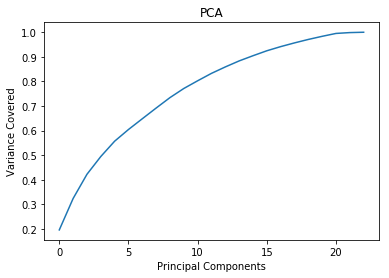

In [524]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

From above graph I analyse that selecting 18 Components will be beter to cover variane while others covers less variance.

In [527]:
npca=PCA(n_components=18)
np_com=npca.fit_transform(X_)
pcomp=pd.DataFrame(np_com,columns="P1 P2 P3 P4 P5 P6 P7 P8 P9 P10 P11 P12 P13 P14 P15 P16 P17 P18".split(" "))
pcomp

P1        P2        P3        P4        P5        P6        P7  \
0     0.044737  0.874925  2.975858 -2.236595 -0.188447 -1.403049 -1.266867   
1     0.321679 -0.460049  2.546112 -2.080535 -0.149084 -2.122331 -0.714074   
2     1.377784  0.494724  3.625453 -2.593530 -0.364342 -0.974240 -0.862643   
3     0.558791 -1.740005 -0.006503 -2.170112  1.847393 -1.580413 -1.333873   
4     0.202039  0.774816  0.181314 -2.135786  0.799354 -2.389623 -0.502853   
5     1.346023  1.092856  2.888483 -2.488373 -0.079308 -1.766547 -0.700972   
6     1.549040  0.076383  3.198876 -2.221737  0.180022 -1.058723 -0.333020   
7     0.116938 -0.918521  2.255004 -2.351025 -0.268199 -1.810757 -0.523980   
8     0.221254  0.580591  1.213717 -2.880142 -0.272960 -0.768714  0.073052   
9     0.740222  0.073904 -0.253123 -2.429027  1.860170 -1.050959 -0.166671   
10   -2.682742  2.394390 -1.037654 -1.428461  2.303155  0.277689  0.703673   
11   -0.594319  1.906431  2.627483 -2.245270  0.016567 -0.830002  0.618667   
12    0.115114 -0.429410  1.562975 -1.834470  0.679689 -1.669825  0.453680   
13   -1.306709  0.141273 -0.998117 -2.048554  2.019737  0.788673  0.777023   
14   -0.931759  2.333043  1.470541 -1.651913  0.290679  0.291145  2.158227   
15    0.151473  0.427168  3.039571 -2.209341  0.058606 -0.055220  0.864596   
16   -0.145184 -1.539434  1.047925 -2.210529  0.780635 -1.952448  0.285670   
17    0.062494 -1.282077  0.378074 -2.503584  0.305068 -1.991080  0.524513   
18    2.797454 -0.070709  0.470643 -2.259024  2.225447 -0.966575  0.832327   
19    1.714286  1.352078  2.068488 -3.308618 -0.562146 -1.524210  0.764882   
20    1.355607 -0.602048 -0.416279 -2.298763  1.357950 -1.913028  1.376731   
21    1.348513 -0.271201  1.105898 -2.376335  0.179677 -2.881154  1.537527   
22    1.913444 -0.345674  1.669685 -3.369420 -1.097994 -1.664717  1.465757   
23    2.478021  0.491812  1.378218 -2.957721 -0.377473 -2.086674  2.218514   
24    2.350057  1.498596  1.745973 -2.824138 -0.042630 -2.830619  1.840370   
25    1.361061  2.274562  2.550368 -2.630681  0.202576 -1.558825  1.991867   
26   -2.137286  2.297875  2.462822 -2.121088 -0.436131 -0.534711  2.056418   
27    0.862523 -0.220890  3.020099 -2.651697 -0.514339 -0.877759  2.021371   
28    1.446655  1.528951  2.862885 -2.133968 -0.952078 -1.130724 -2.064712   
29    0.190503 -0.317336  2.045147 -2.044900 -0.943053 -1.032217 -2.399454   
...        ...       ...       ...       ...       ...       ...       ...   
6335  0.774328 -1.163586  0.673211  0.975888 -2.947374 -1.920598  0.376680   
6336  0.849831 -1.612617 -0.818535  2.241572  0.059482 -1.032278  0.496622   
6337  0.104710 -0.332050 -1.487156  2.812787  0.960700 -1.863718  0.351619   
6338  0.053267 -1.202649 -0.955440  2.586932  0.482435 -0.741420  0.279421   
6339  0.416577 -1.269629 -0.284243  3.721335  1.824001 -1.271350  0.648593   
6340  0.141219 -1.648664 -0.037280  3.881605  1.730267 -1.147180 -2.130263   
6341 -0.133182 -2.516604  0.281012  3.836444  1.528748 -1.456033 -2.137418   
6342  0.191353 -2.165410 -0.082111  3.549862  1.534564 -1.462783 -1.999012   
6343  0.031038 -2.323388 -0.703135  3.239782  1.246800 -1.504882 -1.789641   
6344  0.747424 -1.966067  0.233082  3.368232  1.434041 -1.308927 -1.903193   
6345  0.744377 -2.463543  0.585606  3.746529  1.880315 -1.617347 -1.862514   
6346  0.563719 -2.390216  0.238384  3.573659  1.604172 -1.593360 -1.627305   
6347 -0.336351 -1.816505  0.549301  3.358393  0.584590 -1.239506 -1.494456   
6348  0.041168 -2.018974 -0.001191  3.879139  1.827434 -1.266232 -1.501630   
6349 -0.288103 -2.044116 -0.220815  3.904169  1.704579 -1.287223 -1.234526   
6350 -0.536528 -2.325792 -0.151760  3.298383  0.938591 -1.006480 -1.445791   
6351 -0.086240 -1.827069 -0.471829  3.612614  1.527319 -0.927072 -1.029712   
6352 -0.135087 -1.902229 -0.451188  3.409408  1.333289 -0.968572 -0.982843   
6353 -1.225076 -2.487172  0.341650  2.257644 -1.631575 -1.066175 -0.924795   
6354 -0.858758 -2.708937 -0.740812

In [531]:
Linear=LinearRegression()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
Bagging=BaggingRegressor()

In [532]:
algo=[Linear,RandomForest,knn,AdaBoost,Bagging]

In [533]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(120,141,4):
        X_train,X_test,Y_train,Y_test=train_test_split(pcomp,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))

    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



LinearRegression():
---------------------------
---------------------------

The highest accuracy is 36.75464537648022 of model LinearRegression() at random state 128

MEAN ABSOLUTE ERROR: 2.591330847378497

MEAN SQUARED ERROR for the model: 32.92048917326654

ROOT MEAN SQUARED ERROR for the model: 5.73763794372445


RandomForestRegressor():
---------------------------
---------------------------

The highest accuracy is 35.43030211391691 of model RandomForestRegressor() at random state 128

MEAN ABSOLUTE ERROR: 2.116521602513747

MEAN SQUARED ERROR for the model: 33.60983668813826

ROOT MEAN SQUARED ERROR for the model: 5.797399131346595


KNeighborsRegressor():
---------------------------
---------------------------

The highest accuracy is 29.637161391437715 of model KNeighborsRegressor() at random state 120

MEAN ABSOLUTE ERROR: 2.2858758837391986

MEAN SQUARED ERROR for the model: 50.32189913589945

ROOT MEAN SQUARED ERROR for the model: 7.0937930006379135


AdaBoostRegressor():

In [534]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10,2):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.2529579371055539 at k-fold::2

Mean CV Score of model LinearRegression():: 0.29881394550266627 at k-fold::4

Mean CV Score of model LinearRegression():: 0.2956246479562708 at k-fold::6

Mean CV Score of model LinearRegression():: 0.30888286511331 at k-fold::8


RandomForestRegressor()
-------------------------


Mean CV Score of model RandomForestRegressor():: 0.15826824390036764 at k-fold::2

Mean CV Score of model RandomForestRegressor():: 0.28648423440323334 at k-fold::4

Mean CV Score of model RandomForestRegressor():: 0.27069294510601066 at k-fold::6

Mean CV Score of model RandomForestRegressor():: 0.2972305125382017 at k-fold::8


KNeighborsRegressor()
-------------------------


Mean CV Score of model KNeighborsRegressor():: 0.16999610528954923 at k-fold::2

Mean CV Score of model KNeighborsRegressor():: 0.2134457724411034 at k-fold::4

Mean CV Score of model KNeighborsRegressor():: 0.

In [535]:
CVmodel

{'LinearRegression()': [0.30888286511331],
 'RandomForestRegressor()': [0.2972305125382017],
 'KNeighborsRegressor()': [0.2134457724411034],
 'AdaBoostRegressor()': [-0.6728243961525843],
 'BaggingRegressor()': [0.25631530162049715]}

Max CV_Score of each model

In [538]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LinearRegression()::5.87
RandomForestRegressor()::5.71
KNeighborsRegressor()::8.29
AdaBoostRegressor()::67.28
BaggingRegressor()::3.66


here for model BaggingRegressor we get the least value i.e. the difference between the accuracy and cvScore of this model is 3.66.

In [539]:
X_train,X_test,Y_train,Y_test=train_test_split(pcomp,Y,test_size=0.25,random_state=140)

#### `Plotting regplot graph for BaggingRegressor model`

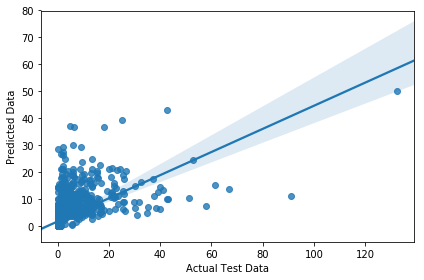

In [540]:
Bagging.fit(X_train,Y_train)
Y_pred=Bagging.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are deviatd not close to the best fit line.

### Regularization

In [541]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.0011, 'max_iter': 1000, 'normalize': True}

In [542]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

33.93245830920875

Here we can see that our model is overfitted or underfitted as the r2 score Lasso model is 33.93 while the BaggingRegressor r2-score is 29.9.

### `Hyper parameter Tuning`

In [543]:

reg=BaggingRegressor()
param={
    'base_estimator':[RandomForest,knn],
    'n_estimators':[51,45],
    'bootstrap':[True,False],
    'oob_score':[True,False],
}
grd=GridSearchCV(reg,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the beast parameter to algo

reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
accuracy=r2_score(Y_test,Y_pred)*100
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))


print("Accuracy::",round(r2_score(Y_test,Y_pred)*100,2))

print("Mean Absolute Error::\n",mae)

print("\n\nMean Squared Error:\n",mse)

print("Root Mean Squared Errror::\n",rmse)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

Best Pramaeters: {'base_estimator': RandomForestRegressor(), 'bootstrap': True, 'n_estimators': 45, 'oob_score': False}
Accuracy:: 33.65
Mean Absolute Error::
 2.2020920295924062


Mean Squared Error:
 38.49555074755909
Root Mean Squared Errror::
 6.204478281657459


The dataframe for the actual & predicted values:

       Actual data  Predicted
1859          0.5   0.035533
1044          1.4   6.423244
7765          0.0   0.030067
2885         25.0  22.923756
430           0.0   0.561556
1800          0.0   0.010333
63            0.2   0.564444
1998          0.0   0.059444
4601         15.8   7.035956
5128          0.0   2.342067
2703          0.0   0.234289
2191          0.4   0.195778
3388          0.0   0.035644
4583          0.0   0.383956
8370          0.2   0.075867
6168          6.4  11.346556
2371          0.0   0.112911
336           0.0   0.062956
934           9.4  13.783800
1424          0.0   3.465378
30            0.8   0.161089
6216          0.0   0.313911
164           

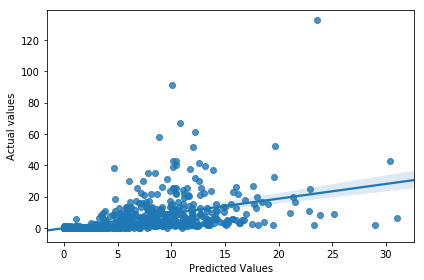

In [544]:
sns.regplot(Y_pred,Y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.tight_layout()

Here we analyse that the data points are close to the best fit line.

### `Saving model`

In [545]:
import pickle
pickle.dump(reg,open("RainfallPredictionWeatherForecasting.pickle","wb"))

## Model Deployment for Classification Problem

In [469]:
X=df_rainTomorrow.drop(columns=['RainTomorrow'],axis=1)
Y=df_rainTomorrow['RainTomorrow']

split features and target variable.

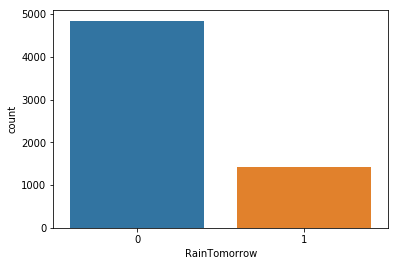

In [470]:
sns.countplot(Y)

Data is imbalanced.

In [471]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

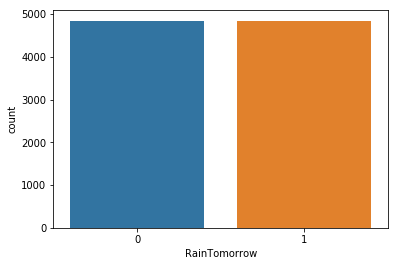

In [472]:
sns.countplot(Y)

data is balanced

#### Standarized the data

In [473]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[-1.42118904,  0.02504168,  0.50157137, ...,  1.79474493,
        -1.76570889, -1.50185887],
       [-1.42118904, -1.08294059, -0.85784949, ...,  1.79474493,
        -1.76570889, -0.97345228],
       [-1.42118904, -0.06729018, -0.85784949, ...,  1.79474493,
        -1.76570889, -0.4450457 ],
       ...,
       [-1.42118904, -1.5624668 , -0.53799102, ..., -0.08460839,
        -0.41491162,  0.61176746],
       [-0.41011753, -0.34450563,  1.52437577, ...,  0.22861717,
        -0.41491162, -0.4450457 ],
       [-0.74714137, -0.43732869,  0.79540358, ..., -0.08460839,
        -0.86517738, -0.97345228]])

In [474]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_)

array([[-0.19037212, -1.23574296,  2.92273209, ...,  0.96774817,
        -0.07782832, -0.39302177],
       [ 0.81764644,  0.43682007,  2.68794179, ..., -0.21753321,
         0.34825035, -0.08709359],
       [ 1.65084532, -0.86058496,  3.7211299 , ..., -0.08772185,
         0.05974219, -0.21655329],
       ...,
       [-1.89509514,  2.42396161, -0.52088362, ..., -0.2066061 ,
         0.09113916, -0.09012129],
       [-3.19317329, -0.88947348,  0.34633593, ..., -0.08774285,
         0.25200795,  0.08362257],
       [-2.76002729,  0.5299624 ,  1.30284329, ..., -0.07920493,
         0.0858291 , -0.14863356]])

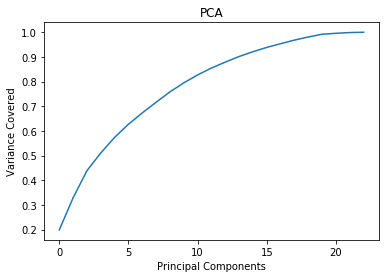

In [475]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

From above graph I analyse that selecting 16 Components will be beter to cover variane while others covers less variance.

In [476]:
npca=PCA(n_components=16)
np_com=npca.fit_transform(X_)
pcomp=pd.DataFrame(np_com,columns="P1 P2 P3 P4 P5 P6 P7 P8 P9 P10 P11 P12 P13 P14 P15 P16".split(" "))
pcomp

P1        P2        P3        P4        P5        P6        P7  \
0    -0.190372 -1.235743  2.922732 -1.791275 -1.098641 -0.594507  0.065496   
1     0.817646  0.436820  2.687942 -1.853442 -0.660642 -1.130529  0.873637   
2     1.650845 -0.860585  3.721130 -2.074112 -1.565076 -0.807745  0.285684   
3     1.454426  1.778650  0.339223 -2.920986  0.533970  0.137881 -0.256030   
4     0.062869 -1.014718  0.139655 -2.257330  0.066565 -0.338436  1.347011   
5     1.367171 -1.534893  2.889924 -2.127751 -1.210034 -0.930045  0.802170   
6     1.972923 -0.440277  3.386485 -2.034174 -1.071259 -0.415844  0.874719   
7     0.732090  0.942126  2.422637 -2.004492 -1.066360 -1.071206  0.553779   
8    -0.046956 -1.057270  1.070278 -2.012084 -1.891449  0.837100  1.389965   
9     1.785032  0.595139  0.155111 -3.078500  0.230014 -0.088420  0.486897   
10   -2.683991 -1.275308 -1.067502 -2.176434  0.860735  1.328729  1.400871   
11   -1.234063 -2.271606  2.387966 -1.680461 -1.357261  0.546043  2.177821   
12    1.079225  0.013315  2.617994 -1.433178 -0.766478  0.742677  1.811837   
13   -0.174813  1.174565 -0.608915 -2.811743  0.328637  0.496130  0.570450   
14   -1.200603 -1.938762  1.366250 -1.016563 -1.162661  1.404772  3.121427   
15   -0.270993 -1.102558  2.918783 -1.427206 -1.894968  1.459441  1.737424   
16    0.753066  1.746938  1.303843 -2.472993 -0.392487 -0.836276  1.118767   
17    0.953928  1.521481  0.564554 -2.473941 -0.894720 -0.988255  1.430259   
18    3.202525 -0.452107  0.754644 -2.969639  0.749287  0.699366  1.071038   
19    1.872999 -1.666510  2.051077 -2.649129 -1.808973 -1.446075  1.300200   
20    1.956479  0.536656 -0.186758 -2.739128  0.430901 -0.158896  2.176987   
21    1.868902  0.129929  1.235282 -2.252853 -0.443584 -1.245324  2.761048   
22    2.489102  0.005135  1.758436 -2.330898 -2.529893 -1.109466  2.311104   
23    2.873872 -0.899486  1.437172 -2.338219 -1.433964 -0.936460  3.467115   
24    2.493783 -1.891234  1.752208 -2.542257 -0.861384 -1.541693  3.213229   
25    1.779797 -1.888918  2.713276 -2.402797 -0.899559 -1.449547  2.275010   
26   -2.712166 -2.099542  2.144012 -1.439061 -1.403642 -0.260258  2.546918   
27    0.887368 -0.349564  3.098974 -1.850707 -1.979298 -0.158130  2.378078   
28    1.495147 -1.835390  2.797546 -1.630613 -1.428506 -1.613525 -0.974821   
29    0.735563  0.344852  2.074767 -1.580787 -1.667834 -1.510054 -1.537374   
...        ...       ...       ...       ...       ...       ...       ...   
9662 -1.674873 -2.736709  2.625020  0.966187  0.039768  0.035854  0.826096   
9663 -3.917460 -0.545138  2.578125 -0.490926 -0.376985  0.288290  0.654974   
9664  0.189858  1.885678 -1.980836 -1.284079  0.359822 -0.190859 -0.125507   
9665  0.707323 -1.604292 -2.771378 -1.081762 -1.167023  2.061863 -0.563691   
9666  2.642963 -1.919737 -0.630307 -2.052897  0.021969 -0.651408 -0.784841   
9667 -0.399418 -4.500925 -0.081656 -0.926980 -2.032258 -1.437982 -0.233741   
9668 -1.597784  0.403230  1.893707 -0.991942  3.557437 -0.091192 -0.146861   
9669 -1.425421 -1.534332  2.088064  1.064492 -0.478384  0.057981 -0.356201   
9670 -3.244183  0.584822  1.677454 -0.814801  1.204812 -1.144010 -1.169908   
9671 -1.565463 -0.741402 -0.939539 -0.744048 -1.857854 -1.352782 -2.065272   
9672 -0.671579  0.971094  0.115524  0.032870  0.010910 -1.172617 -1.671176   
9673 -0.268399 -1.501489 -0.123212 -0.845775 -1.376579  0.305765 -1.063908   
9674 -2.579354 -2.840828 -1.557029 -0.154466  1.433569  0.671419 -0.936443   
9675 -2.975098 -1.253645  1.727233 -0.438676 -0.027478  1.303991  0.519031   
9676 -1.935049 -0.647985 -0.206605  0.589120  0.639247 -0.034668  0.364345   
9677  0.201052  0.341365 -1.315839  1.101561  0.073817  0.326210  0.455829   
9678 -2.396648 -1.700454 -0.689181 -1.571198  0.875638  1.072178 -0.881837   
9679  2.150197  1.285490  2.155671  0.168925  1.885849  1.300792 -0.739063   
9680  2.150874 -1.354085 -1.551981  0.684300 -0.028475 -0.521630 -0.782530   
9681 -2.037223 -2.192007  3.361616

In [500]:
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [501]:
algo=[RandomForest,knn,AdaBoost,Bagging]
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(150,171,4):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

RandomForestClassifier():
---------------------------
---------------------------

The highest accuracy is 91.33574007220217 of model RandomForestClassifier() at random state 158


Confusion Matrix:

 [[886  94]
 [101 858]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       980
           1       0.90      0.89      0.90       959

    accuracy                           0.90      1939
   macro avg       0.90      0.90      0.90      1939
weighted avg       0.90      0.90      0.90      1939

KNeighborsClassifier():
---------------------------
---------------------------

The highest accuracy is 86.02372356884992 of model KNeighborsClassifier() at random state 162


Confusion Matrix:

 [[757 223]
 [ 60 899]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       980
           1       0.80      0.94   

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [503]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(6,10):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


RandomForestClassifier()
-------------------------


Mean CV Score of model RandomForestClassifier():: 0.7029849850310108 at k-fold::6

Mean CV Score of model RandomForestClassifier():: 0.7264163936478789 at k-fold::7

Mean CV Score of model RandomForestClassifier():: 0.7686051506678331 at k-fold::8

Mean CV Score of model RandomForestClassifier():: 0.779626158761717 at k-fold::9


KNeighborsClassifier()
-------------------------


Mean CV Score of model KNeighborsClassifier():: 0.6852220187188998 at k-fold::6

Mean CV Score of model KNeighborsClassifier():: 0.700915718429439 at k-fold::7

Mean CV Score of model KNeighborsClassifier():: 0.7214402050238053 at k-fold::8

Mean CV Score of model KNeighborsClassifier():: 0.7251445587721488 at k-fold::9


AdaBoostClassifier()
-------------------------


Mean CV Score of model AdaBoostClassifier():: 0.6950279199746601 at k-fold::6

Mean CV Score of model AdaBoostClassifier():: 0.6974124079213706 at k-fold::7

Mean CV Score of model AdaBoostC

In [504]:
CVmodel

{'RandomForestClassifier()': [0.779626158761717],
 'KNeighborsClassifier()': [0.7251445587721488],
 'AdaBoostClassifier()': [0.7246318866525762],
 'BaggingClassifier()': [0.777460318008205]}

here we can see the maximun CV score of each model

In [506]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(4):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

RandomForestClassifier()::13.37
KNeighborsClassifier()::13.51
AdaBoostClassifier()::12.84
BaggingClassifier()::11.58


here for model BaggingClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 11.58 .

In [507]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=158)

here we take RandomState 158 because it is the best to use for DecisionTreeClassifier

### Plotting ROC Curve

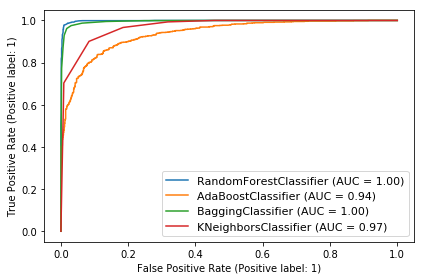

In [511]:
dis=plot_roc_curve(RandomForest,X_test,Y_test)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(knn,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

### Hyperparameter Tuning

In [514]:
clf=BaggingClassifier()
param={
    'base_estimator':[RandomForest,knn],
    'n_estimators':[50,45],
    'bootstrap':[True,False],
    'oob_score':[True,False],
}
grd=GridSearchCV(clf,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

clf=grd.best_estimator_   #reinstantiating the beast parameter to algo

clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

print("Confusion Matrix::\n",confusion_matrix(Y_test,ypred))

print("Accuracy::",accuracy_score(Y_test,ypred))

print("Classification Report::\n",classification_report(Y_test,ypred))

print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

Best Pramaeters: {'base_estimator': RandomForestClassifier(), 'bootstrap': False, 'n_estimators': 45, 'oob_score': False}
Confusion Matrix::
 [[839  82]
 [ 92 926]]
Accuracy:: 0.9102630221763796
Classification Report::
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       921
           1       0.92      0.91      0.91      1018

    accuracy                           0.91      1939
   macro avg       0.91      0.91      0.91      1939
weighted avg       0.91      0.91      0.91      1939



Predicted values:
 [0 1 1 ... 0 0 0]


The dataframe for the actual & predicted values:

       Actual data  Predicted
8175            1          0
732             1          1
4478            0          1
5224            0          0
3173            0          0
1301            0          0
5598            1          0
2333            0          0
3015            1          0
3880            0          1
3434            0          0
5138         

increased in accuracy after tuning..

## Saving Model

In [515]:
import pickle
pickle.dump(clf,open("RainTomorrow_prediction.pickle","wb"))